In [1]:
import pandas as pd
import datetime
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# ---------------------- DATA PREPROCESSING -----------------------------------------
# Only 2021 data

data = pd.read_csv("../Crimes_-_2001_to_Present.csv");
data = data.drop(columns=['Case Number', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude'])
print('--------------- Unecessary Columns DROPPED ----------------------------------')
print(data.columns)
print(data.shape)
print()

print('--------------------- Initializing 2021 data -------------------------------')
data21 = data[data['Year'] >= 2021]
print(data21.columns)
print(data21.shape)
print('----------------------------------------------------------------------------')

del data

print('----------- Calculating seconds hour and month for the data --------------------')
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']] 
data21['month'] = [d.date().month for d in data21['Date']] 
data21['time'] = [d.time() for d in data21['Date']] 
data21['hour'] = [d.time().hour for d in data21['Date']] 
data21['time'] = data21['time'].astype(str) 
empty_list = [] 
for timestr in data21['time'].tolist(): 
    ftr = [3600,60,1] 
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]) 
    empty_list.append(var) 

data21['seconds'] = empty_list
print('----------------------------------------------------------------------------')

print('------------------------- Normalizing data ---------------------------------')
data21['District'] = (data21['District'] - data21['District'].min())/(data21['District'].max()-data21['District'].min()) 
data21['seconds'] = (data21['seconds'] - data21['seconds'].min())/(data21['seconds'].max()-data21['seconds'].min())
data21['hour'] = (data21['hour'] - data21['hour'].min())/(data21['hour'].max()-data21['hour'].min())
data21['month'] = (data21['month'] - data21['month'].min())/(data21['month'].max()-data21['month'].min())
data21['IUCR'] = data21.IUCR.str.extract('(\d+)', expand=True).astype(int)
data21['IUCR'] = (data21['IUCR'] - data21['IUCR'].min())/(data21['IUCR'].max()-data21['IUCR'].min())
print('----------------------------------------------------------------------------')

--------------- Unecessary Columns DROPPED ----------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(7423485, 14)

--------------------- Initializing 2021 data -------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(161283, 14)
----------------------------------------------------------------------------
----------- Calculating seconds hour and month for the data --------------------
----------------------------------------------------------------------------
------------------------- Normalizing data ---------------------------------
----------------------------------------------------------------------------


In [5]:
# ---------------------- DATA PREPROCESSING -----------------------------------------
# Only 2021 data

data = pd.read_csv("../Crimes_-_2001_to_Present.csv");
data = data.drop(columns=['Case Number', 'Beat', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Latitude', 'Longitude'])
print('--------------- Unecessary Columns DROPPED ----------------------------------')
print(data.columns)
print(data.shape)
print()

print('--------------------- Initializing 2021 data -------------------------------')
data21 = data[data['Year'] >= 2021]
print(data21.columns)
print(data21.shape)
print('----------------------------------------------------------------------------')

del data

print('----------- Calculating seconds hour and month for the data --------------------')
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']] 
data21['month'] = [d.date().month for d in data21['Date']] 
data21['time'] = [d.time() for d in data21['Date']] 
data21['hour'] = [d.time().hour for d in data21['Date']] 
data21['time'] = data21['time'].astype(str) 
empty_list = [] 
for timestr in data21['time'].tolist(): 
    ftr = [3600,60,1] 
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]) 
    empty_list.append(var) 

data21['seconds'] = empty_list
print('----------------------------------------------------------------------------')

print('------------------------- Normalizing data ---------------------------------')
data21['District_Norm'] = (data21['District'] - data21['District'].min())/(data21['District'].max()-data21['District'].min()) 
data21['seconds'] = (data21['seconds'] - data21['seconds'].min())/(data21['seconds'].max()-data21['seconds'].min())
data21['hour'] = (data21['hour'] - data21['hour'].min())/(data21['hour'].max()-data21['hour'].min())
data21['month'] = (data21['month'] - data21['month'].min())/(data21['month'].max()-data21['month'].min())
data21['IUCR_Norm'] = data21.IUCR.str.extract('(\d+)', expand=True).astype(int)
data21['IUCR_Norm'] = (data21['IUCR_Norm'] - data21['IUCR_Norm'].min())/(data21['IUCR_Norm'].max()-data21['IUCR_Norm'].min())
print('----------------------------------------------------------------------------')

--------------- Unecessary Columns DROPPED ----------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(7423485, 14)

--------------------- Initializing 2021 data -------------------------------
Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location'],
      dtype='object')
(161283, 14)
----------------------------------------------------------------------------
----------- Calculating seconds hour and month for the data --------------------
----------------------------------------------------------------------------
------------------------- Normalizing data ---------------------------------
----------------------------------------------------------------------------


In [21]:
data21['District_Norm'].iloc[0]

0.2

In [22]:
data21['District'].iloc[0]

7.0

In [24]:
data21['IUCR'].iloc[0]

'0486'

In [ ]:
data21['IUCR_Norm'].iloc[0]

In [26]:
icurNorm_iucr = {}
for iucr in data21['IUCR_Norm']:
    

0486


In [ ]:
districtNorm_district = {}
for i, data in data21['District_Norm']:
    if dn not in districtNorm_district:
        districtNorm_district[dn] = 

In [36]:
districtNorm_district = {}
icurNorm_iucr = {}
for i, row in data21.iterrows():
    if row['District_Norm'] not in districtNorm_district:
        districtNorm_district[row['District_Norm']] = row['District']
    
    if row['IUCR_Norm'] not in icurNorm_iucr:
        icurNorm_iucr[row['IUCR_Norm']] = row['IUCR']

In [38]:
icurNorm_iucr

{0.08919819643207215: '0486',
 0.15467555381297785: '0820',
 0.39031562438737505: '2022',
 0.015487159380513624: '0110',
 0.10370515585179377: '0560',
 0.021564399137424035: '141A',
 0.250735149970594: '1310',
 0.26053714957851404: '1360',
 0.22015291119388355: '1154',
 0.08410115663595373: '0460',
 0.05763575769456969: '0325',
 0.16251715349931387: '0860',
 0.11350715545971378: '0610',
 0.17231915310723386: '0910',
 0.252695549892178: '1320',
 0.001960399921584003: '041A',
 0.391295824348167: '2027',
 0.3910997843560086: '2026',
 0.21976083120956674: '1152',
 0.3038619878455205: '1581',
 0.09135463634581455: '0497',
 0.34914722603411097: '1812',
 0.8539502058419918: '4387',
 0.15271515389139384: '0810',
 0.16839835326406588: '0890',
 0.021956479121740834: '143A',
 0.39070770437169183: '2024',
 0.21544795138208195: '1130',
 0.08292491668300334: '0454',
 0.5467555381297785: '2820',
 0.9745148010194079: '5002',
 0.257596549696138: '1345',
 0.254655949813762: '1330',
 0.003920799843168006

In [43]:
for i in icurNorm_iucr.keys():
    if i >= 0.7 and i <= 1.0:
        print(i, icurNorm_iucr[i])

0.8539502058419918 4387
0.9745148010194079 5002
0.8537541658498333 4386
0.9762791609488336 5011
0.7253479709860812 3731
0.9956871201725151 5110
0.8543422858263086 4389
0.9741227210350911 5000
0.900607723975691 4625
0.996079200156832 5112
0.9743187610272496 5001
0.9958831601646736 5111
0.7702411291903548 3960
0.9055087237796511 4650
0.9466771221329151 4860
0.7251519309939227 3730
0.7212311311507548 3710
0.7388747304450107 3800
0.9754950009801999 5007
0.7290727308370908 3750
0.878063124877475 4510
0.7722015291119388 3970
0.838855126445795 4310
0.9057047637718094 4651
0.8231719270731229 4230
0.9749068810037248 5004
0.8541462458341502 4388
0.9998039600078416 5131
0.9747108410115664 5003
0.9996079200156832 5130
0.8280729268770829 4255
0.8212115271515389 4220
1.0 5132
0.8192511272299549 4210
0.7310331307586748 3760
0.825132326994707 4240
0.9349147226034111 4800
0.9766712409331504 5013
0.9251127229954911 4750
0.9978435600862576 5121
0.7714173691433053 3966
0.7704371691825133 3961


In [37]:
districtNorm_district

{0.2: 7.0,
 0.16666666666666666: 6.0,
 0.4666666666666667: 15.0,
 0.06666666666666667: 3.0,
 0.1: 4.0,
 0.36666666666666664: 12.0,
 0.7666666666666667: 24.0,
 0.03333333333333333: 2.0,
 0.3: 10.0,
 0.43333333333333335: 14.0,
 0.7: 22.0,
 0.5666666666666667: 18.0,
 0.13333333333333333: 5.0,
 0.3333333333333333: 11.0,
 0.26666666666666666: 9.0,
 0.6333333333333333: 20.0,
 0.8: 25.0,
 0.23333333333333334: 8.0,
 0.5333333333333333: 17.0,
 0.6: 19.0,
 0.5: 16.0,
 0.0: 1.0,
 1.0: 31.0}

In [29]:
print(districtNorm_district)

{}


In [18]:
data21

ID                Date                     Block      IUCR  \
6910067  12260346 2021-01-03 13:23:00     070XX S EGGLESTON AVE  0.089198   
6927871  12263464 2021-01-03 06:59:00          080XX S YALE AVE  0.154676   
6927960  12259990 2021-01-03 00:20:00   056XX W WASHINGTON BLVD  0.089198   
6932002  12260669 2021-01-03 20:47:00        057XX S RACINE AVE  0.390316   
6932007     25702 2021-01-03 20:09:00  068XX S STONY ISLAND AVE  0.015487   
...           ...                 ...                       ...       ...   
7423480  12514897 2021-10-16 11:30:00     030XX N MILWAUKEE AVE  0.084101   
7423481  12514271 2021-10-16 16:00:00      025XX W MARQUETTE RD  0.261517   
7423482  12517486 2021-01-02 00:00:00        114XX S FOREST AVE  0.220153   
7423483  12513899 2021-10-16 00:00:00         063XX S KOLIN AVE  0.103705   
7423484  12513578 2021-10-16 10:15:00           036XX W 16TH ST  0.250735   

               Primary Type                              Description  \
6910067             BATTERY                  DOMESTIC BATTERY SIMPLE   
6927871               THEFT                           $500 AND UNDER   
6927960             BATTERY                  DOMESTIC BATTERY SIMPLE   
6932002           NARCOTICS                        POSSESS - COCAINE   
6932007            HOMICIDE                      FIRST DEGREE MURDER   
...                     ...                                      ...   
7423480             BATTERY                                   SIMPLE   
7423481   CRIMINAL TRESPASS                             TO RESIDENCE   
7423482  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
7423483             ASSAULT                                   SIMPLE   
7423484     CRIMINAL DAMAGE                              TO PROPERTY   

              Location Description  Arrest  Domestic  District  Ward  \
6910067                  APARTMENT   False      True  0.200000   6.0   
6927871                  RESIDENCE   False     False  0.166667  17.0   
6927960                  APARTMENT   False      True  0.466667  29.0   
6932002                     STREET    True     False  0.200000  16.0   
6932007                     STREET   False     False  0.066667   5.0   
...                            ...     ...       ...       ...   ...   
7423480  SCHOOL - PRIVATE BUILDING   False     False  0.800000  30.0   
7423481                  APARTMENT   False     False  0.233333  16.0   
7423482                  RESIDENCE   False     False  0.133333   9.0   
7423483                  APARTMENT   False      True  0.233333  13.0   
7423484         SMALL RETAIL STORE   False     False  0.300000  24.0   

         Community Area  Year                       Location        date  \
6910067            68.0  2021  (41.766435144, -87.635963997)  2021-01-03   
6927871            44.0  2021  (41.748473982, -87.630606588)  2021-01-03   
6927960            25.0  2021   (41.88222427, -87.766076162)  2021-01-03   
6932002            67.0  2021   (41.79006908, -87.654768679)  2021-01-03   
6932007            43.0  2021  (41.771062488, -87.586270811)  2021-01-03   
...                 ...   ...                            ...         ...   
7423480            21.0  2021  (41.936657276, -87.719850766)  2021-10-16   
7423481            66.0  2021  (41.771926901, -87.686706738)  2021-10-16   
7423482            49.0  2021  (41.686439349, -87.615623747)  2021-01-02   
7423483            65.0  2021  (41.777410704, -87.731273331)  2021-10-16   
7423484            29.0  2021   (41.858965656, -87.71585846)  2021-10-16   

         month      time      hour   seconds  
6910067    0.0  13:23:00  0.565217  0.558026  
6927871    0.0  06:59:00  0.260870  0.291174  
6927960    0.0  00:20:00  0.000000  0.013899  
6932002    0.0  20:47:00  0.869565  0.866574  
6932007    0.0  20:09:00  0.869565  0.840167  
...        ...       ...       ...       ...  
7423480    1.0  11:30:00  0.478261  0.479500  
7423481    1.0  16:00:00  0.695652  0.667130  
7423482    0.0  00:00:00

In [3]:
data21.columns

Index(['ID', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'District', 'Ward',
       'Community Area', 'Year', 'Location', 'date', 'month', 'time', 'hour',
       'seconds'],
      dtype='object')

In [4]:
data21['month'].unique()

array([0.        , 0.11111111, 0.33333333, 0.22222222, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [105]:
type(data21['IUCR'].iloc[0])

numpy.int64

In [5]:
data21['IUCR'].iloc[0]

0.08919819643207215

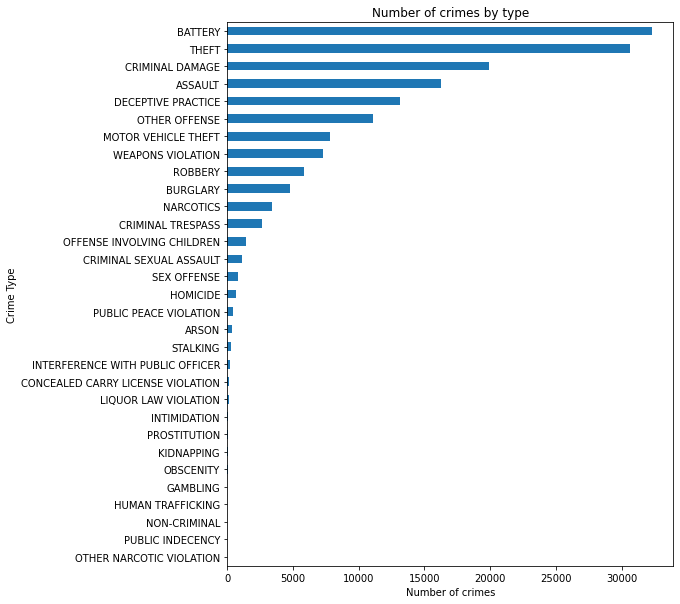

In [6]:
plt.figure(figsize=(8,10))
data21.groupby([data21['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

In [8]:
# convert dates to pandas datetime format
data21.Date = pd.to_datetime(data21.Date, format='%m/%d/%Y %I:%M:%S %p')
# setting the index to be the date will help us a lot later on
data21.index = pd.DatetimeIndex(data21.Date)

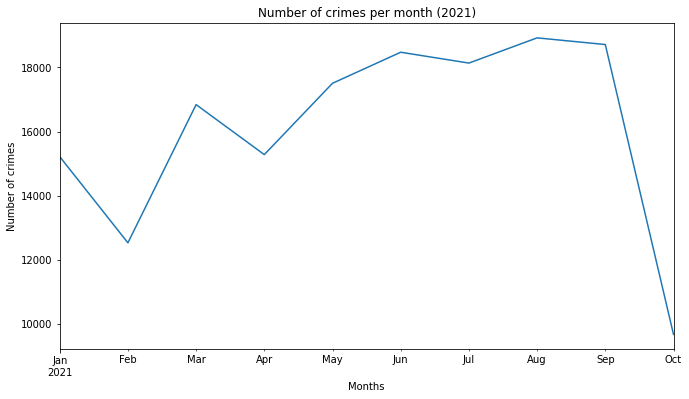

In [10]:
plt.figure(figsize=(11,6))
data21.resample('BM').size().plot(legend=False)
plt.title('Number of crimes per month (2021)')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

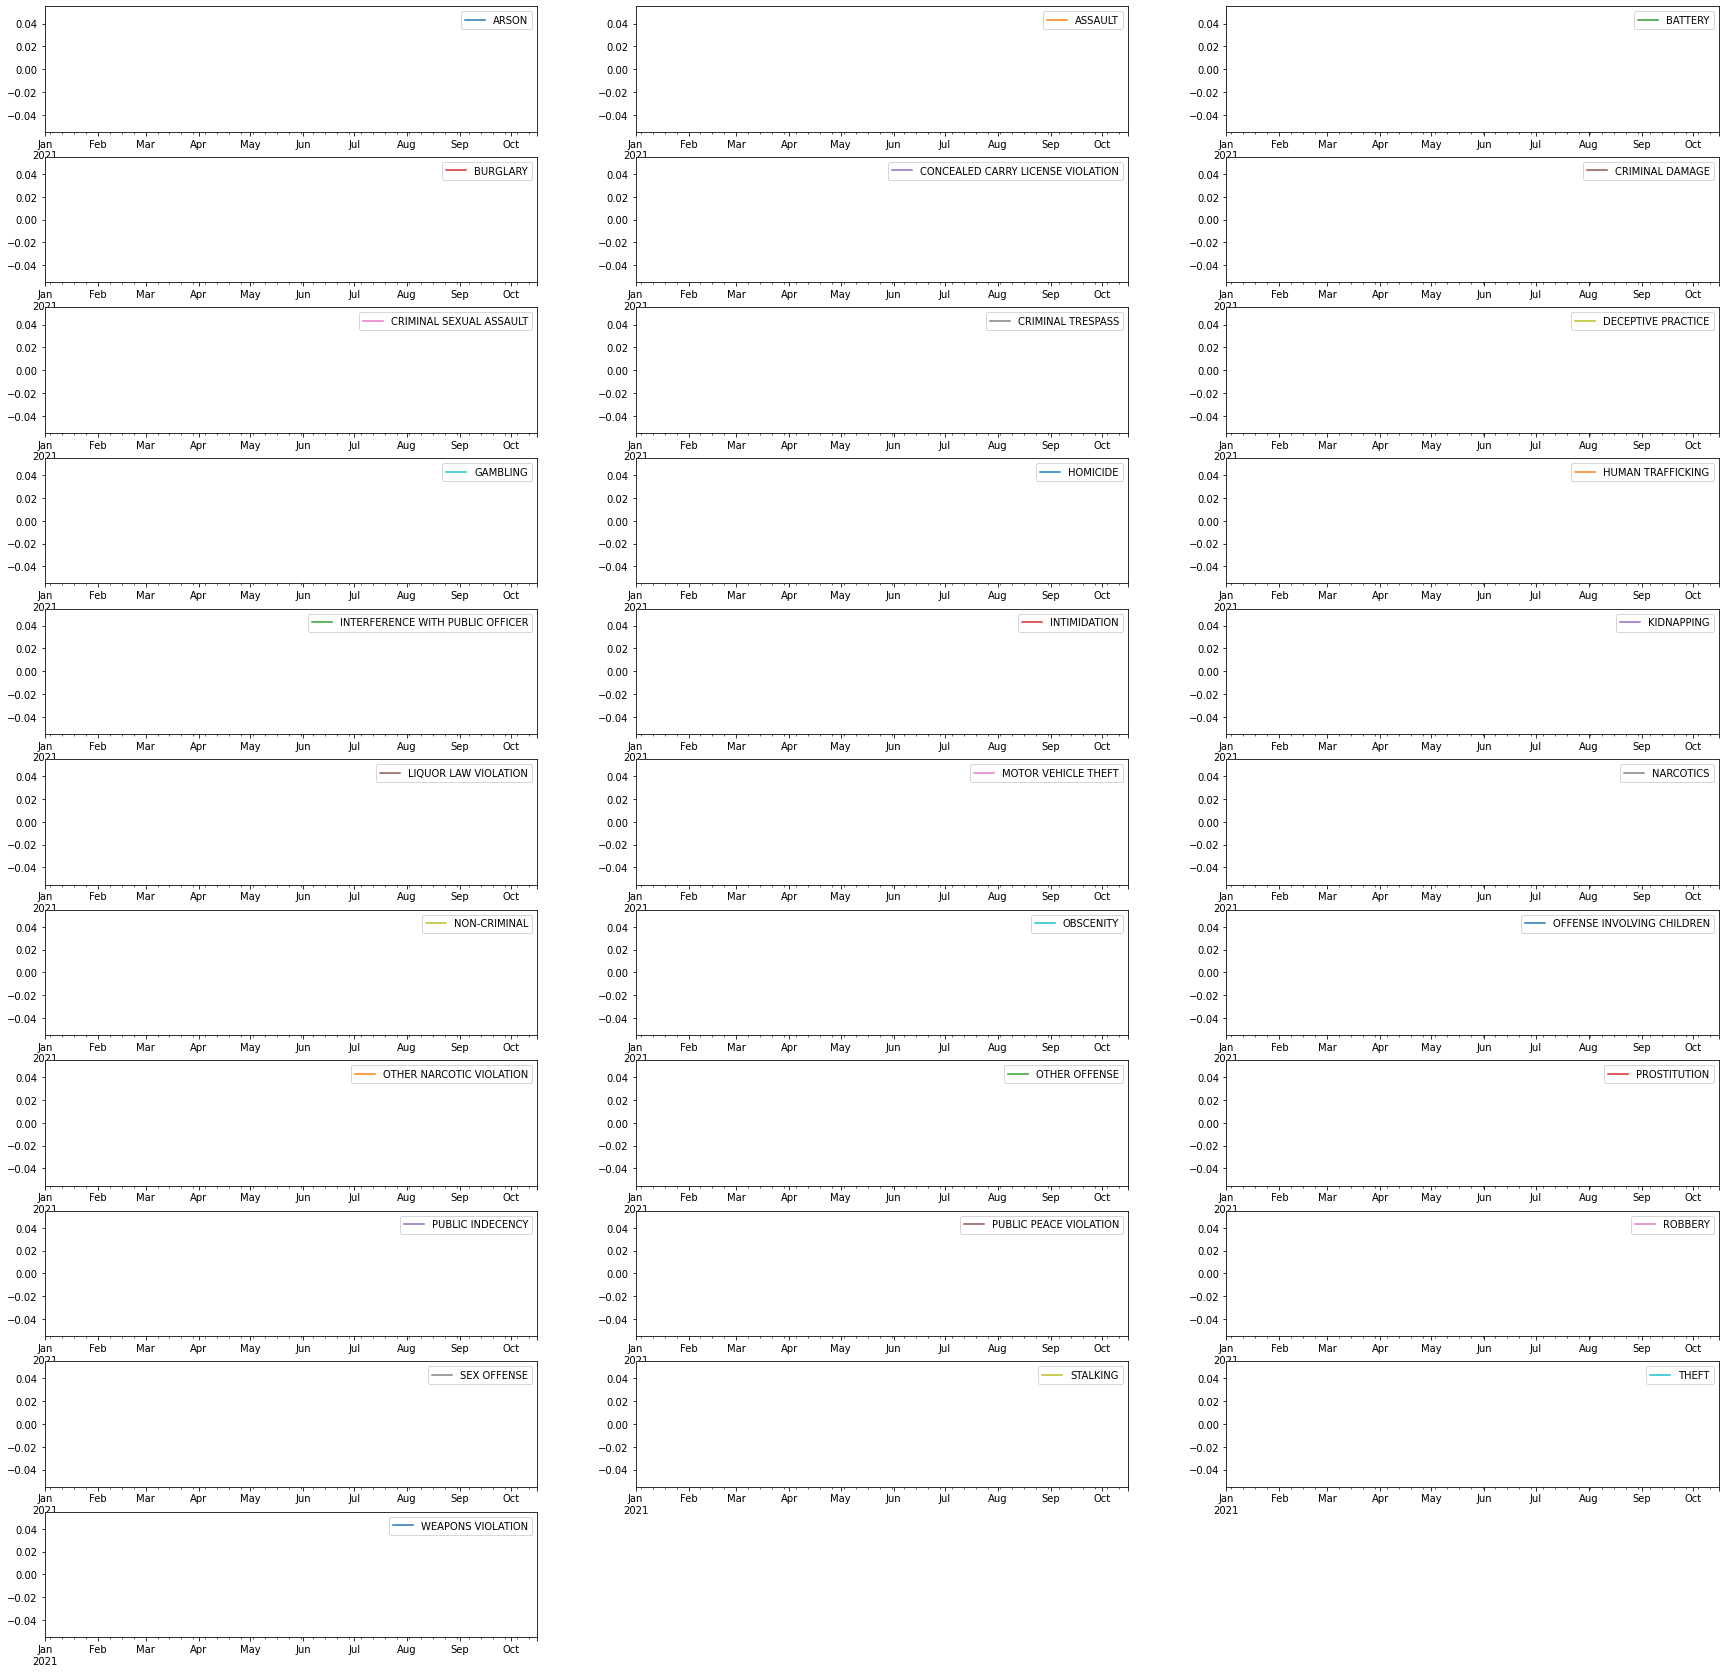

In [209]:
crimes_count_date = data21.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data21.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(30, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

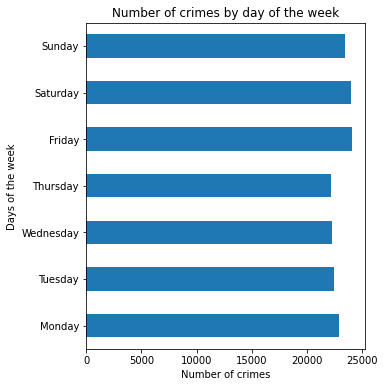

In [11]:
days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
data21.groupby([data21.index.dayofweek]).size().plot(kind='barh', figsize=(5, 6))
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by day of the week')
plt.show()

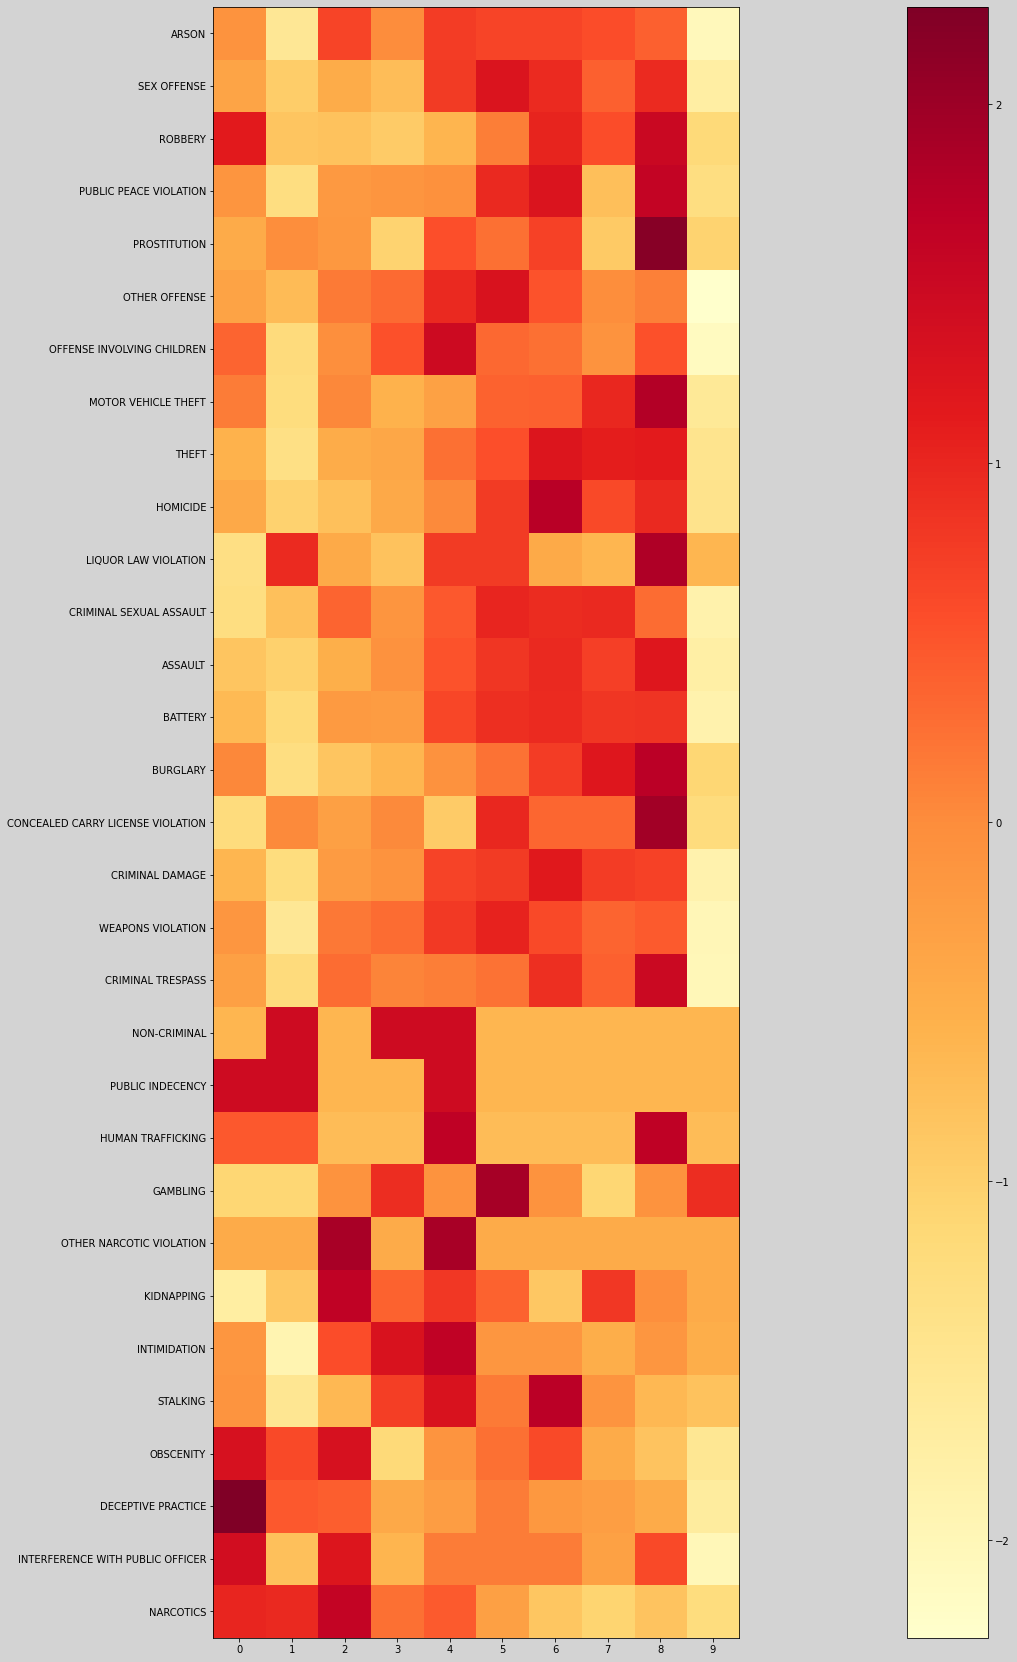

In [42]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
# plt.figure()
scale_and_plot(month_by_type)

In [21]:
hour_by_location = data21.pivot_table(values='ID', index='Location Description', columns=data21.hour, aggfunc=np.size).fillna(0)
hour_by_type     = data21.pivot_table(values='ID', index='Primary Type', columns=data21.hour, aggfunc=np.size).fillna(0)
#dayofweek_by_type = data21.pivot_table(values='ID', index='Primary Type', columns=data21.index.dayofweek, aggfunc=np.size).fillna(0)
#location_by_type  = data21.pivot_table(values='ID', index='Location Description', columns='Primary Type', aggfunc=np.size).fillna(0)

In [24]:
district_month = data21.pivot_table(values='ID', index='month', columns=data21.District, aggfunc=np.size).fillna(0)

In [27]:
district_month

District    1.0    2.0    3.0     4.0    5.0     6.0     7.0     8.0    9.0   \
month                                                                          
0.000000   525.0  700.0  886.0   971.0  793.0  1063.0   821.0  1053.0  702.0   
0.111111   451.0  582.0  659.0   770.0  601.0   869.0   608.0   881.0  579.0   
0.222222   511.0  694.0  893.0   986.0  754.0  1182.0   795.0   990.0  638.0   
0.333333   581.0  662.0  798.0   994.0  746.0  1016.0   916.0   933.0  657.0   
0.444444   695.0  752.0  952.0  1014.0  868.0  1181.0  1013.0  1065.0  745.0   
0.555556   828.0  859.0  942.0  1163.0  860.0  1215.0  1071.0  1074.0  778.0   
0.666667  1145.0  862.0  934.0  1117.0  919.0  1220.0   994.0  1124.0  852.0   
0.777778   868.0  850.0  862.0  1134.0  826.0  1206.0   919.0  1110.0  837.0   
0.888889   823.0  879.0  944.0  1092.0  856.0  1135.0   878.0  1184.0  839.0   
1.000000   458.0  451.0  465.0   543.0  385.0   597.0   471.0   564.0  452.0   

District   10.0  ...   15.0   16.0   17.0    18.0   19.0   20.0   22.0   24.0  \
month            ...                                                            
0.000000  664.0  ...  622.0  784.0  457.0   627.0  714.0  313.0  603.0  557.0   
0.111111  584.0  ...  460.0  563.0  371.0   487.0  496.0  272.0  477.0  439.0   
0.222222  694.0  ...  709.0  597.0  412.0   562.0  610.0  319.0  511.0  512.0   
0.333333  679.0  ...  638.0  548.0  404.0   554.0  652.0  322.0  576.0  495.0   
0.444444  839.0  ...  739.0  633.0  439.0   752.0  748.0  338.0  566.0  550.0   
0.555556  868.0  ...  728.0  692.0  424.0   880.0  832.0  350.0  609.0  607.0   
0.666667  793.0  ...  693.0  674.0  530.0   998.0  930.0  357.0  631.0  526.0   
0.777778  768.0  ...  658.0  660.0  506.0  1058.0  930.0  368.0  543.0  610.0   
0.888889  841.0  ...  697.0  702.0  516.0  1096.0  921.0  393.0  581.0  611.0   
1.000000  439.0  ...  378.0  281.0  280.0   542.0  506.0  198.0  302.0  309.0   

District   25.0  31.0  
month                  
0.000000  835.0   1.0  
0.111111  740.0   0.0  
0.222222  896.0   0.0  
0.333333  823.0   1.0  
0.444444  929.0   0.0  
0.555556  945.0   2.0  
0.666667  933.0   3.0  
0.777778  868.0   2.0  
0.888889  908.0   0.0  
1.000000  479.0   3.0  

[10 rows x 23 columns]

In [86]:
month_by_type     = data21.pivot_table(values='ID', index='Primary Type', columns=data21.month, aggfunc=np.size).fillna(0)

In [29]:
district_crimeType = data21.pivot_table(values='ID', index='Primary Type', columns=data21.District, aggfunc=np.size).fillna(0)

In [25]:
from sklearn.cluster import AgglomerativeClustering as AC

def scale_df(df,axis=0):
    return (df - df.mean(axis=axis)) / df.std(axis=axis)


def plot_hmap(df, ix=None, cmap='YlOrRd'):
    if ix is None:
        ix = np.arange(df.shape[0])
    plt.imshow(df.iloc[ix,:], cmap=cmap)
    plt.colorbar(fraction=0.03)
    plt.yticks(np.arange(df.shape[0]), df.index[ix])
    plt.xticks(np.arange(df.shape[1]))
    plt.grid(False)
    plt.show()
    
def scale_and_plot(df, ix = None):
    df_marginal_scaled = scale_df(df.T).T
    if ix is None:
        ix = AC(4).fit(df_marginal_scaled).labels_.argsort()
    
    print('IX: ', ix)
    
    cap = np.min([np.max(df_marginal_scaled.to_numpy()), np.abs(np.min(df_marginal_scaled.to_numpy()))])
    df_marginal_scaled = np.clip(df_marginal_scaled, -1*cap, cap)
    plot_hmap(df_marginal_scaled, ix=ix)

In [80]:
a = ''
def agg_clustering1111(df):
    scaled_data = scale_df(df.T).T
#     agg_fit_model = AC(4).fit(scaled_data) 
#     agg_fit_model = AC(distance_threshold=None, n_clusters=10).fit(scaled_data)
#     agg_fit = agg_fit_model.labels_.argsort()
    agg_fit1 = AC(4).fit(scaled_data)
    agg_fit = agg_fit1.labels_.argsort()
    print(agg_fit)
    print(len(agg_fit))
    print(scaled_data.iloc[agg_fit,:])
    
    limit = np.min([np.max(scaled_data.to_numpy()), 
                  np.abs(np.min(scaled_data.to_numpy()))])
    scaled_data = np.clip(scaled_data, -1*limit, limit)

    plt.imshow(scaled_data.iloc[agg_fit,:], cmap='YlOrRd')
    plt.colorbar(fraction=0.03)
    plt.xticks(np.arange(scaled_data.shape[1]))
    plt.yticks(np.arange(scaled_data.shape[0]), scaled_data.index[agg_fit])
    plt.grid(False)
    plt.show()
    
    print('----------------------------------------------------------------------')
    print(agg_fit1.distances_)
    
    
    model = agg_fit1
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
#     return agg_fit_model

In [110]:
def agg_clustering(df):
    scaled_data = scale_df(df.T).T
    agg_fit_model = AC(distance_threshold=0, n_clusters=None).fit(scaled_data)
    print("%%%",agg_fit_model.labels_)
    agg_fit = agg_fit_model.labels_.argsort()
    limit = np.min([np.max(scaled_data.to_numpy()), 
                  np.abs(np.min(scaled_data.to_numpy()))])
    scaled_data = np.clip(scaled_data, -1*limit, limit)
    print(agg_fit)
    print(len(agg_fit))
    print('scaled_data.iloc[agg_fit,:]', scaled_data.iloc[agg_fit,:])
    plt.imshow(scaled_data.iloc[agg_fit,:], cmap='YlOrRd')
    plt.colorbar(fraction=0.03)
    plt.xticks(np.arange(scaled_data.shape[1]))
    print('X Ticks: ', np.arange(scaled_data.shape[1]))
    plt.yticks(np.arange(scaled_data.shape[0]), scaled_data.index[agg_fit])
    print('Y Ticks: ', np.arange(scaled_data.shape[0]), scaled_data.index[agg_fit])
    plt.grid(False)
    plt.show()
    
    return agg_fit_model

In [49]:
from scipy.cluster.hierarchy import dendrogram

In [92]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    print('@@@', model.children_)   
    print('###', model.distances_)
    print()
        
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    
    print('$$$', linkage_matrix)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
#     dendrogram(linkage_matrix)

In [ ]:
hour_by_location = data21.pivot_table(values='ID', index='Location Description', columns=data21.hour, aggfunc=np.size).fillna(0)

In [97]:
month_by_type

month                              0.000000  0.111111  0.222222  0.333333  \
Primary Type                                                                
ARSON                                  40.0      23.0      49.0      41.0   
ASSAULT                              1337.0    1282.0    1450.0    1597.0   
BATTERY                              2772.0    2435.0    3096.0    3070.0   
BURGLARY                              485.0     351.0     396.0     418.0   
CONCEALED CARRY LICENSE VIOLATION      11.0      15.0      14.0      15.0   
CRIMINAL DAMAGE                      1724.0    1456.0    1894.0    1946.0   
CRIMINAL SEXUAL ASSAULT                78.0      92.0     124.0     110.0   
CRIMINAL TRESPASS                     253.0     212.0     279.0     270.0   
DECEPTIVE PRACTICE                   2487.0    1561.0    1528.0    1087.0   
GAMBLING                                0.0       0.0       1.0       2.0   
HOMICIDE                               54.0      38.0      45.0      54.0   
HUMAN TRAFFICKING                       1.0       1.0       0.0       0.0   
INTERFERENCE WITH PUBLIC OFFICER       34.0      20.0      33.0      21.0   
INTIMIDATION                            9.0       4.0      11.0      13.0   
KIDNAPPING                              3.0       5.0      11.0       8.0   
LIQUOR LAW VIOLATION                    5.0      18.0      10.0       8.0   
MOTOR VEHICLE THEFT                   801.0     629.0     788.0     713.0   
NARCOTICS                             489.0     485.0     579.0     382.0   
NON-CRIMINAL                            0.0       1.0       0.0       1.0   
OBSCENITY                               8.0       6.0       8.0       1.0   
OFFENSE INVOLVING CHILDREN            158.0     107.0     145.0     164.0   
OTHER NARCOTIC VIOLATION                0.0       0.0       1.0       0.0   
OTHER OFFENSE                        1024.0     943.0    1150.0    1184.0   
PROSTITUTION                            4.0       7.0       6.0       0.0   
PUBLIC INDECENCY                        1.0       1.0       0.0       0.0   
PUBLIC PEACE VIOLATION                 46.0      26.0      45.0      46.0   
ROBBERY                               729.0     477.0     482.0     466.0   
SEX OFFENSE                            76.0      66.0      74.0      70.0   
STALKING                               27.0      17.0      23.0      33.0   
THEFT                                2654.0    2110.0    2716.0    2781.0   
WEAPONS VIOLATION                     704.0     466.0     760.0     779.0   

month                              0.444444  0.555556  0.666667  0.777778  \
Primary Type                                                                
ARSON                                  50.0      49.0      49.0      48.0   
ASSAULT                              1797.0    1903.0    1952.0    1866.0   
BATTERY                              3672.0    3839.0    3876.0    3794.0   
BURGLARY                              473.0     506.0     558.0     602.0   
CONCEALED CARRY LICENSE VIOLATION      12.0      18.0      16.0      16.0   
CRIMINAL DAMAGE                      2284.0    2315.0    2484.0    2314.0   
CRIMINAL SEXUAL ASSAULT               127.0     142.0     140.0     141.0   
CRIMINAL TRESPASS                     272.0     277.0     306.0     284.0   
DECEPTIVE PRACTICE                   1180.0    1392.0    1225.0    1168.0   
GAMBLING                                1.0       3.0       1.0       0.0   
HOMICIDE                               66.0      85.0     110.0      81.0   
HUMAN TRAFFICKING                       2.0       0.0       0.0       0.0   
INTERFERENCE WITH PUBLIC OFFICER       26.0      26.0      26.0      23.0   
INTIMIDATION                           14.0       9.0       9.0       8.0   
KIDNAPPING                              9.0       8.0       5.0       9.0   
LIQUOR LAW VIOLATION                   17.0      17.0      10.0       9.0   
MOTOR VEHICLE THEFT                   745.0     829.0     833.0     904.

@@@@@@ month                              0.000000  0.111111  0.222222  0.333333  \
Primary Type                                                                
ARSON                                  40.0      23.0      49.0      41.0   
ASSAULT                              1337.0    1282.0    1450.0    1597.0   
BATTERY                              2772.0    2435.0    3096.0    3070.0   
BURGLARY                              485.0     351.0     396.0     418.0   
CONCEALED CARRY LICENSE VIOLATION      11.0      15.0      14.0      15.0   
CRIMINAL DAMAGE                      1724.0    1456.0    1894.0    1946.0   
CRIMINAL SEXUAL ASSAULT                78.0      92.0     124.0     110.0   
CRIMINAL TRESPASS                     253.0     212.0     279.0     270.0   
DECEPTIVE PRACTICE                   2487.0    1561.0    1528.0    1087.0   
GAMBLING                                0.0       0.0       1.0       2.0   
HOMICIDE                               54.0      38.0      45.0      

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


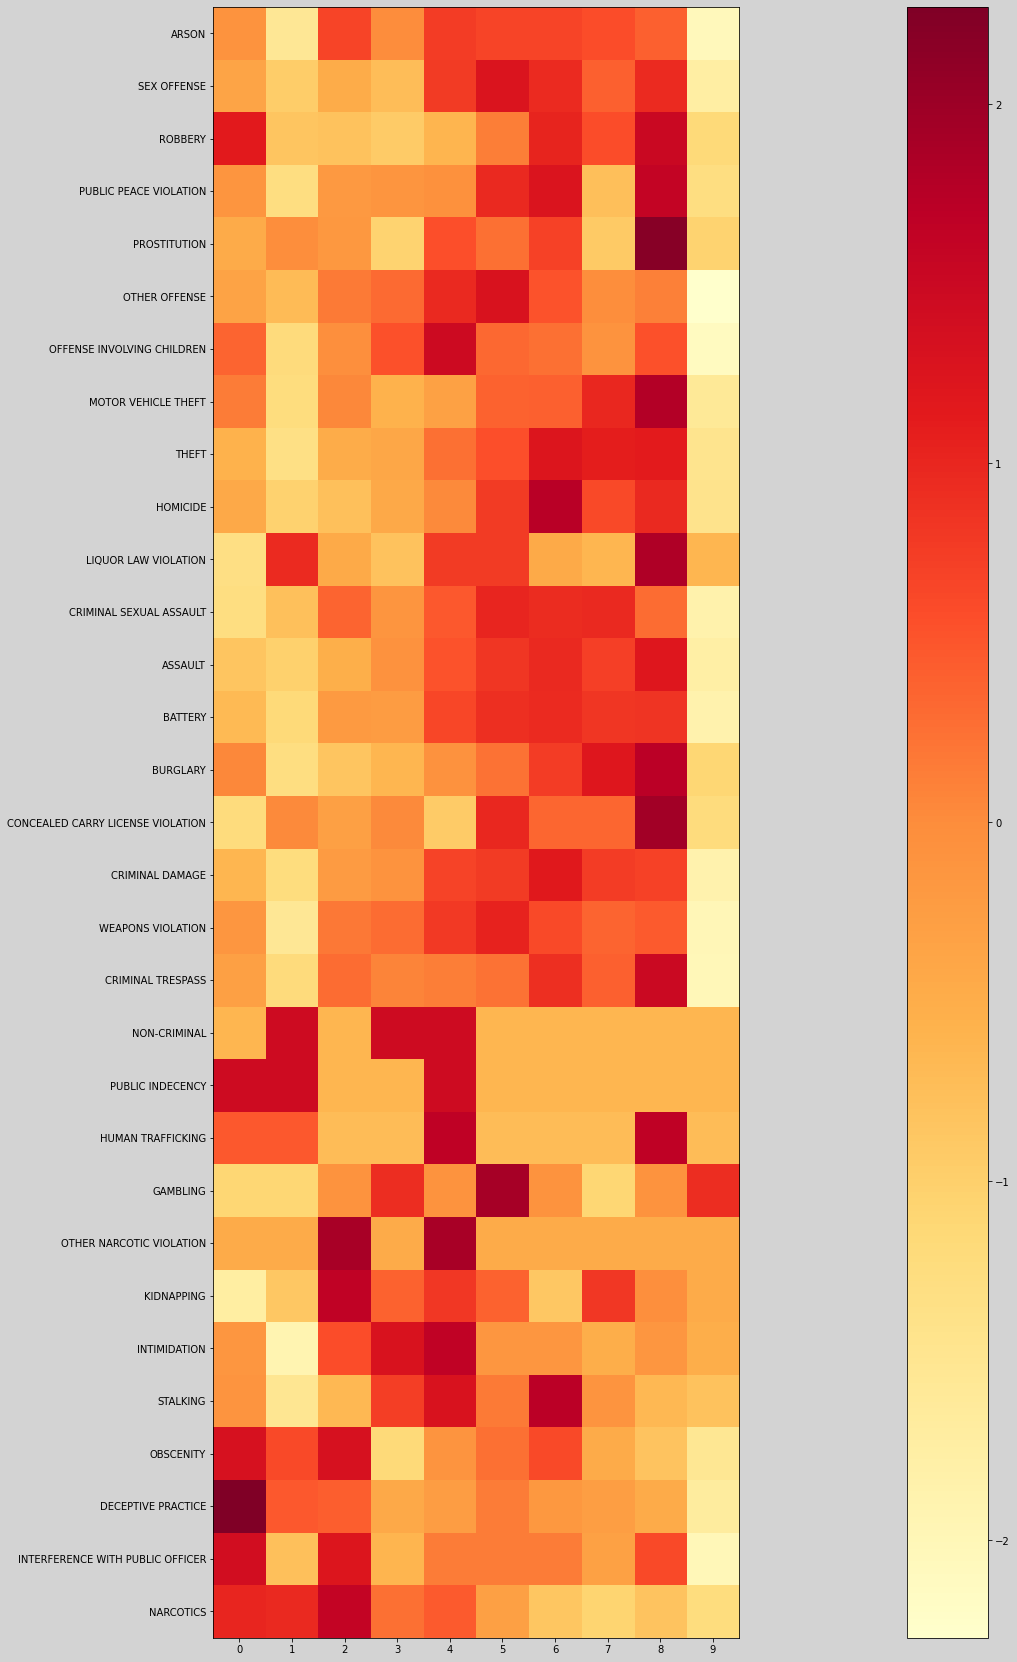

In [113]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
print('@@@@@@', month_by_type)
agg_fit = agg_clustering(month_by_type)
# plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


%%% [0 0 0 0 0 0 0 0 3 2 0 1 3 2 2 0 0 3 1 3 0 2 0 0 1 0 0 0 2 0 0]
[ 0 27 26 25 23 22 20 16 29 10 15  6  1  2  3  4  5 30  7 18 24 11  9 21
 14 13 28 19  8 12 17]
31
month                              0.000000  0.111111  0.222222  0.333333  \
Primary Type                                                                
ARSON                             -0.101921 -1.545806  0.662488 -0.016987   
SEX OFFENSE                       -0.371140 -0.969753 -0.490863 -0.730308   
ROBBERY                            1.150738 -0.847787 -0.808134 -0.935024   
PUBLIC PEACE VIOLATION            -0.126745 -1.278973 -0.184356 -0.126745   
PROSTITUTION                      -0.472042 -0.029503 -0.177016 -1.062095   
OTHER OFFENSE                     -0.353459 -0.693484  0.175470  0.318197   
OFFENSE INVOLVING CHILDREN         0.355391 -1.207103 -0.042892  0.539214   
MOTOR VEHICLE THEFT                0.145592 -1.253389  0.039855 -0.570166   
THEFT                             -0.576633 -1.342474 -0.489350

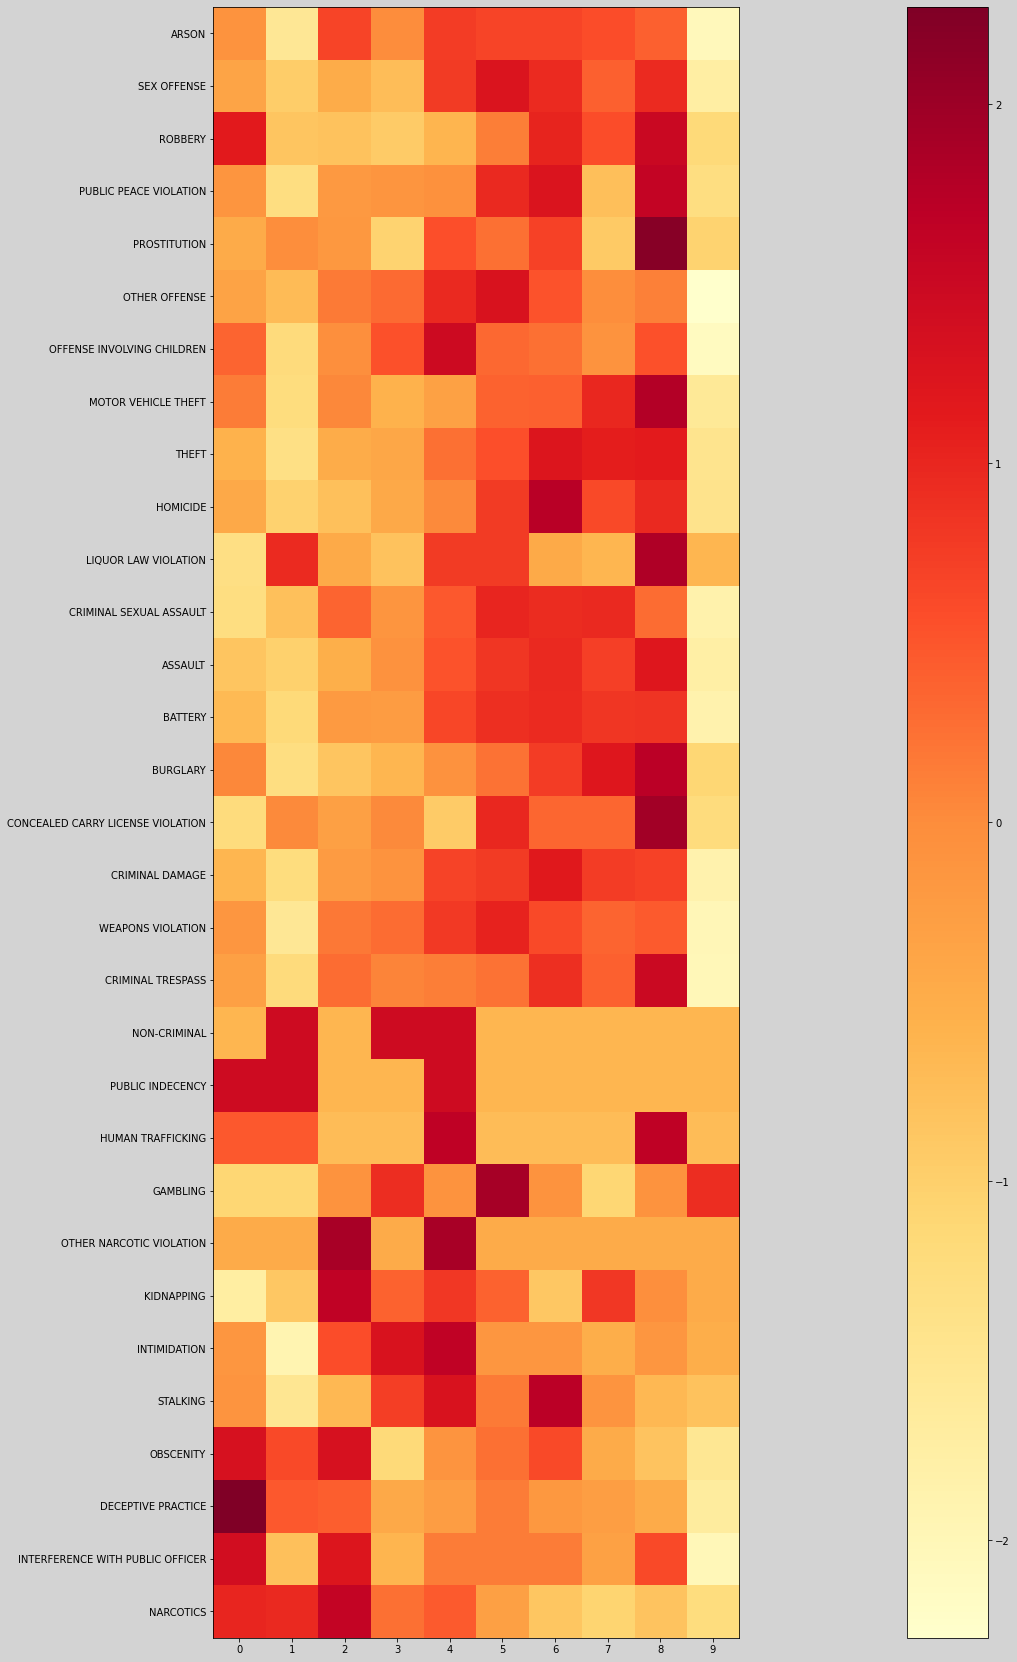

In [106]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(month_by_type)
# plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


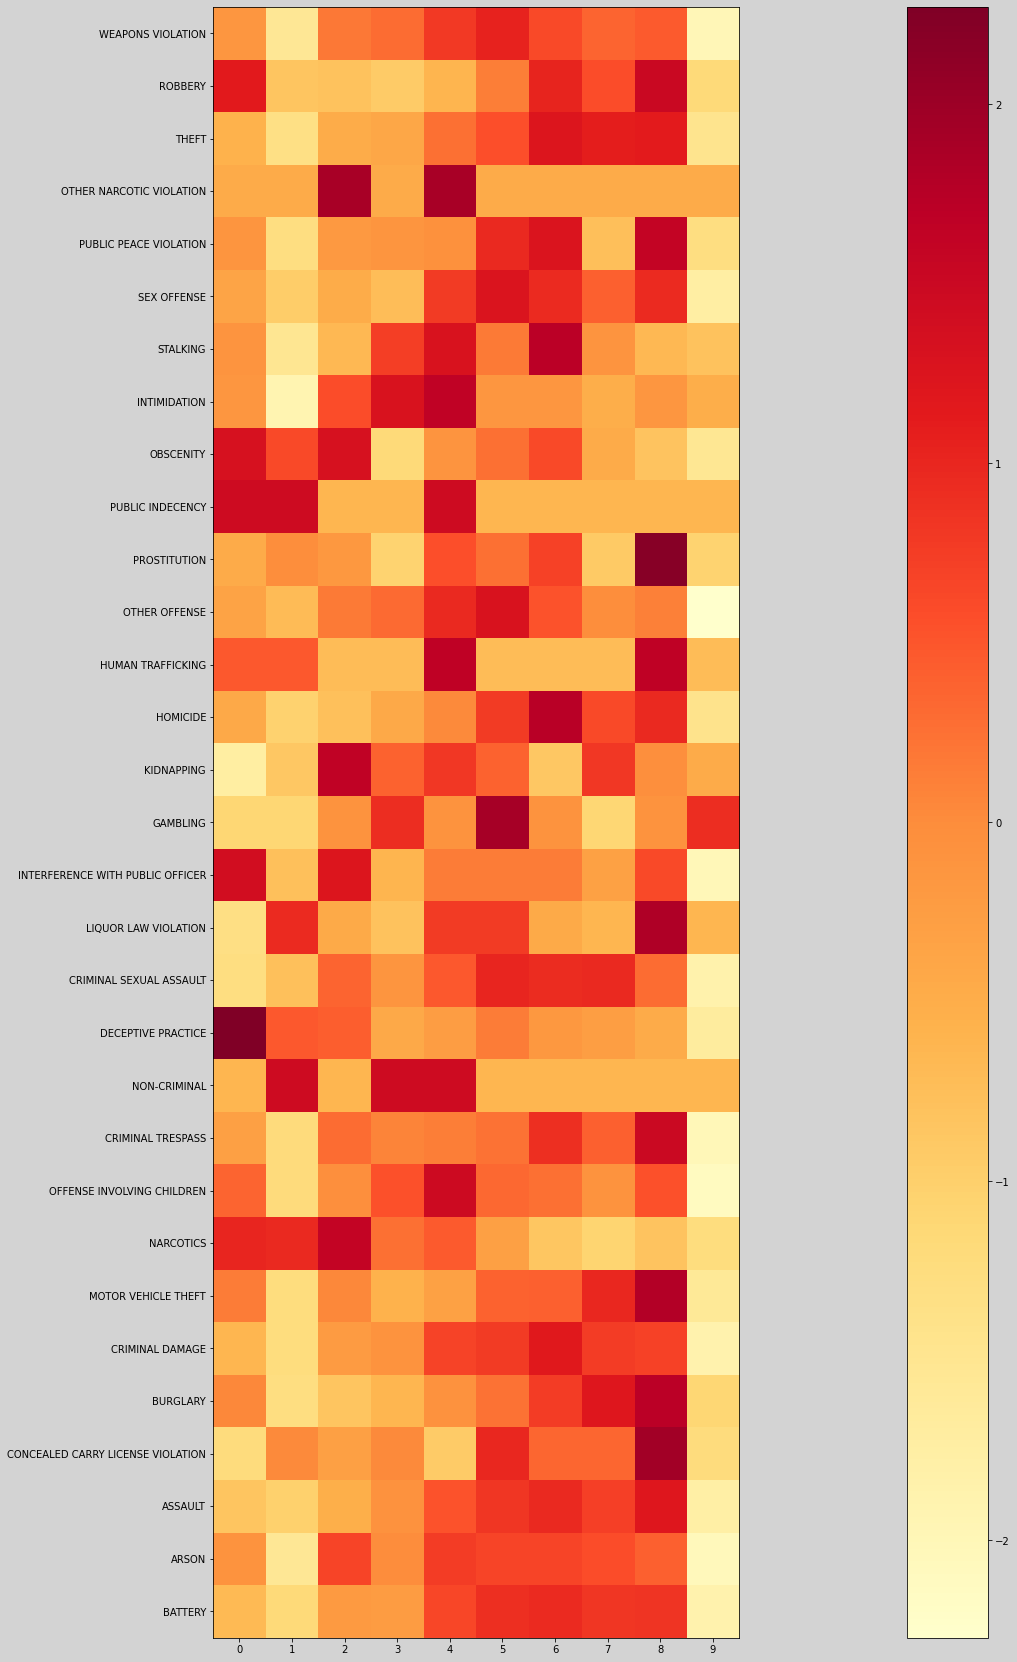

@@@ [[ 2  5]
 [ 0 30]
 [ 1 31]
 [10 29]
 [ 3 16]
 [27 33]
 [22 32]
 [34 36]
 [20 37]
 [ 7 25]
 [26 35]
 [ 8 19]
 [ 6 38]
 [15 23]
 [12 42]
 [13 28]
 [14 21]
 [ 4 40]
 [11 24]
 [17 45]
 [41 48]
 [18 49]
 [39 43]
 [ 9 46]
 [44 51]
 [47 54]
 [53 55]
 [50 52]
 [56 58]
 [57 59]]
### [0.34432499 0.728861   0.73284098 0.89171781 1.12915248 1.14502067
 1.43918109 1.50852657 1.61311567 1.6984912  1.76326205 1.76391629
 1.81128386 1.96884621 2.29675443 2.49238118 2.53601624 2.58002653
 2.68294883 2.82430303 2.98108491 3.37445683 3.54594714 3.89129523
 4.38474906 4.43285998 5.22362131 5.70248379 7.20521492 9.83024414]

$$$ [[ 2.          5.          0.34432499  2.        ]
 [ 0.         30.          0.728861    2.        ]
 [ 1.         31.          0.73284098  3.        ]
 [10.         29.          0.89171781  2.        ]
 [ 3.         16.          1.12915248  2.        ]
 [27.         33.          1.14502067  4.        ]
 [22.         32.          1.43918109  3.        ]
 [34.         36.      

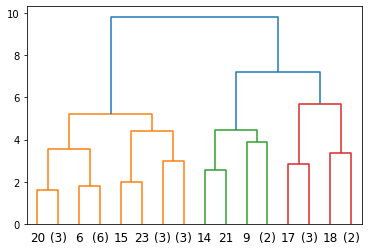

In [95]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(month_by_type)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


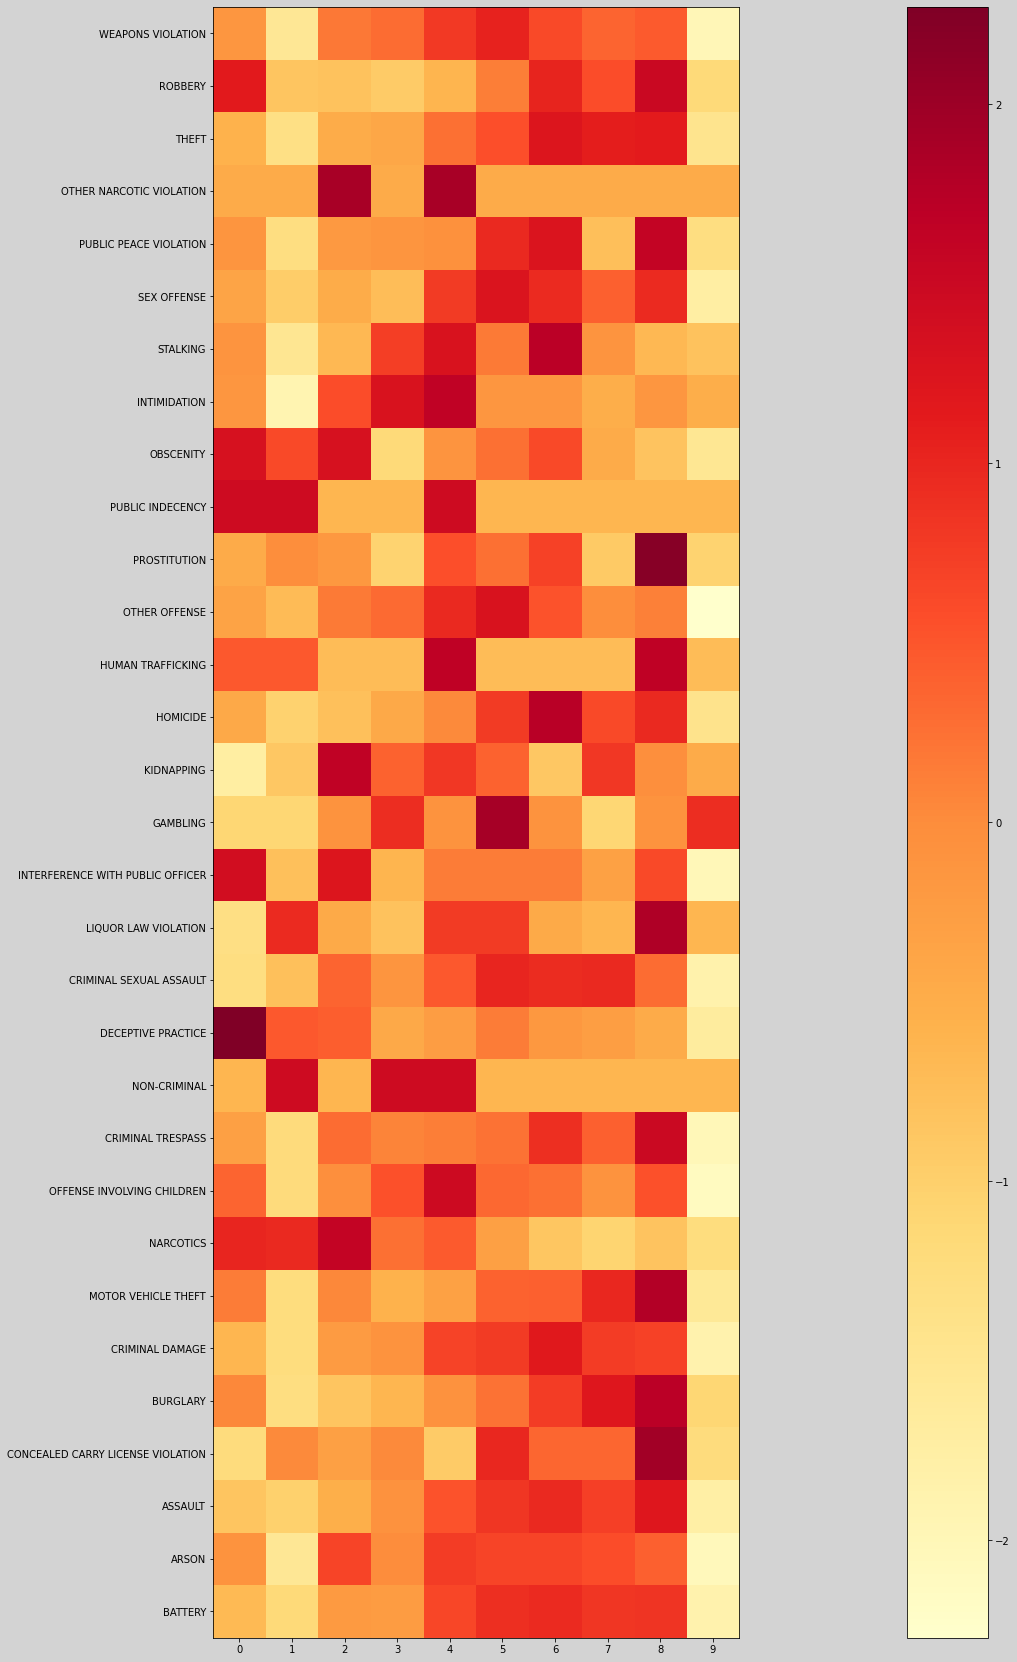

@@@ [[ 2  5]
 [ 0 30]
 [ 1 31]
 [10 29]
 [ 3 16]
 [27 33]
 [22 32]
 [34 36]
 [20 37]
 [ 7 25]
 [26 35]
 [ 8 19]
 [ 6 38]
 [15 23]
 [12 42]
 [13 28]
 [14 21]
 [ 4 40]
 [11 24]
 [17 45]
 [41 48]
 [18 49]
 [39 43]
 [ 9 46]
 [44 51]
 [47 54]
 [53 55]
 [50 52]
 [56 58]
 [57 59]]
### [0.34432499 0.728861   0.73284098 0.89171781 1.12915248 1.14502067
 1.43918109 1.50852657 1.61311567 1.6984912  1.76326205 1.76391629
 1.81128386 1.96884621 2.29675443 2.49238118 2.53601624 2.58002653
 2.68294883 2.82430303 2.98108491 3.37445683 3.54594714 3.89129523
 4.38474906 4.43285998 5.22362131 5.70248379 7.20521492 9.83024414]


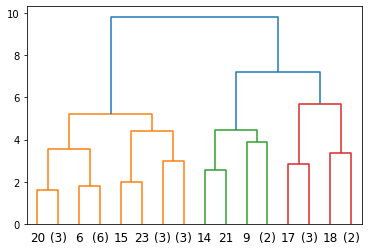

In [91]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(month_by_type)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


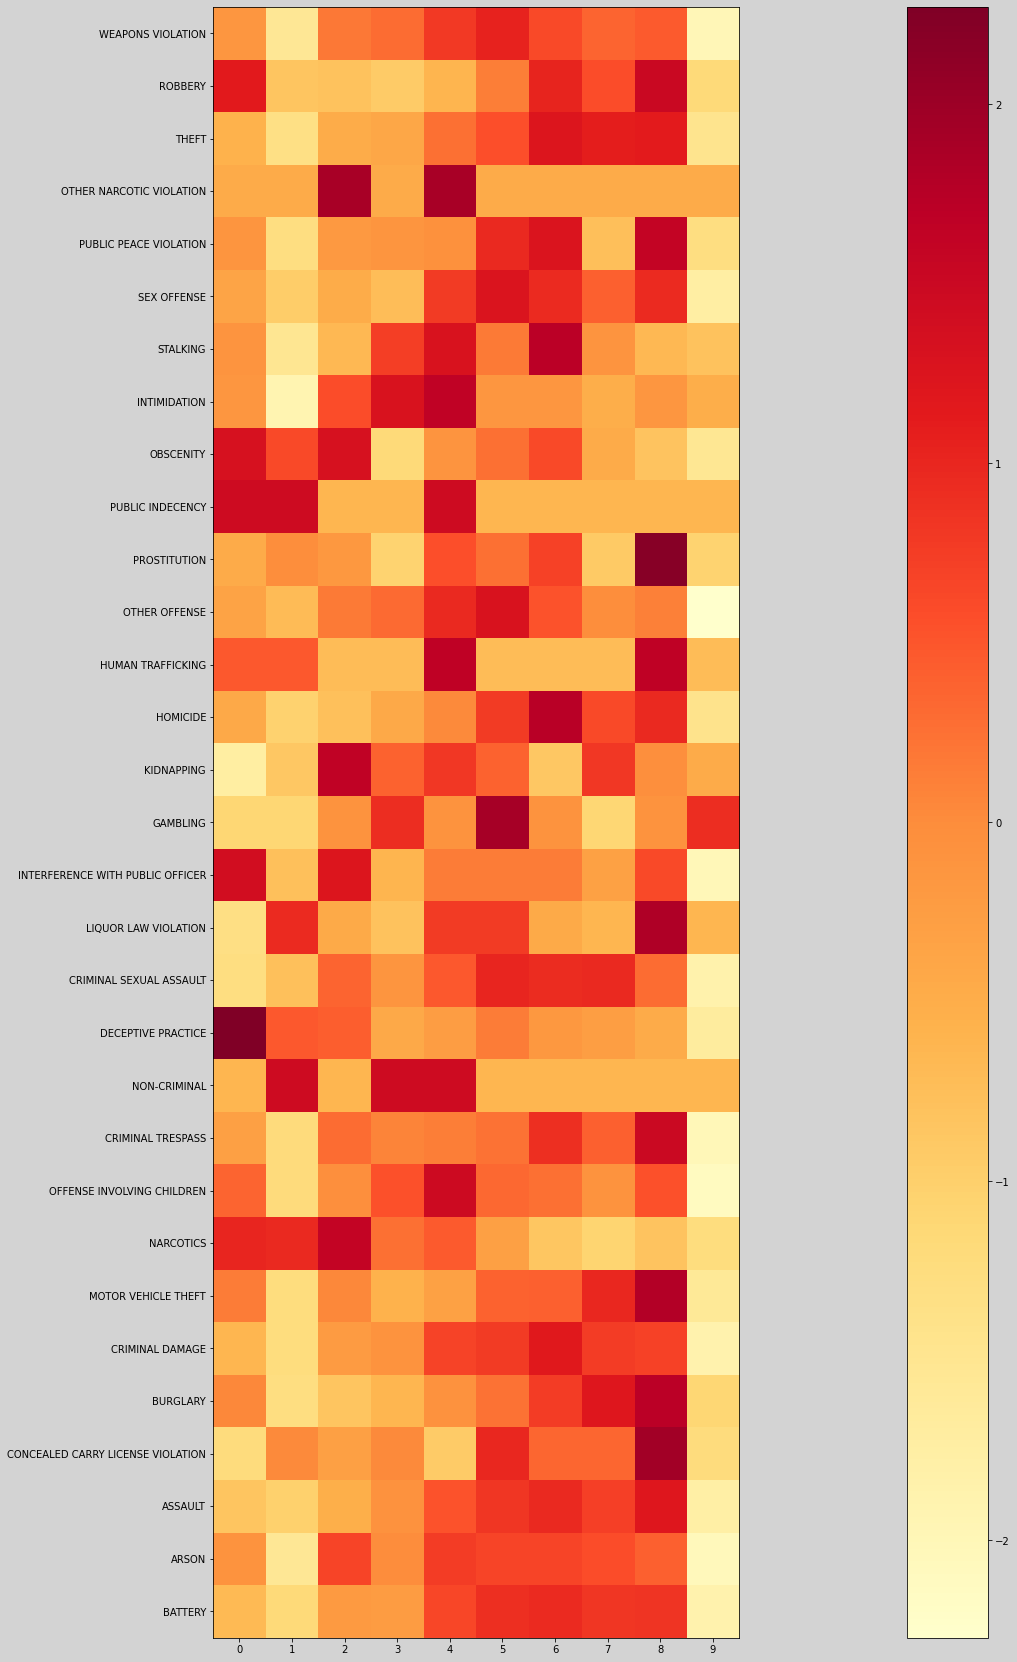

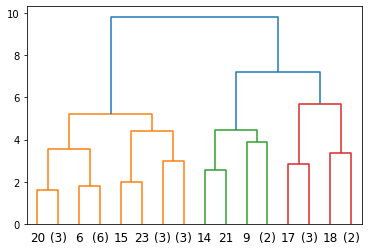

In [89]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(month_by_type)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[6 7 8 0 1 2 3 4 5 9]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

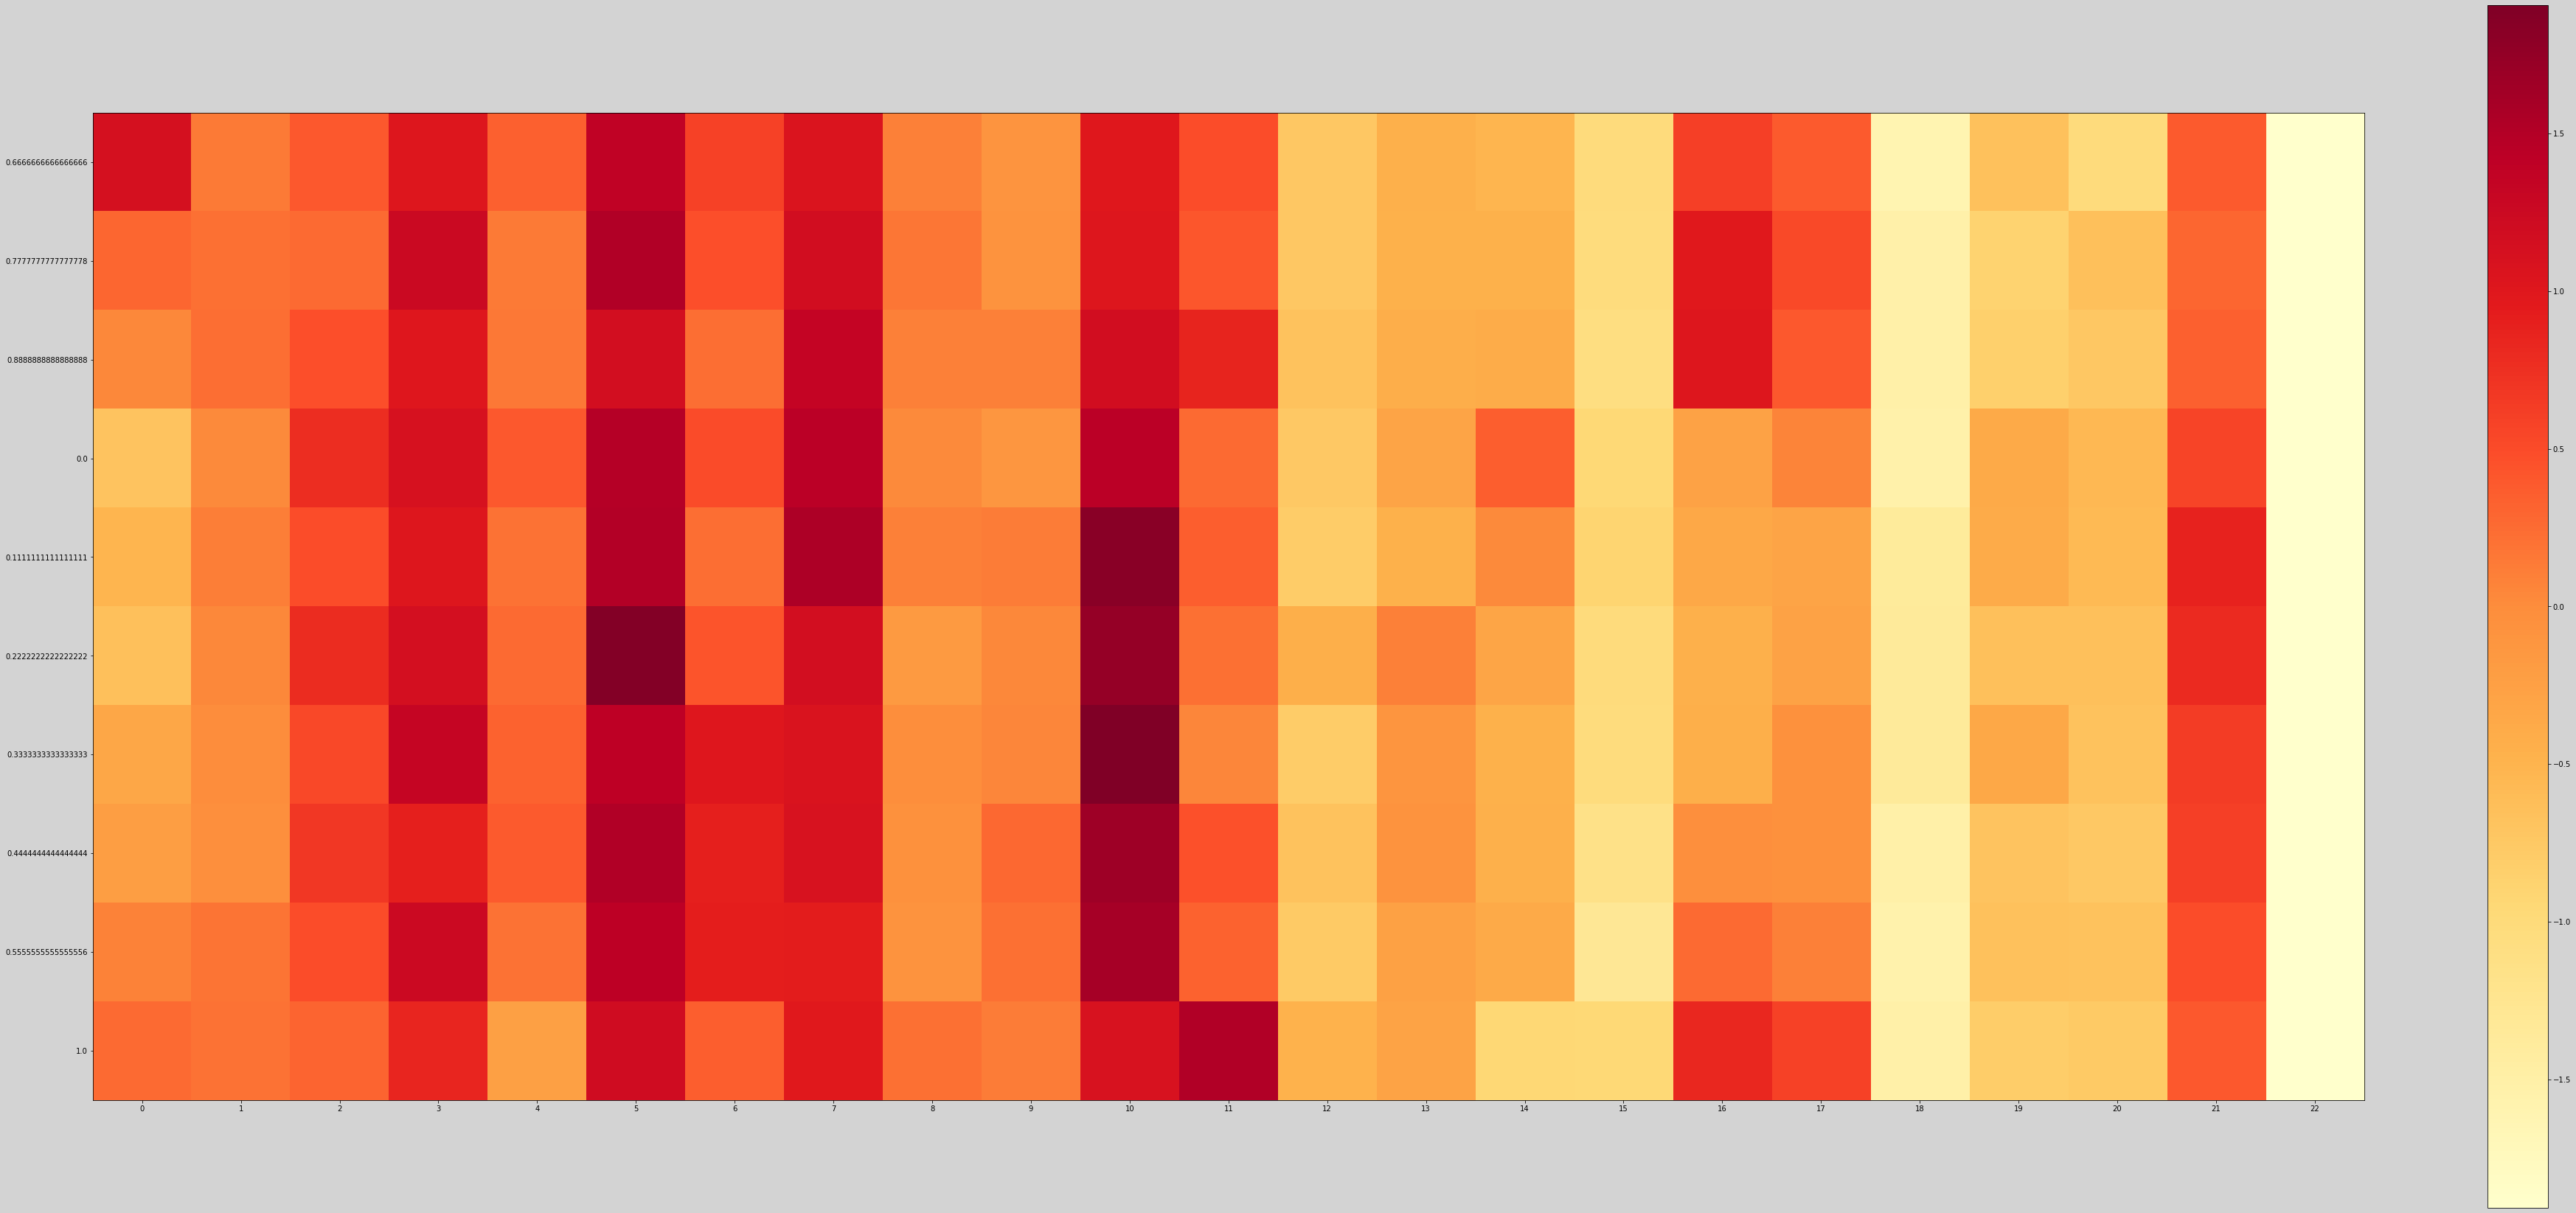

----------------------------------------------------------------------


AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [81]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
# agg_fit = agg_clustering(district_month)
# plot_dendrogram(agg_fit, truncate_mode="level", p=3)
agg_clustering(district_month)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[9 7 8 5 6 2 3 0 1 4]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

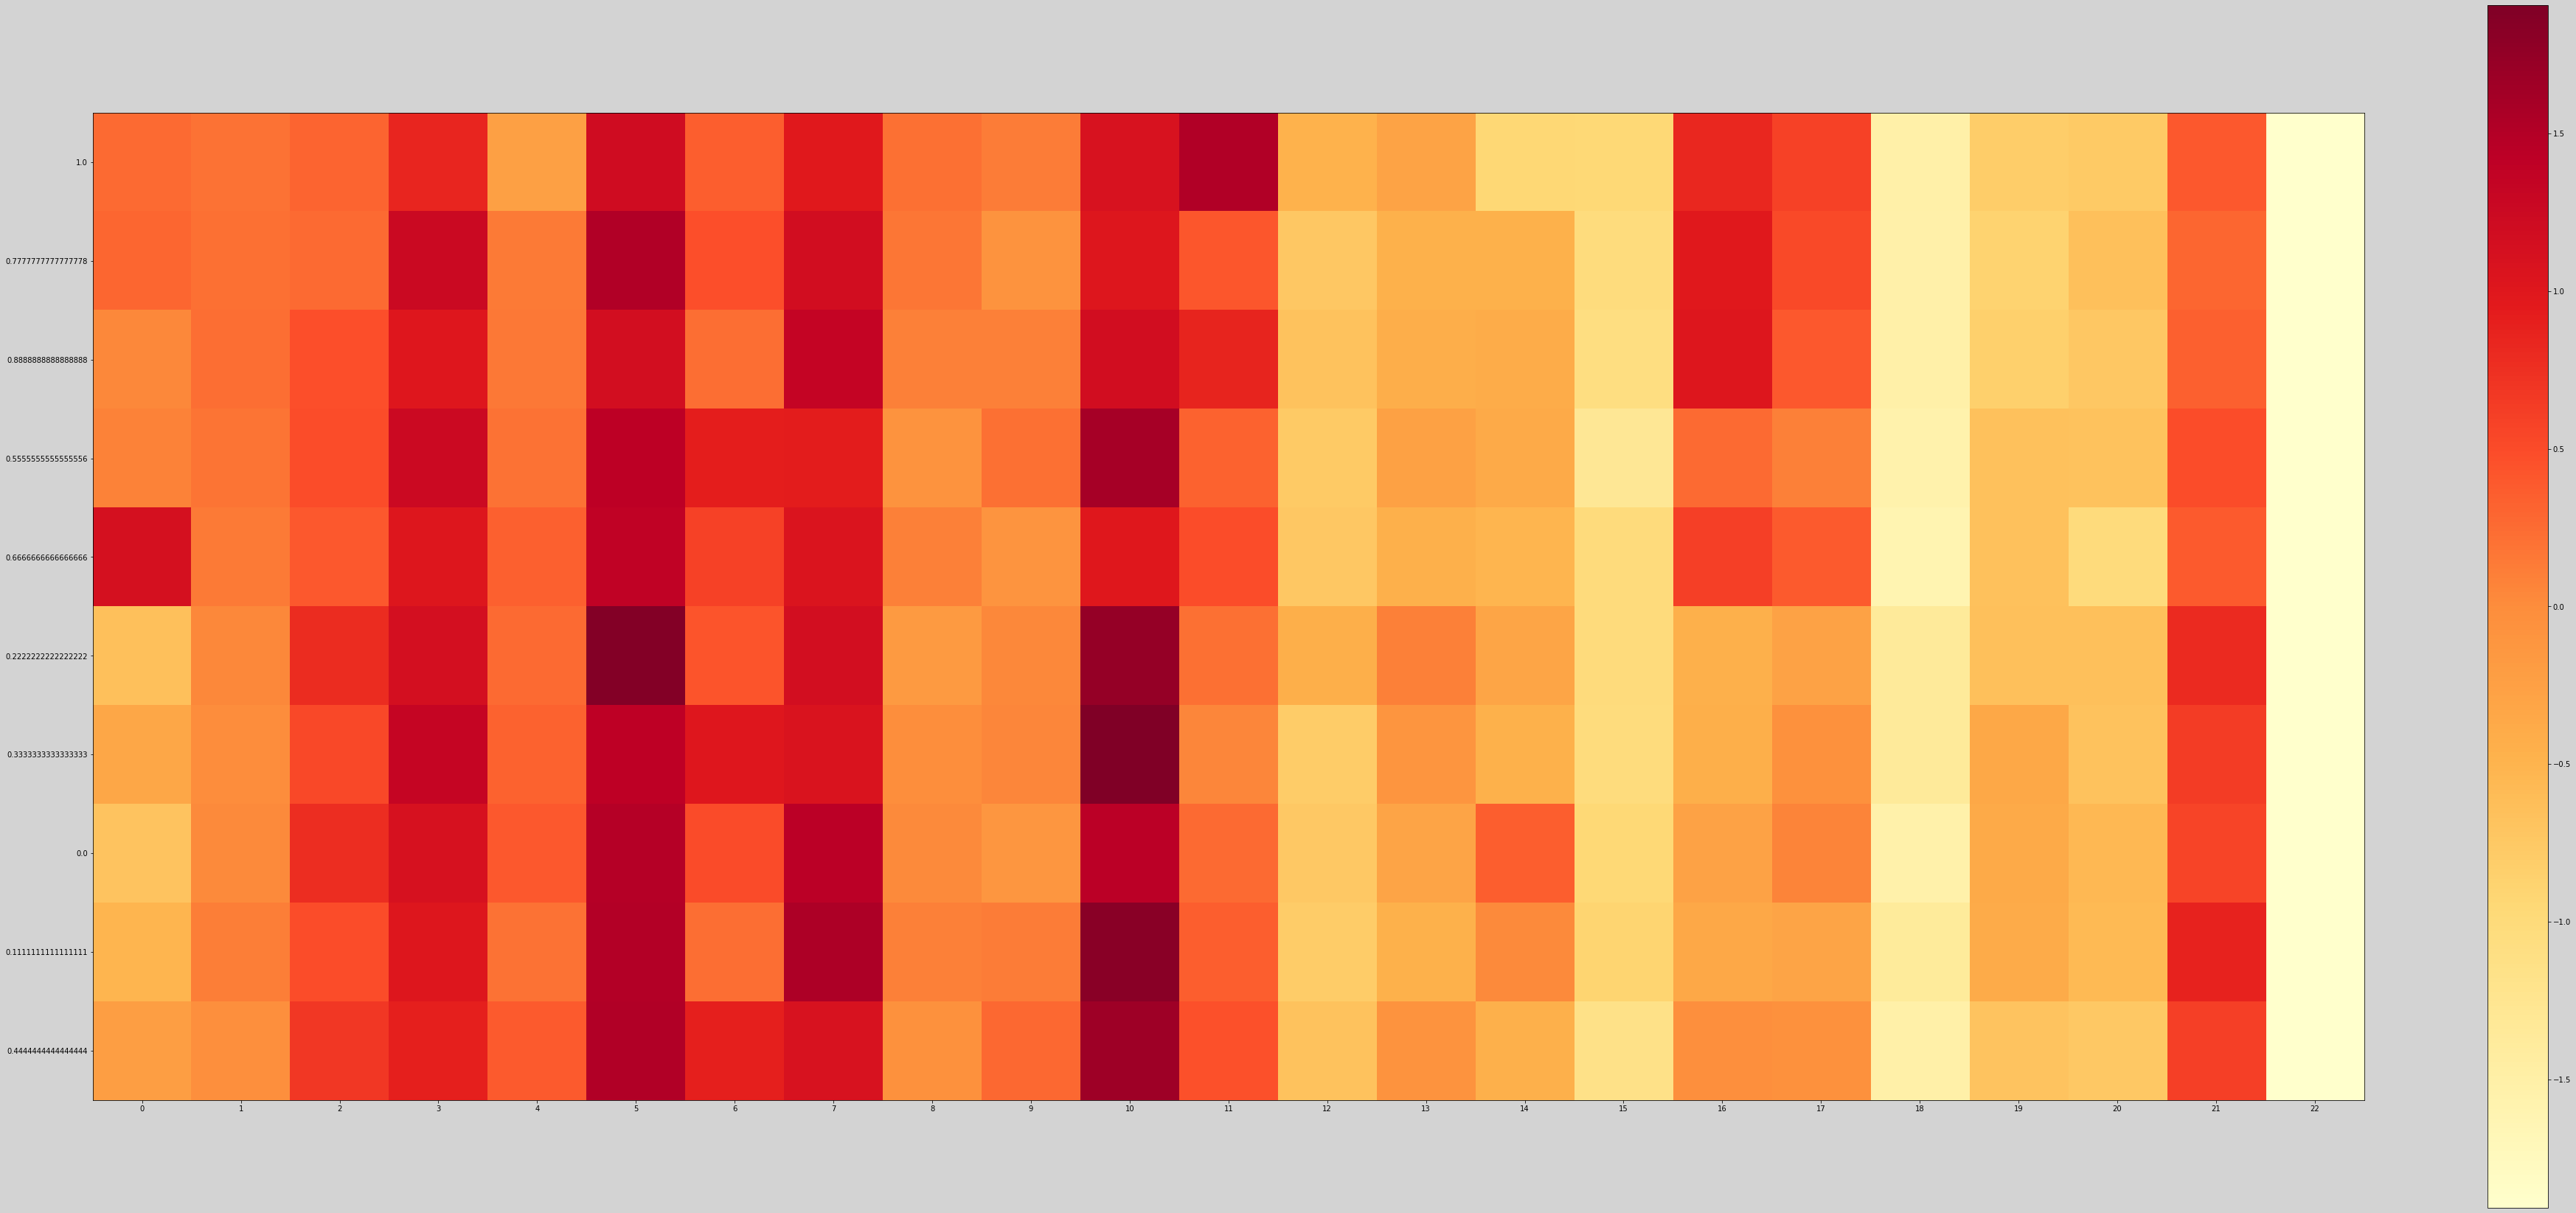

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [66]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(district_month)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[0 1 2 3 4 5 6 7 8 9]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

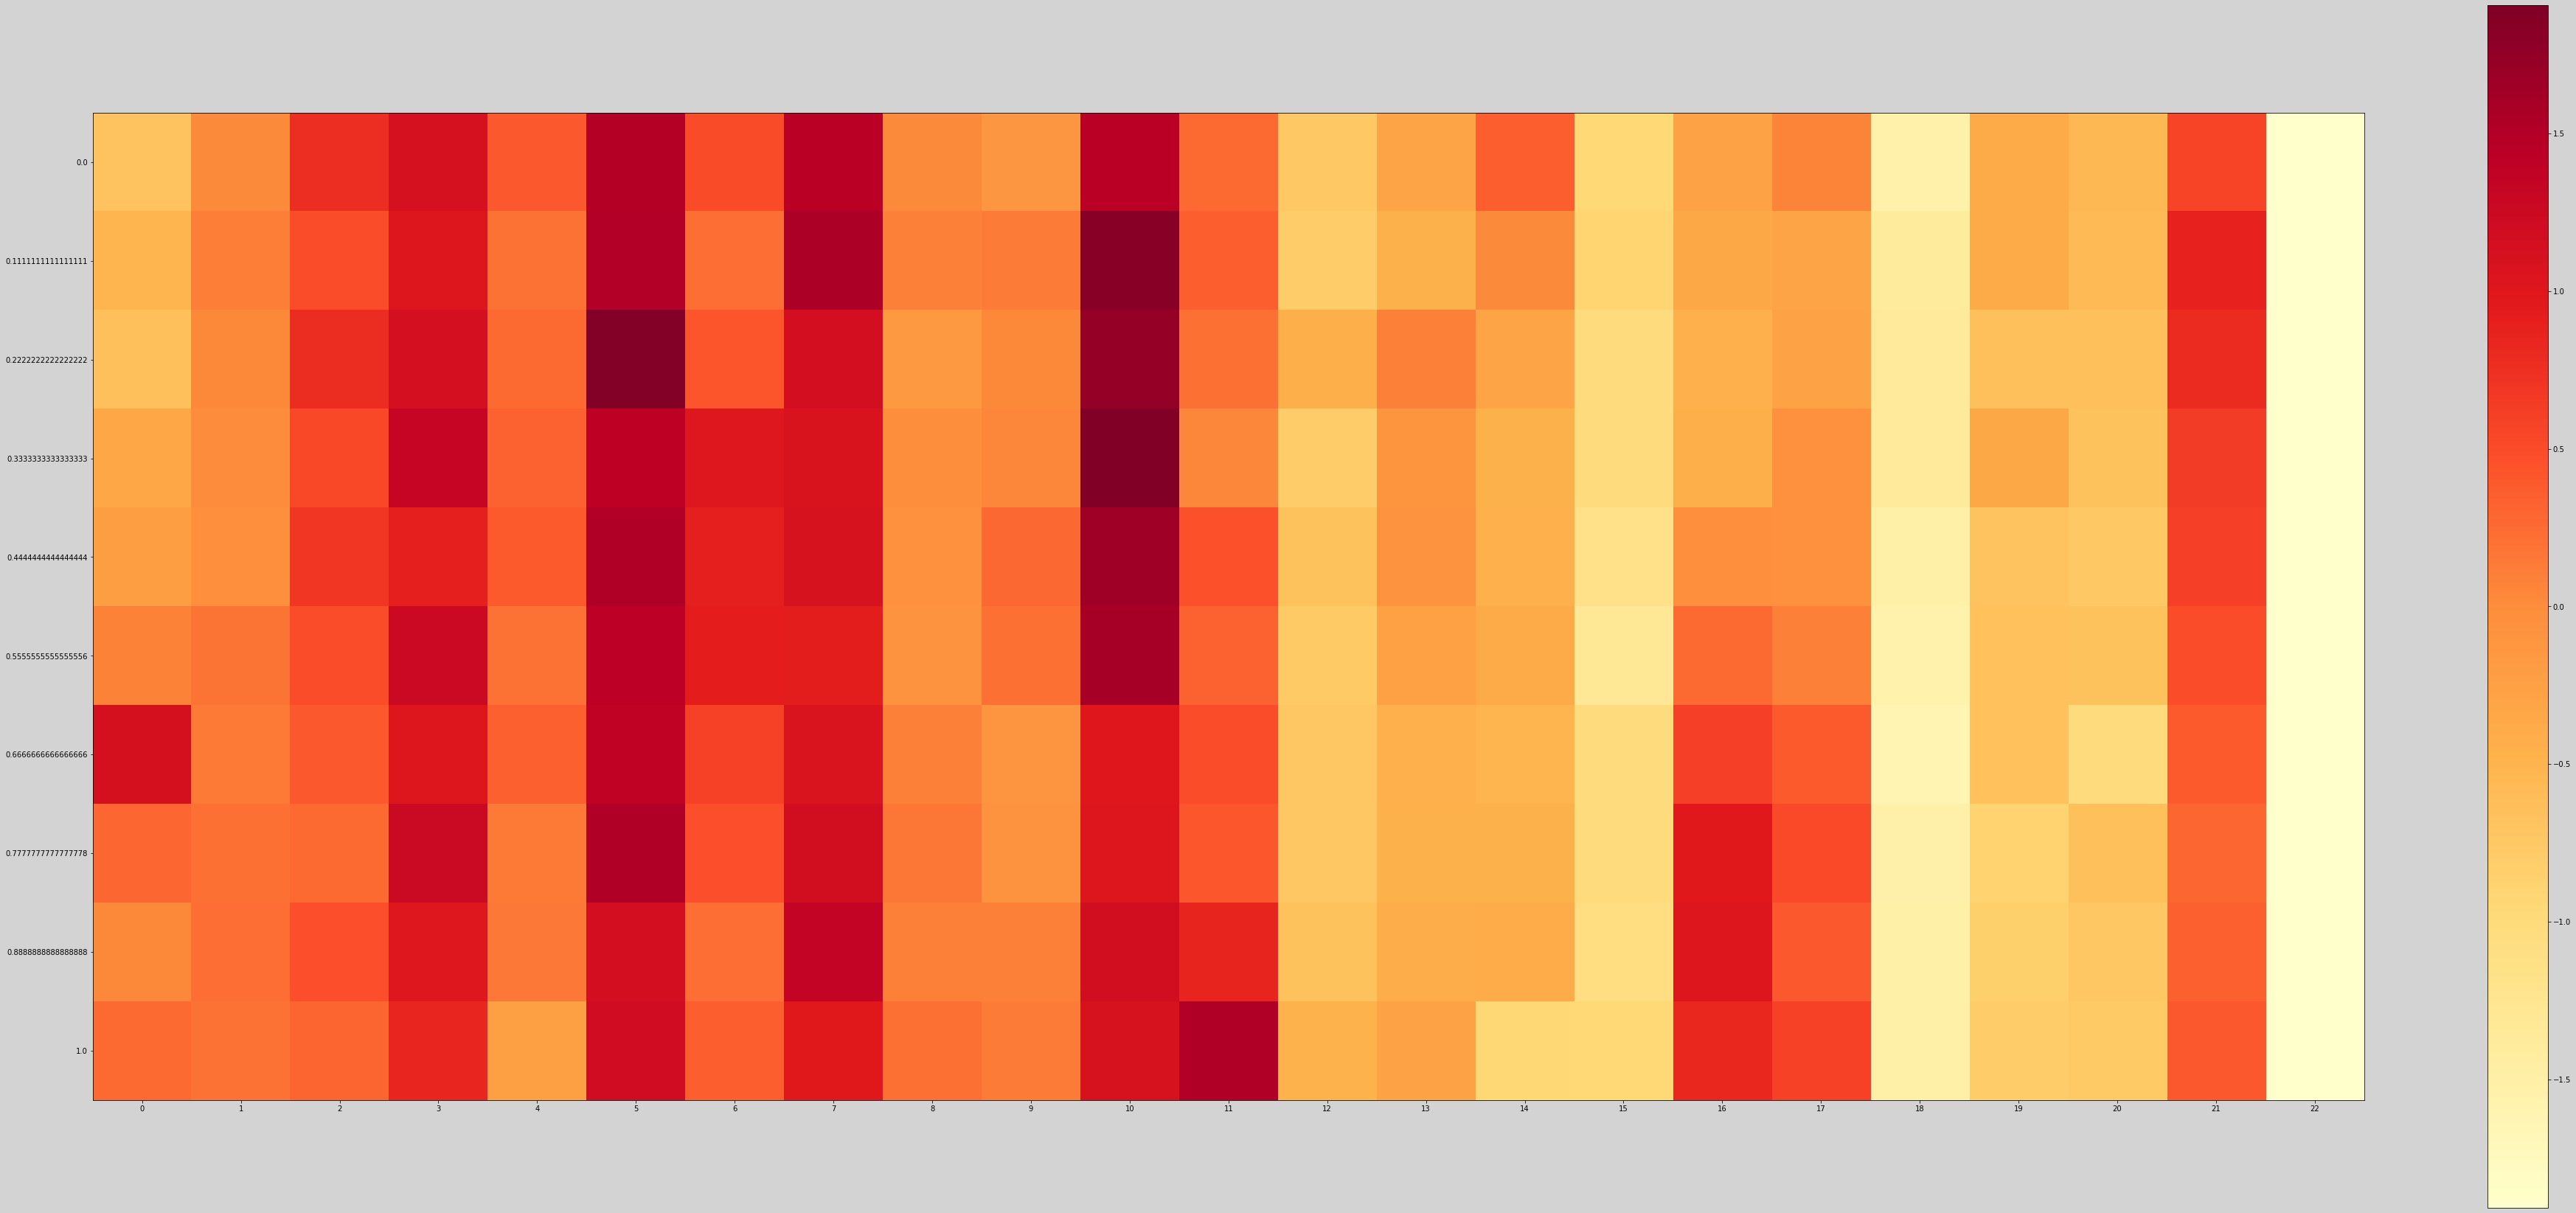

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [62]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(district_month)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[9 7 8 5 6 2 3 0 1 4]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

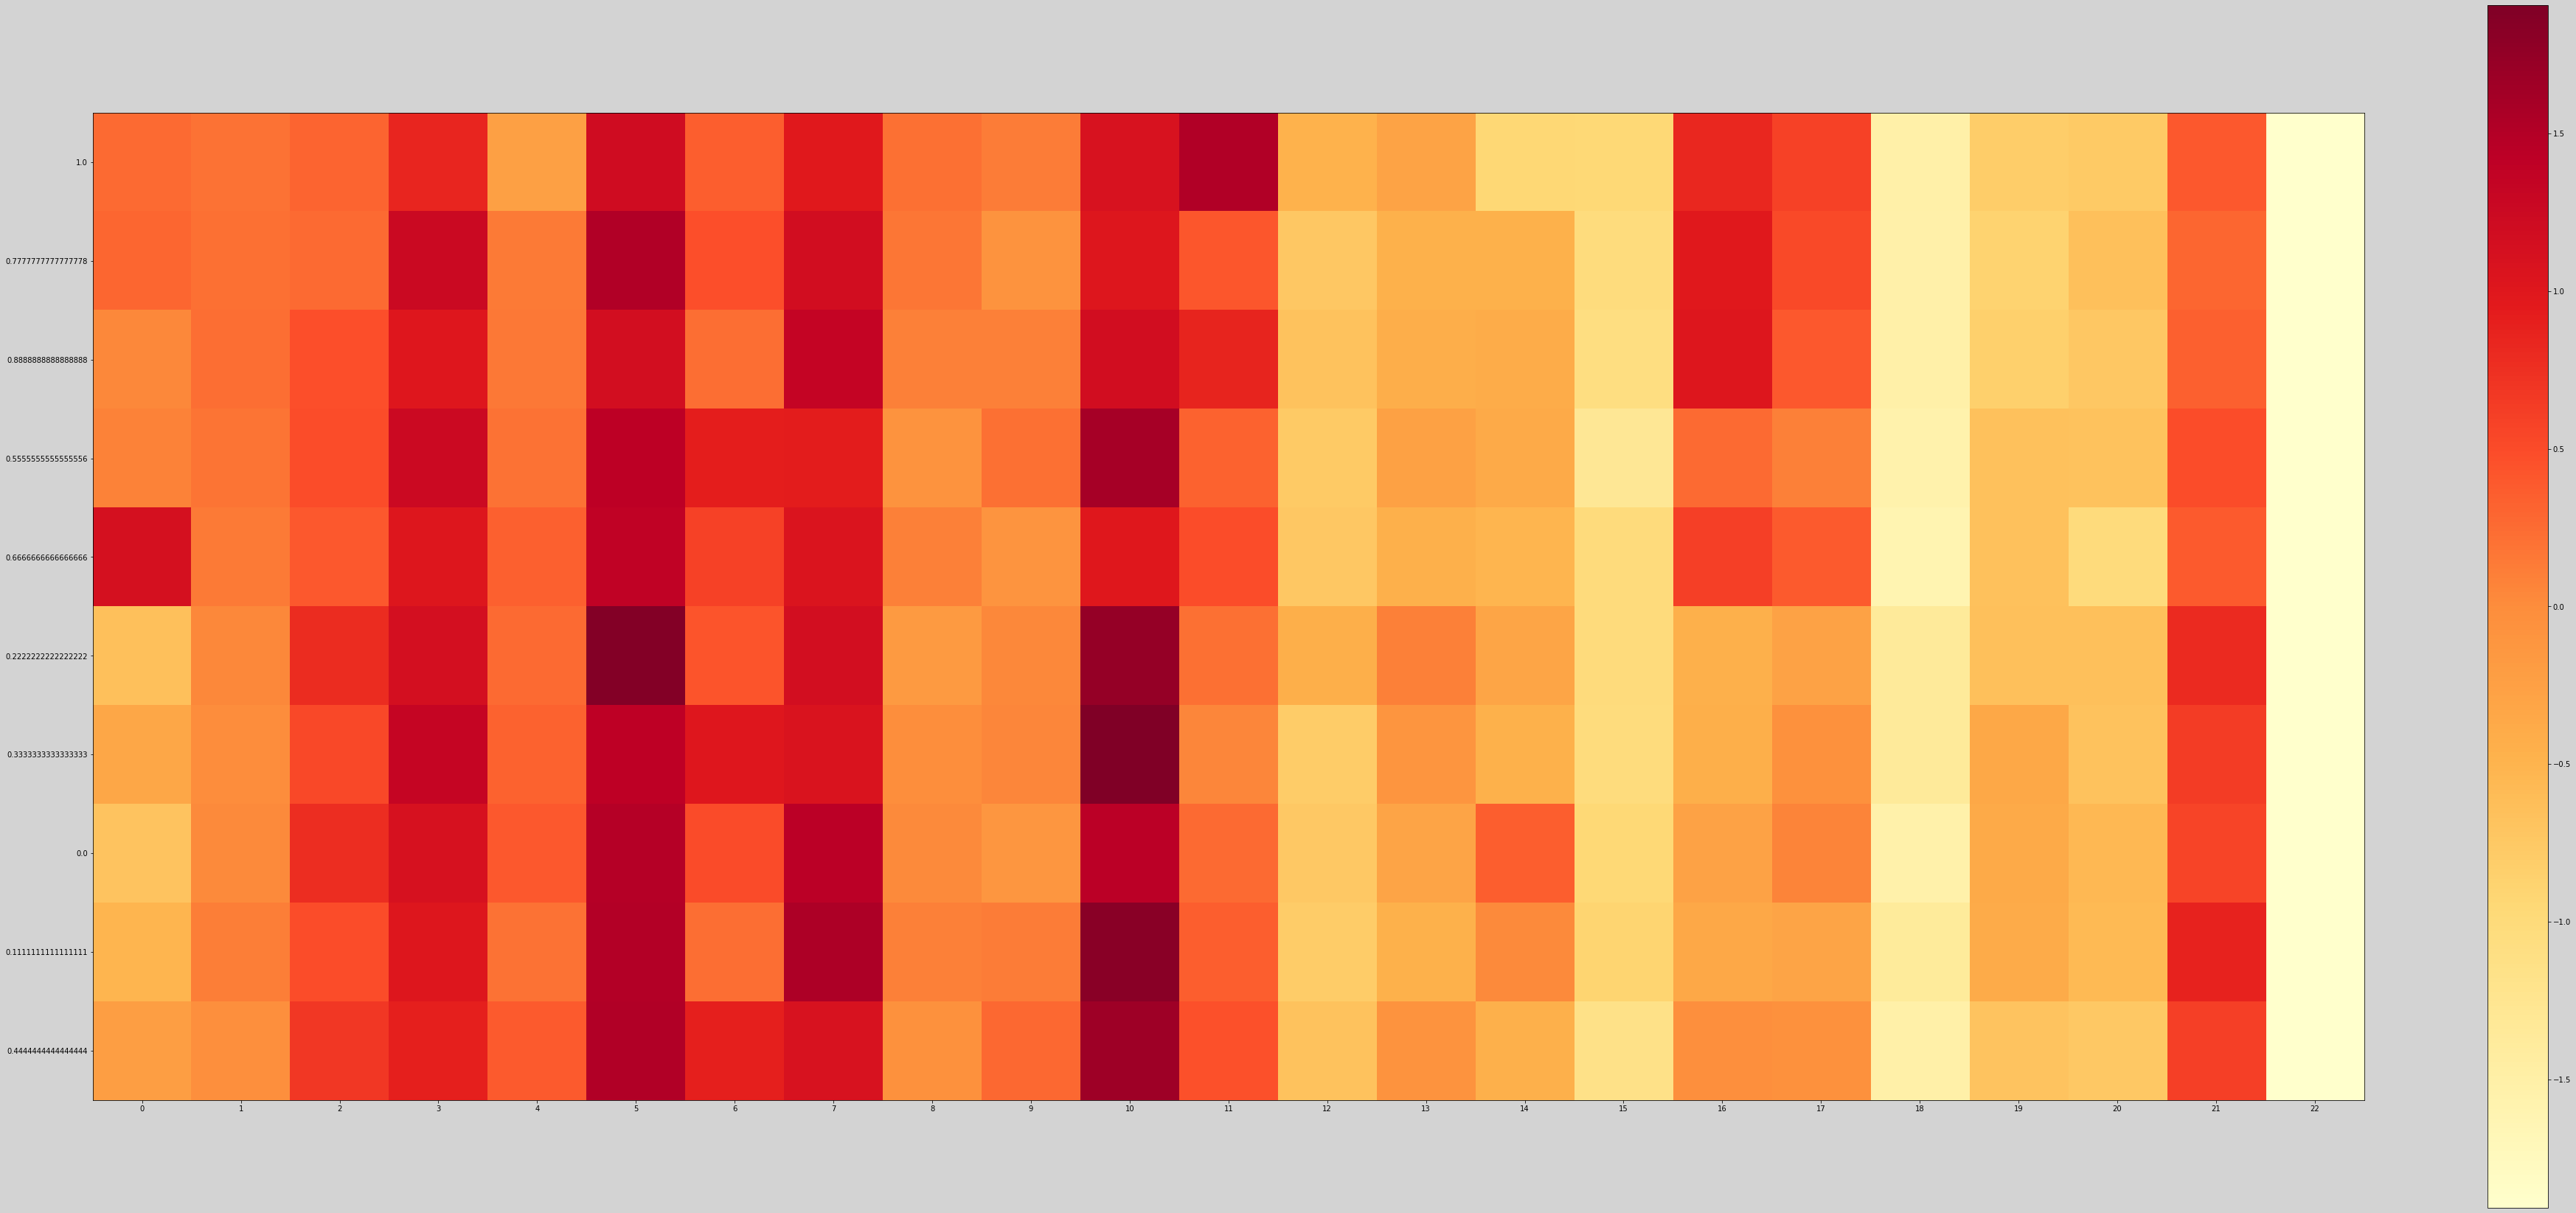

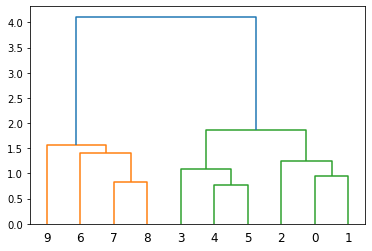

In [53]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(district_month)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[6 7 8 0 1 2 3 4 5 9]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

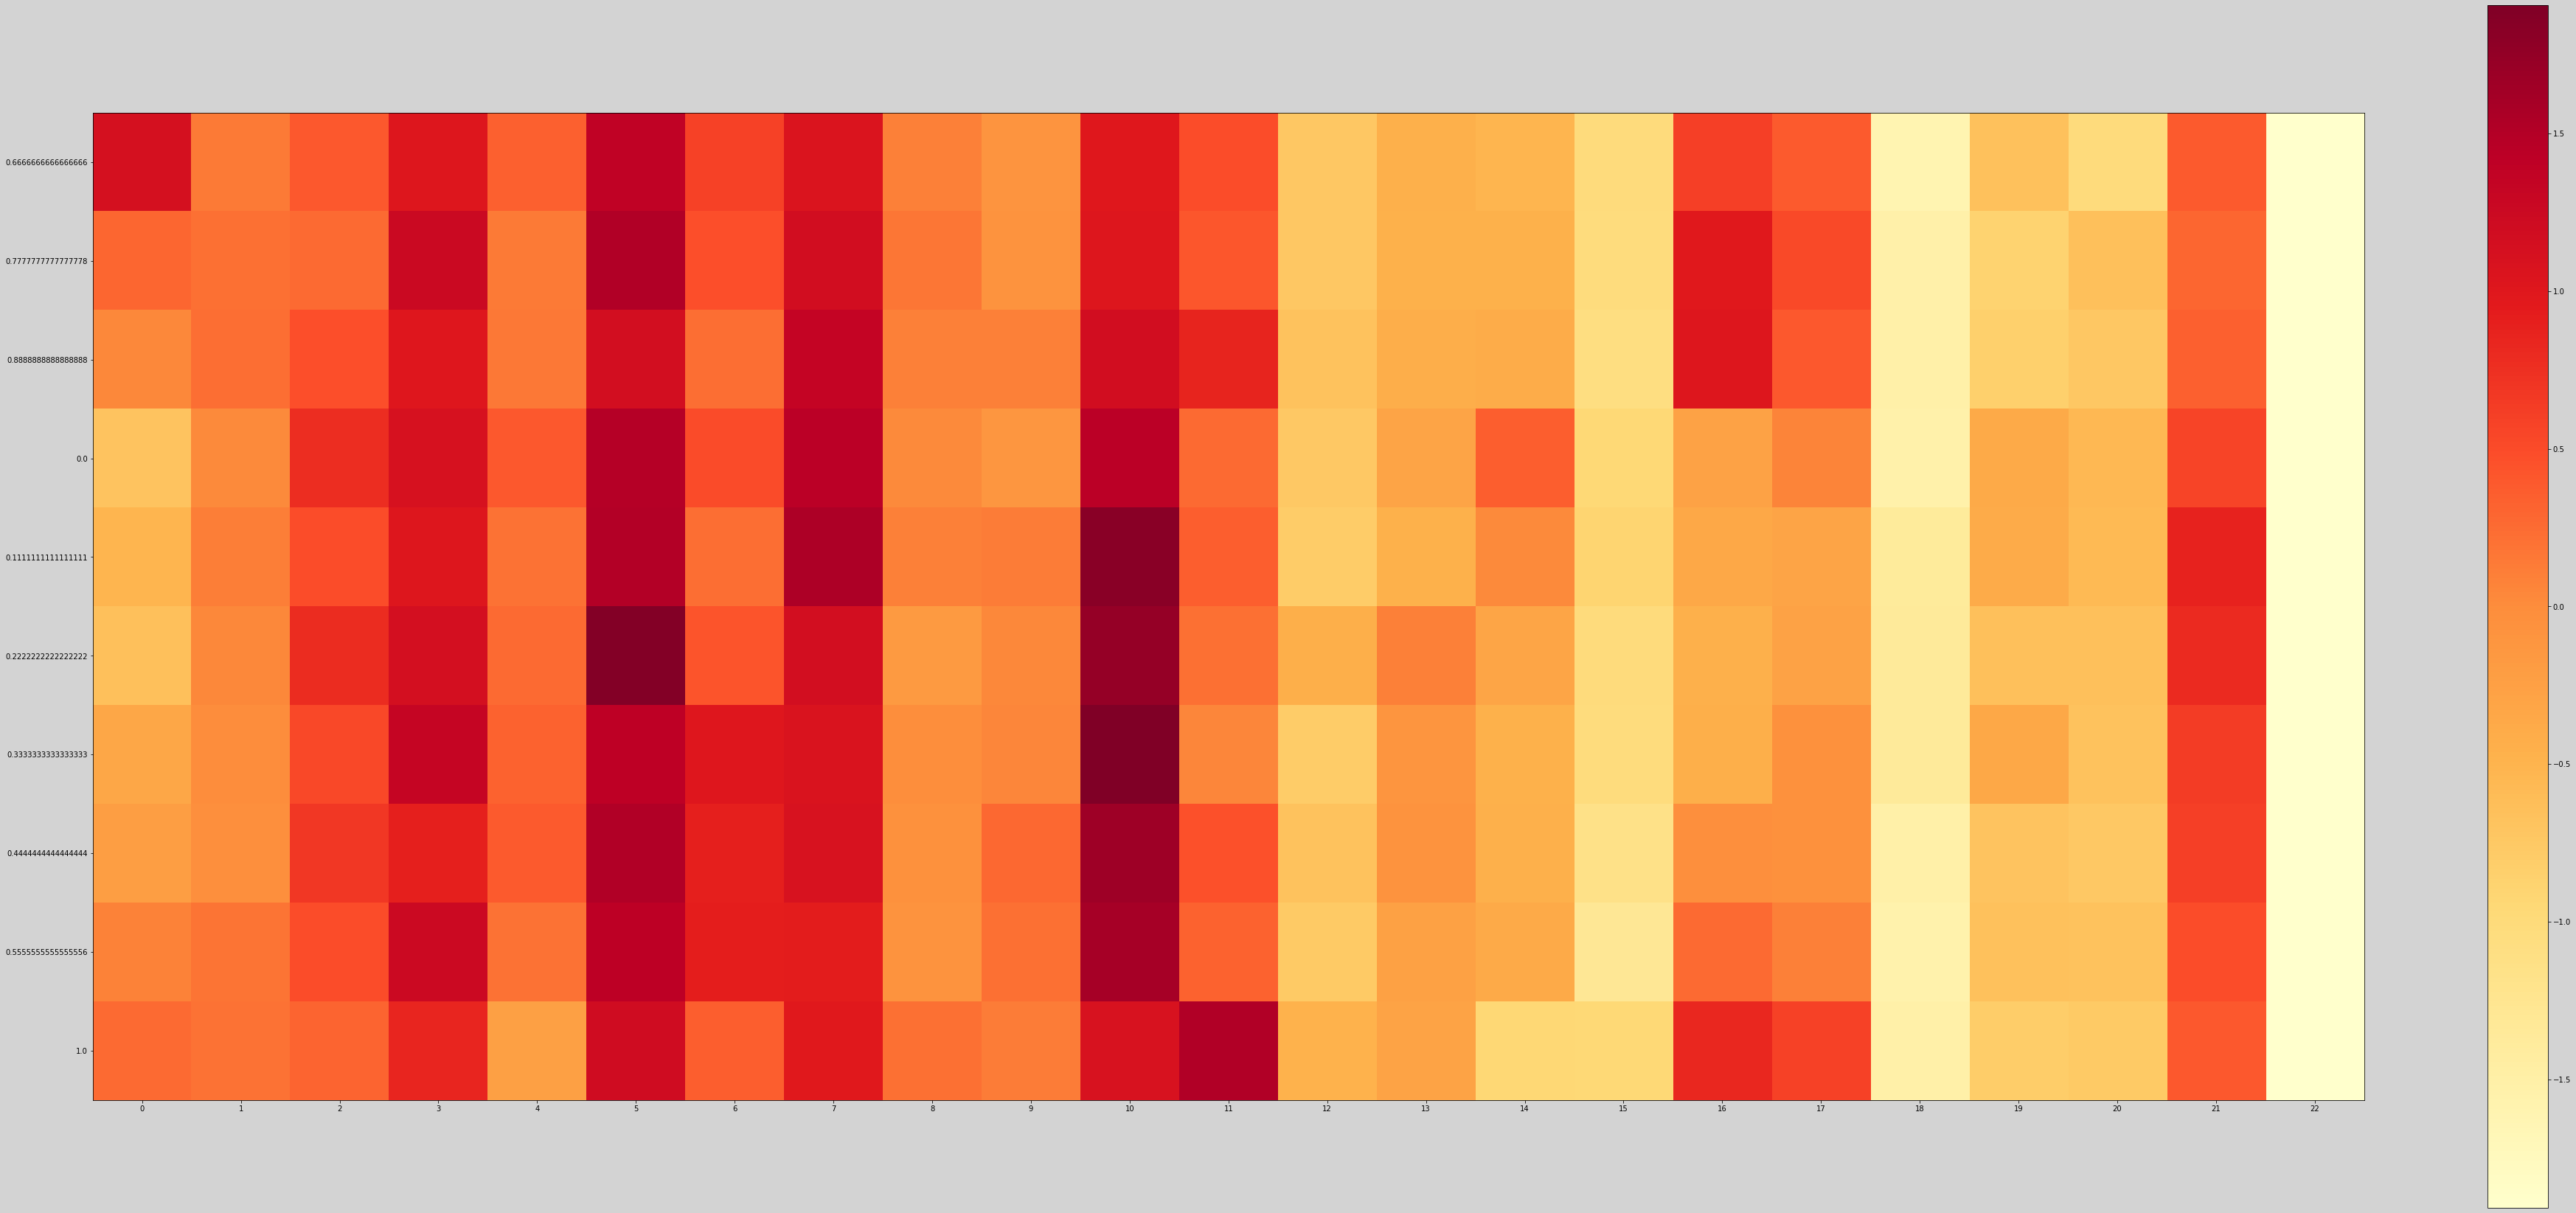

AttributeError: 'AgglomerativeClustering' object has no attribute 'distances_'

In [58]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(district_month)
plot_dendrogram(agg_fit, truncate_mode="level", p=3)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[9 7 8 5 6 2 3 0 1 4]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

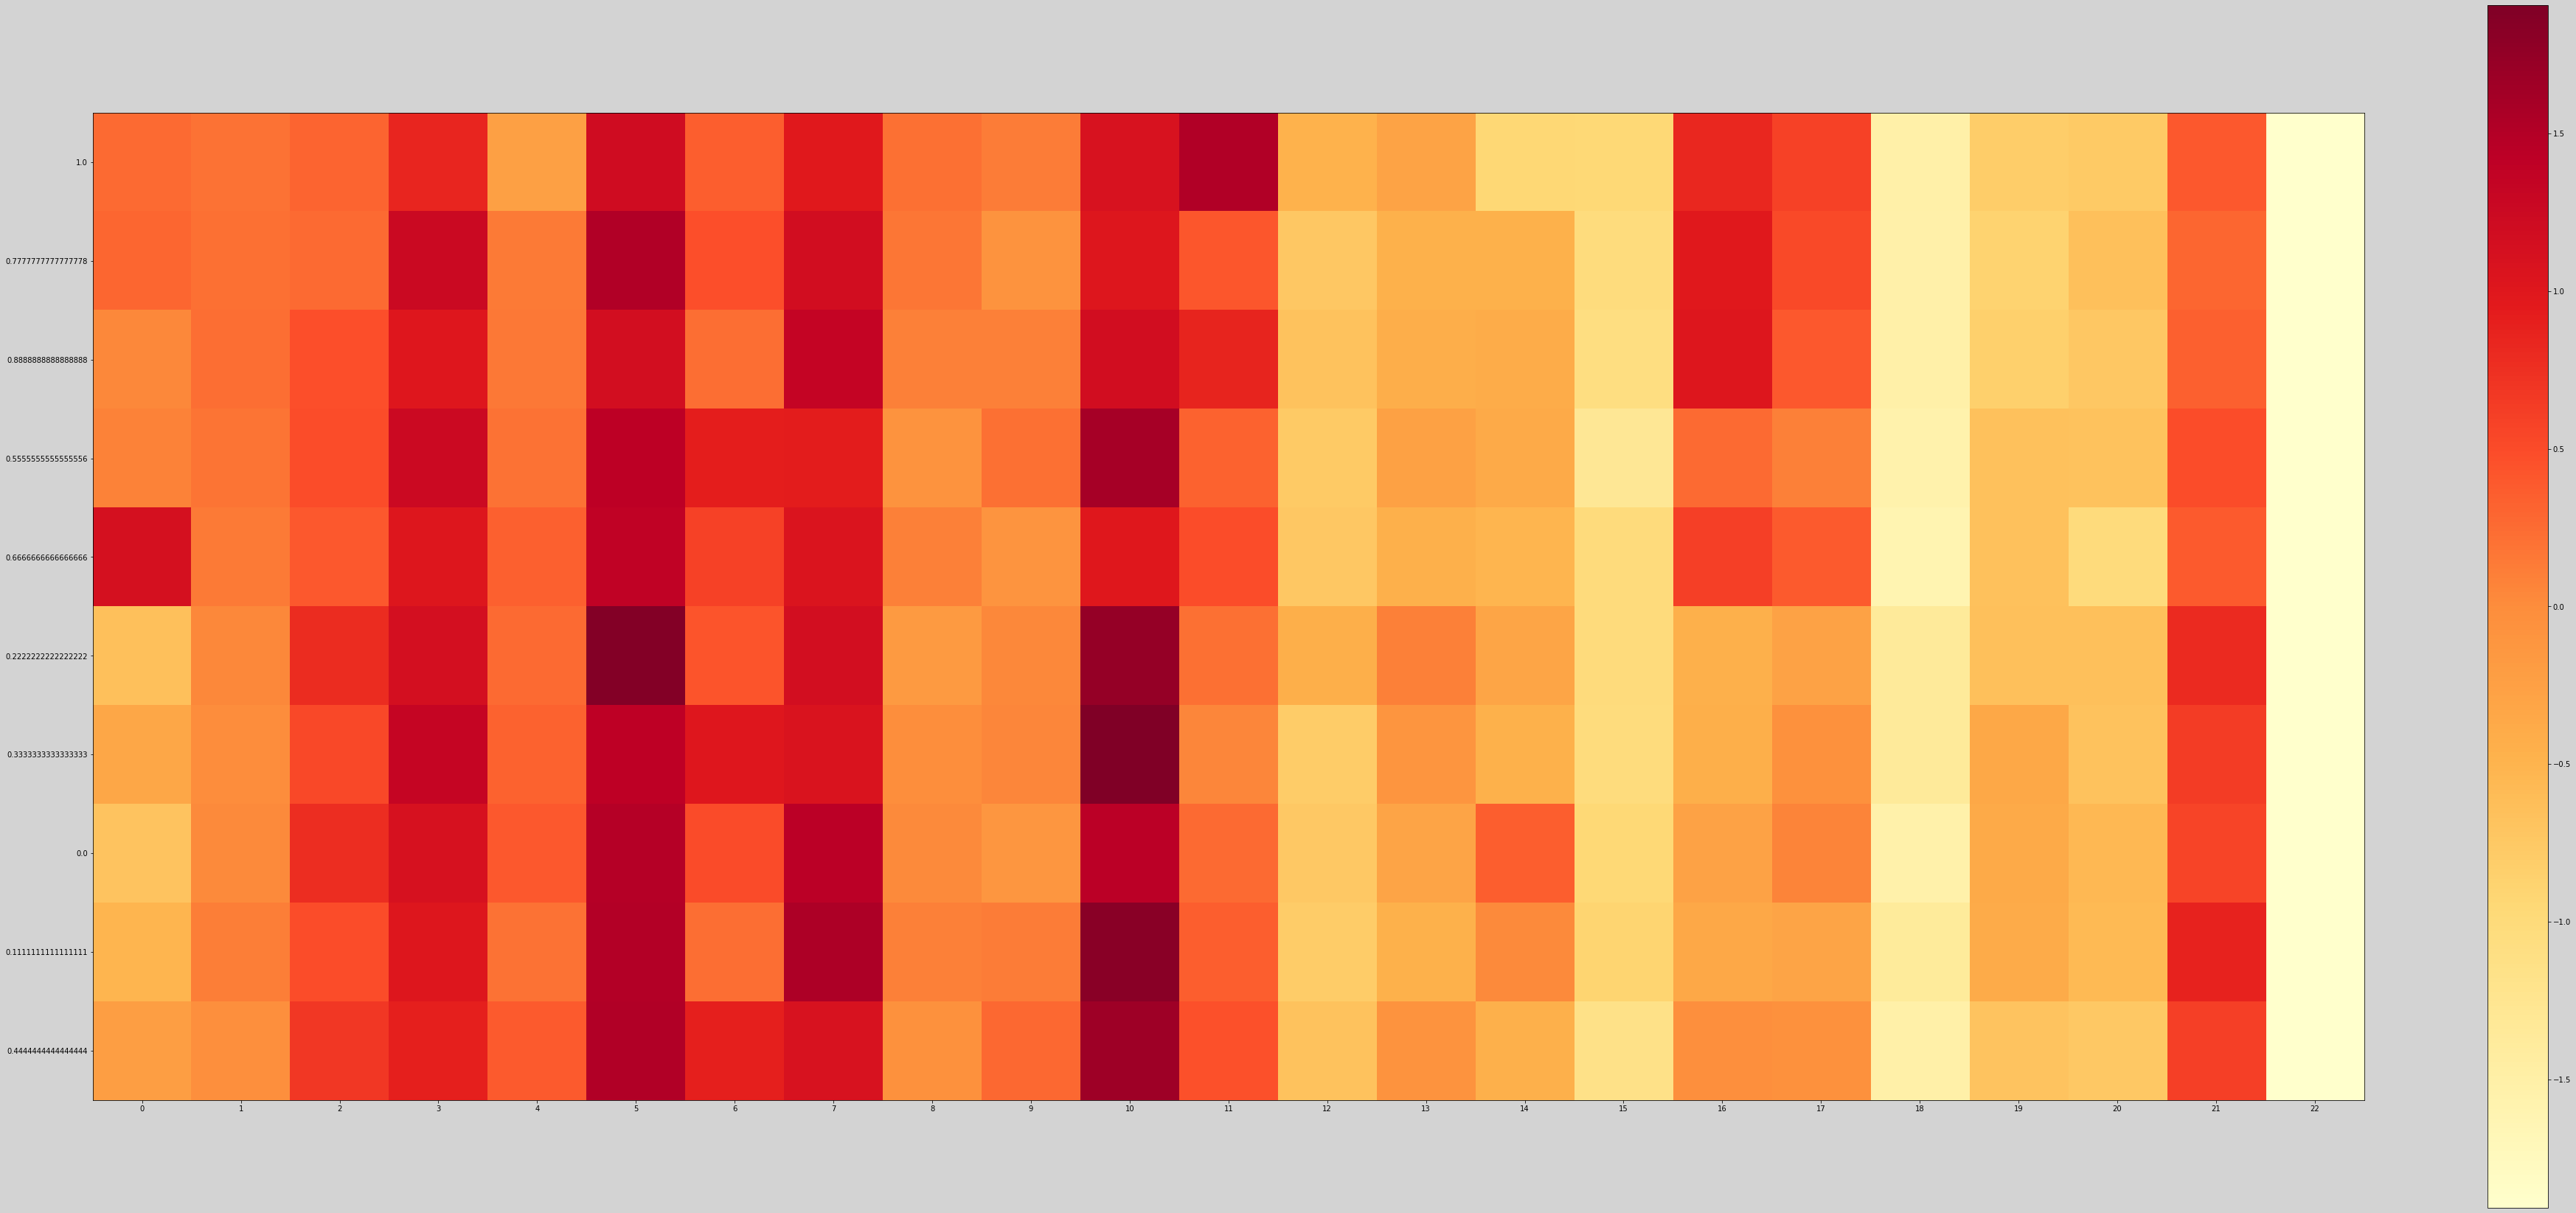

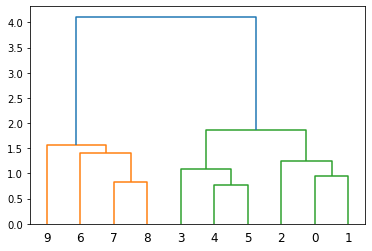

In [52]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_fit = agg_clustering(district_month)
plot_dendrogram(agg_fit, truncate_mode="level", p=10)

In [16]:
a

''

In [10]:
ix

NameError: name 'ix' is not defined

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[30 26 29 21 25 27 28 13 19 24 23 22 11 10 14  9 12 15  6  8 18  7 20 17
 16  5  3  4  1  0  2]
31
month                              0.000000  0.111111  0.222222  0.333333  \
Primary Type                                                                
WEAPONS VIOLATION                 -0.152645 -1.560769  0.178678  0.291091   
ROBBERY                            1.150738 -0.847787 -0.808134 -0.935024   
THEFT                             -0.576633 -1.342474 -0.489350 -0.397843   
OTHER NARCOTIC VIOLATION          -0.474342 -0.474342  1.897367 -0.474342   
PUBLIC PEACE VIOLATION            -0.126745 -1.278973 -0.184356 -0.126745   
SEX OFFENSE                       -0.371140 -0.969753 -0.490863 -0.730308   
STALKING                          -0.111949 -1.511315 -0.671696  0.727670   
INTIMIDATION                      -0.143019 -1.930762  0.572078  1.287174   
OBSCENITY                          1.325757  0.609132  1.325757 -1.182432   
PUBLIC INDECENCY                   1.449138  1.449138 

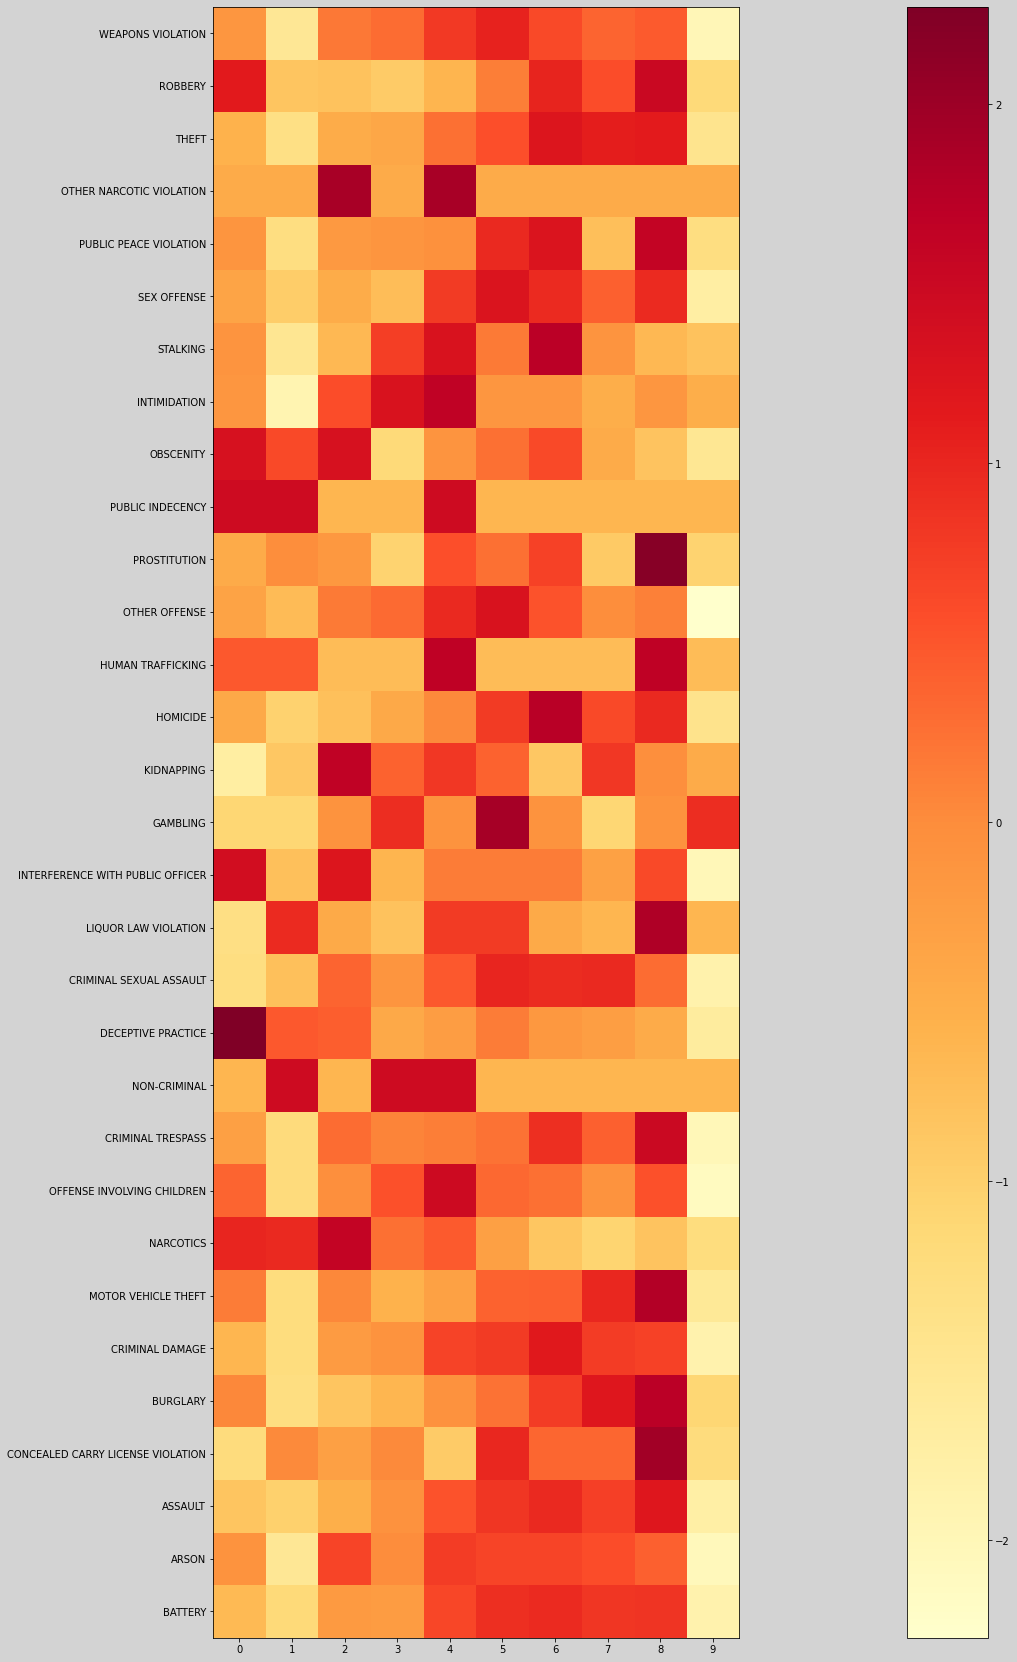

In [32]:
#district_crimeType
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_clustering(month_by_type)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[25 26  3  4 16  7 19 17 12  8 11 24  5 10 29  6  2 27  1 13 28 14 21 15
 23  9  0 20 22 30 18]
31
month                              0.000000  0.111111  0.222222  0.333333  \
Primary Type                                                                
PUBLIC PEACE VIOLATION            -0.126745 -1.278973 -0.184356 -0.126745   
ROBBERY                            1.150738 -0.847787 -0.808134 -0.935024   
BURGLARY                           0.037617 -1.288880 -0.843415 -0.625632   
CONCEALED CARRY LICENSE VIOLATION -1.240895  0.031818 -0.286360  0.031818   
MOTOR VEHICLE THEFT                0.145592 -1.253389  0.039855 -0.570166   
CRIMINAL TRESPASS                 -0.299399 -1.222358  0.285892  0.083291   
OBSCENITY                          1.325757  0.609132  1.325757 -1.182432   
NARCOTICS                          0.993650  0.966220  1.610824  0.259899   
INTERFERENCE WITH PUBLIC OFFICER   1.388730 -0.771517  1.234427 -0.617213   
DECEPTIVE PRACTICE                 2.271045  0.477758 

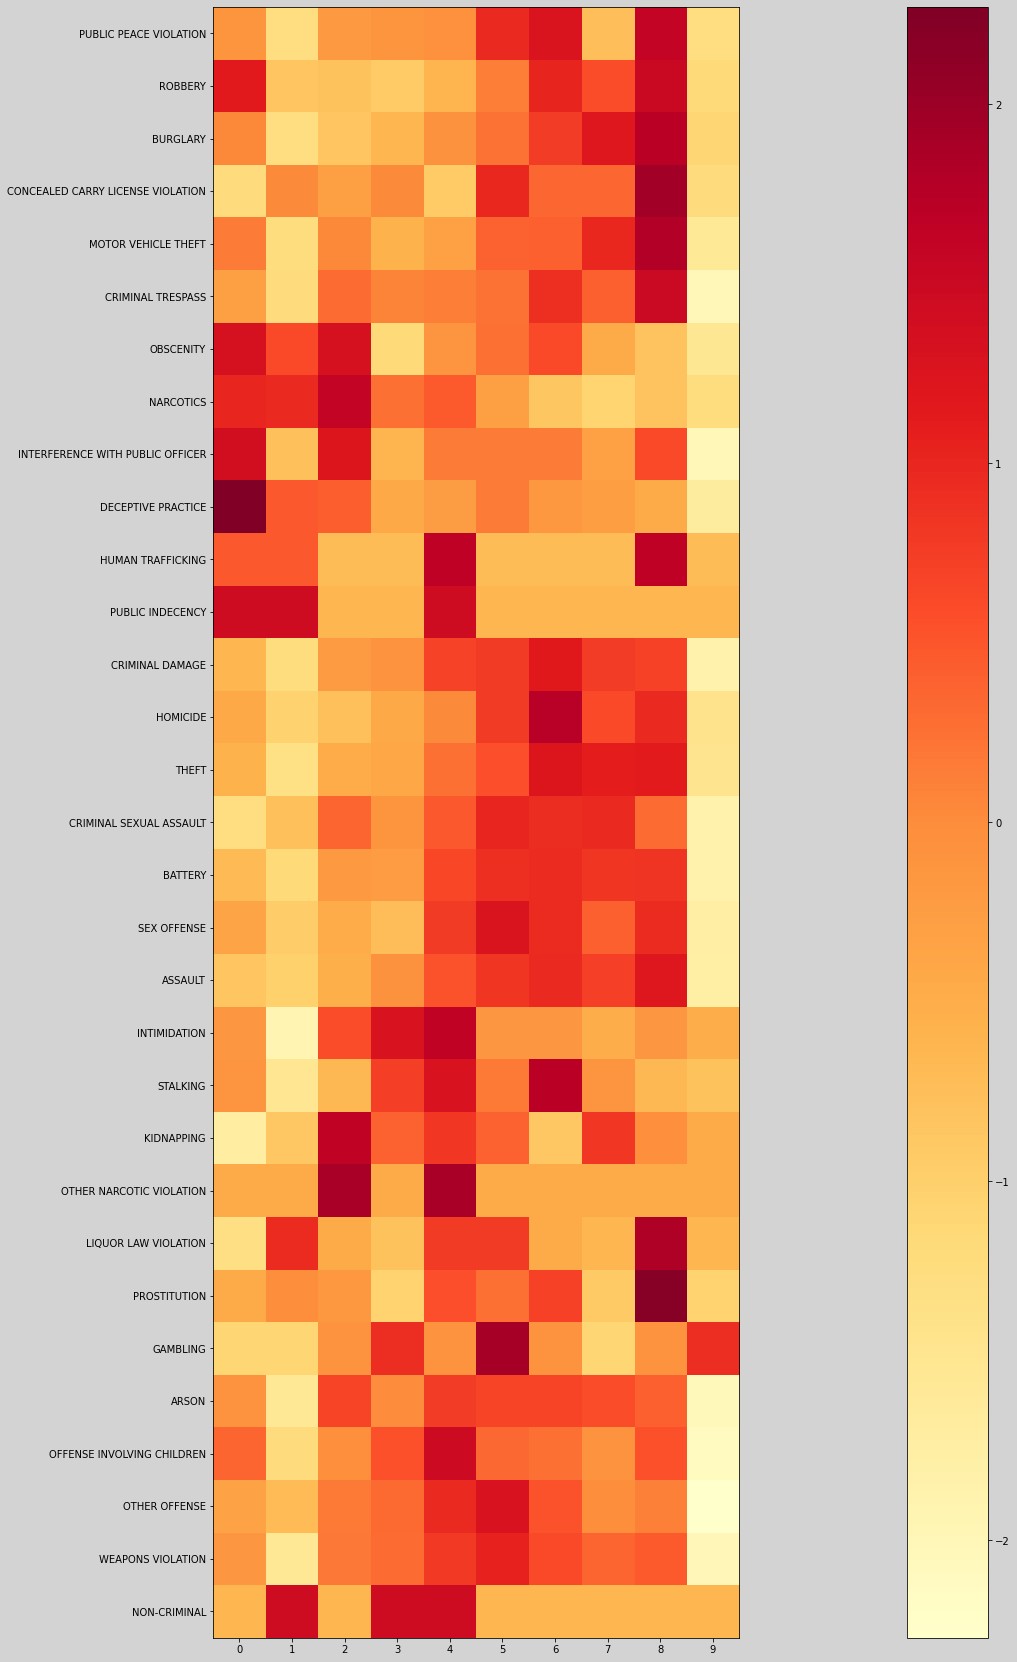

In [35]:
#district_crimeType
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_clustering(month_by_type)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[ 0 27 26 25 23 22 20 16 29 10 15  6  1  2  3  4  5 30  7 18 24 11  9 21
 14 13 28 19  8 12 17]
31
month                              0.000000  0.111111  0.222222  0.333333  \
Primary Type                                                                
ARSON                             -0.101921 -1.545806  0.662488 -0.016987   
SEX OFFENSE                       -0.371140 -0.969753 -0.490863 -0.730308   
ROBBERY                            1.150738 -0.847787 -0.808134 -0.935024   
PUBLIC PEACE VIOLATION            -0.126745 -1.278973 -0.184356 -0.126745   
PROSTITUTION                      -0.472042 -0.029503 -0.177016 -1.062095   
OTHER OFFENSE                     -0.353459 -0.693484  0.175470  0.318197   
OFFENSE INVOLVING CHILDREN         0.355391 -1.207103 -0.042892  0.539214   
MOTOR VEHICLE THEFT                0.145592 -1.253389  0.039855 -0.570166   
THEFT                             -0.576633 -1.342474 -0.489350 -0.397843   
HOMICIDE                          -0.428231 -1.045500 

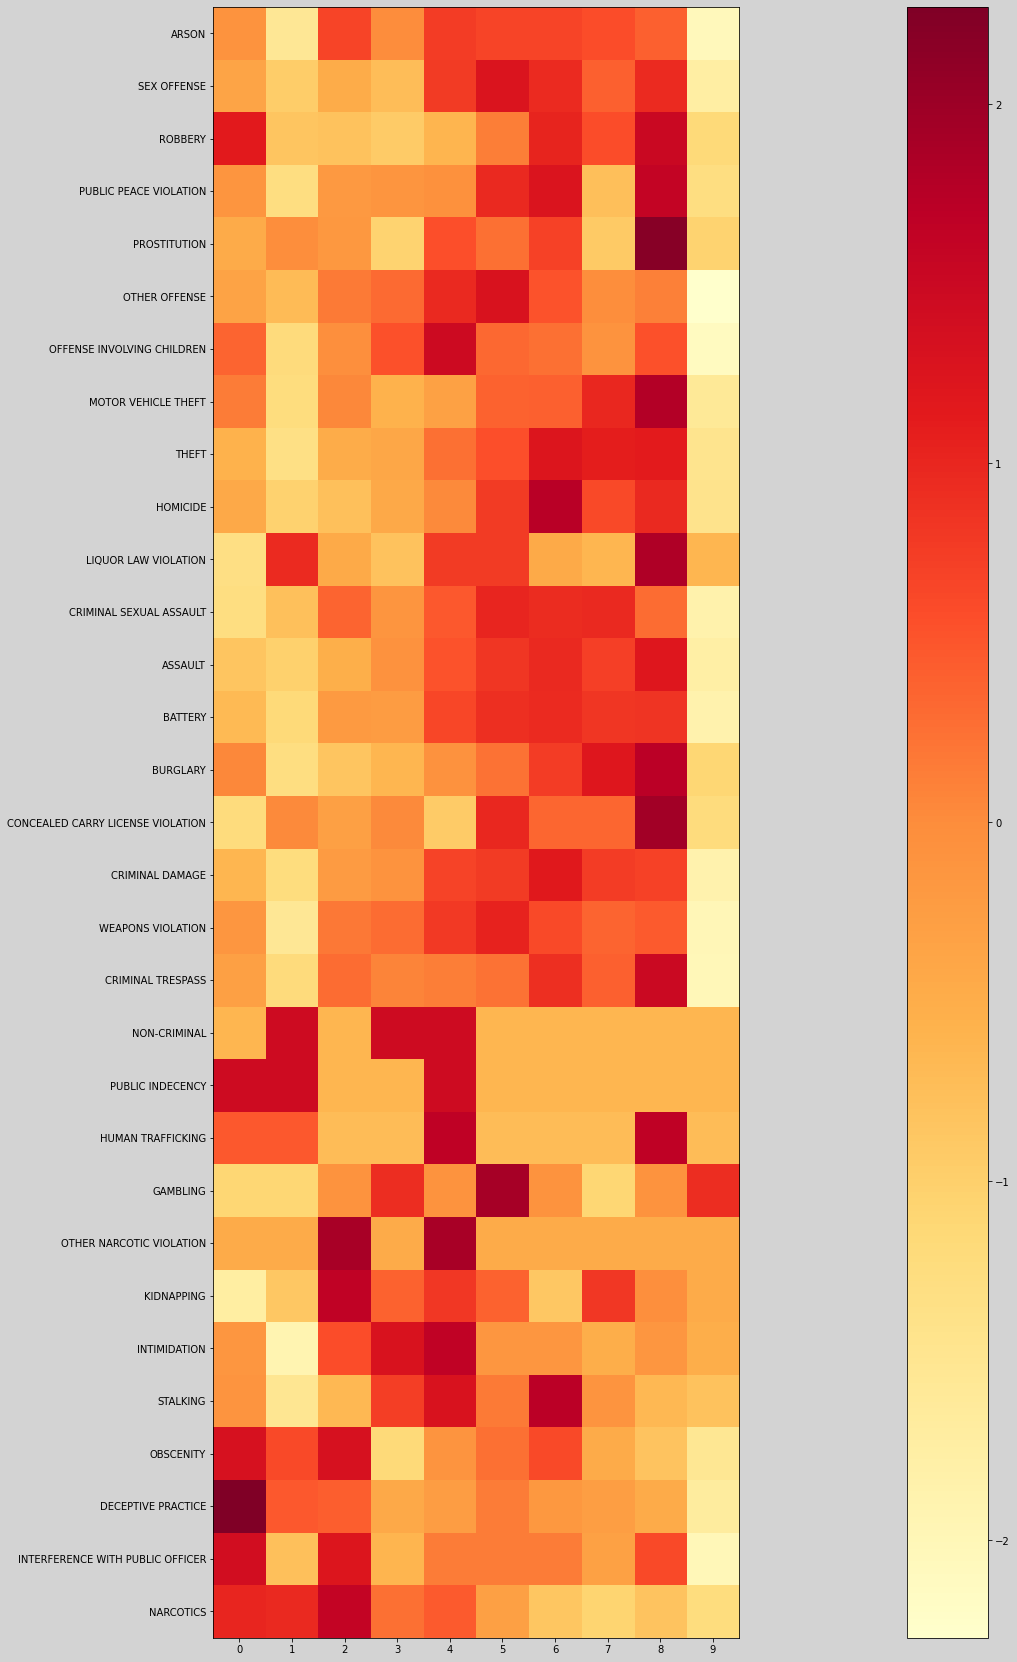

In [19]:
#district_crimeType
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_clustering(month_by_type)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


[9 7 8 5 6 2 3 0 1 4]
10
District      1.0       2.0       3.0       4.0       5.0       6.0   \
month                                                                  
1.000000  0.254728  0.206985  0.302470  0.834462 -0.243162  1.202765   
0.777778  0.287869  0.222458  0.266065  1.254488  0.135245  1.516129   
0.888889  0.034021  0.235954  0.470341  1.004021  0.153018  1.159077   
0.555556  0.085437  0.191935  0.477074  1.236299  0.195370  1.414940   
0.666667  1.119046  0.137789  0.387437  1.021960  0.335427  1.379096   
0.222222 -0.646012  0.039755  0.785479  1.133983  0.264596  1.868465   
0.333333 -0.332628 -0.009370  0.533385  1.315590  0.325861  1.403389   
0.000000 -0.691925  0.015107  0.766581  1.109997  0.390844  1.481693   
0.111111 -0.518505  0.111183  0.481305  1.014858  0.202512  1.490729   
0.444444 -0.236743 -0.032418  0.684512  0.906760  0.383401  1.505396   

District      7.0       8.0       9.0       10.0  ...      15.0      16.0  \
month                            

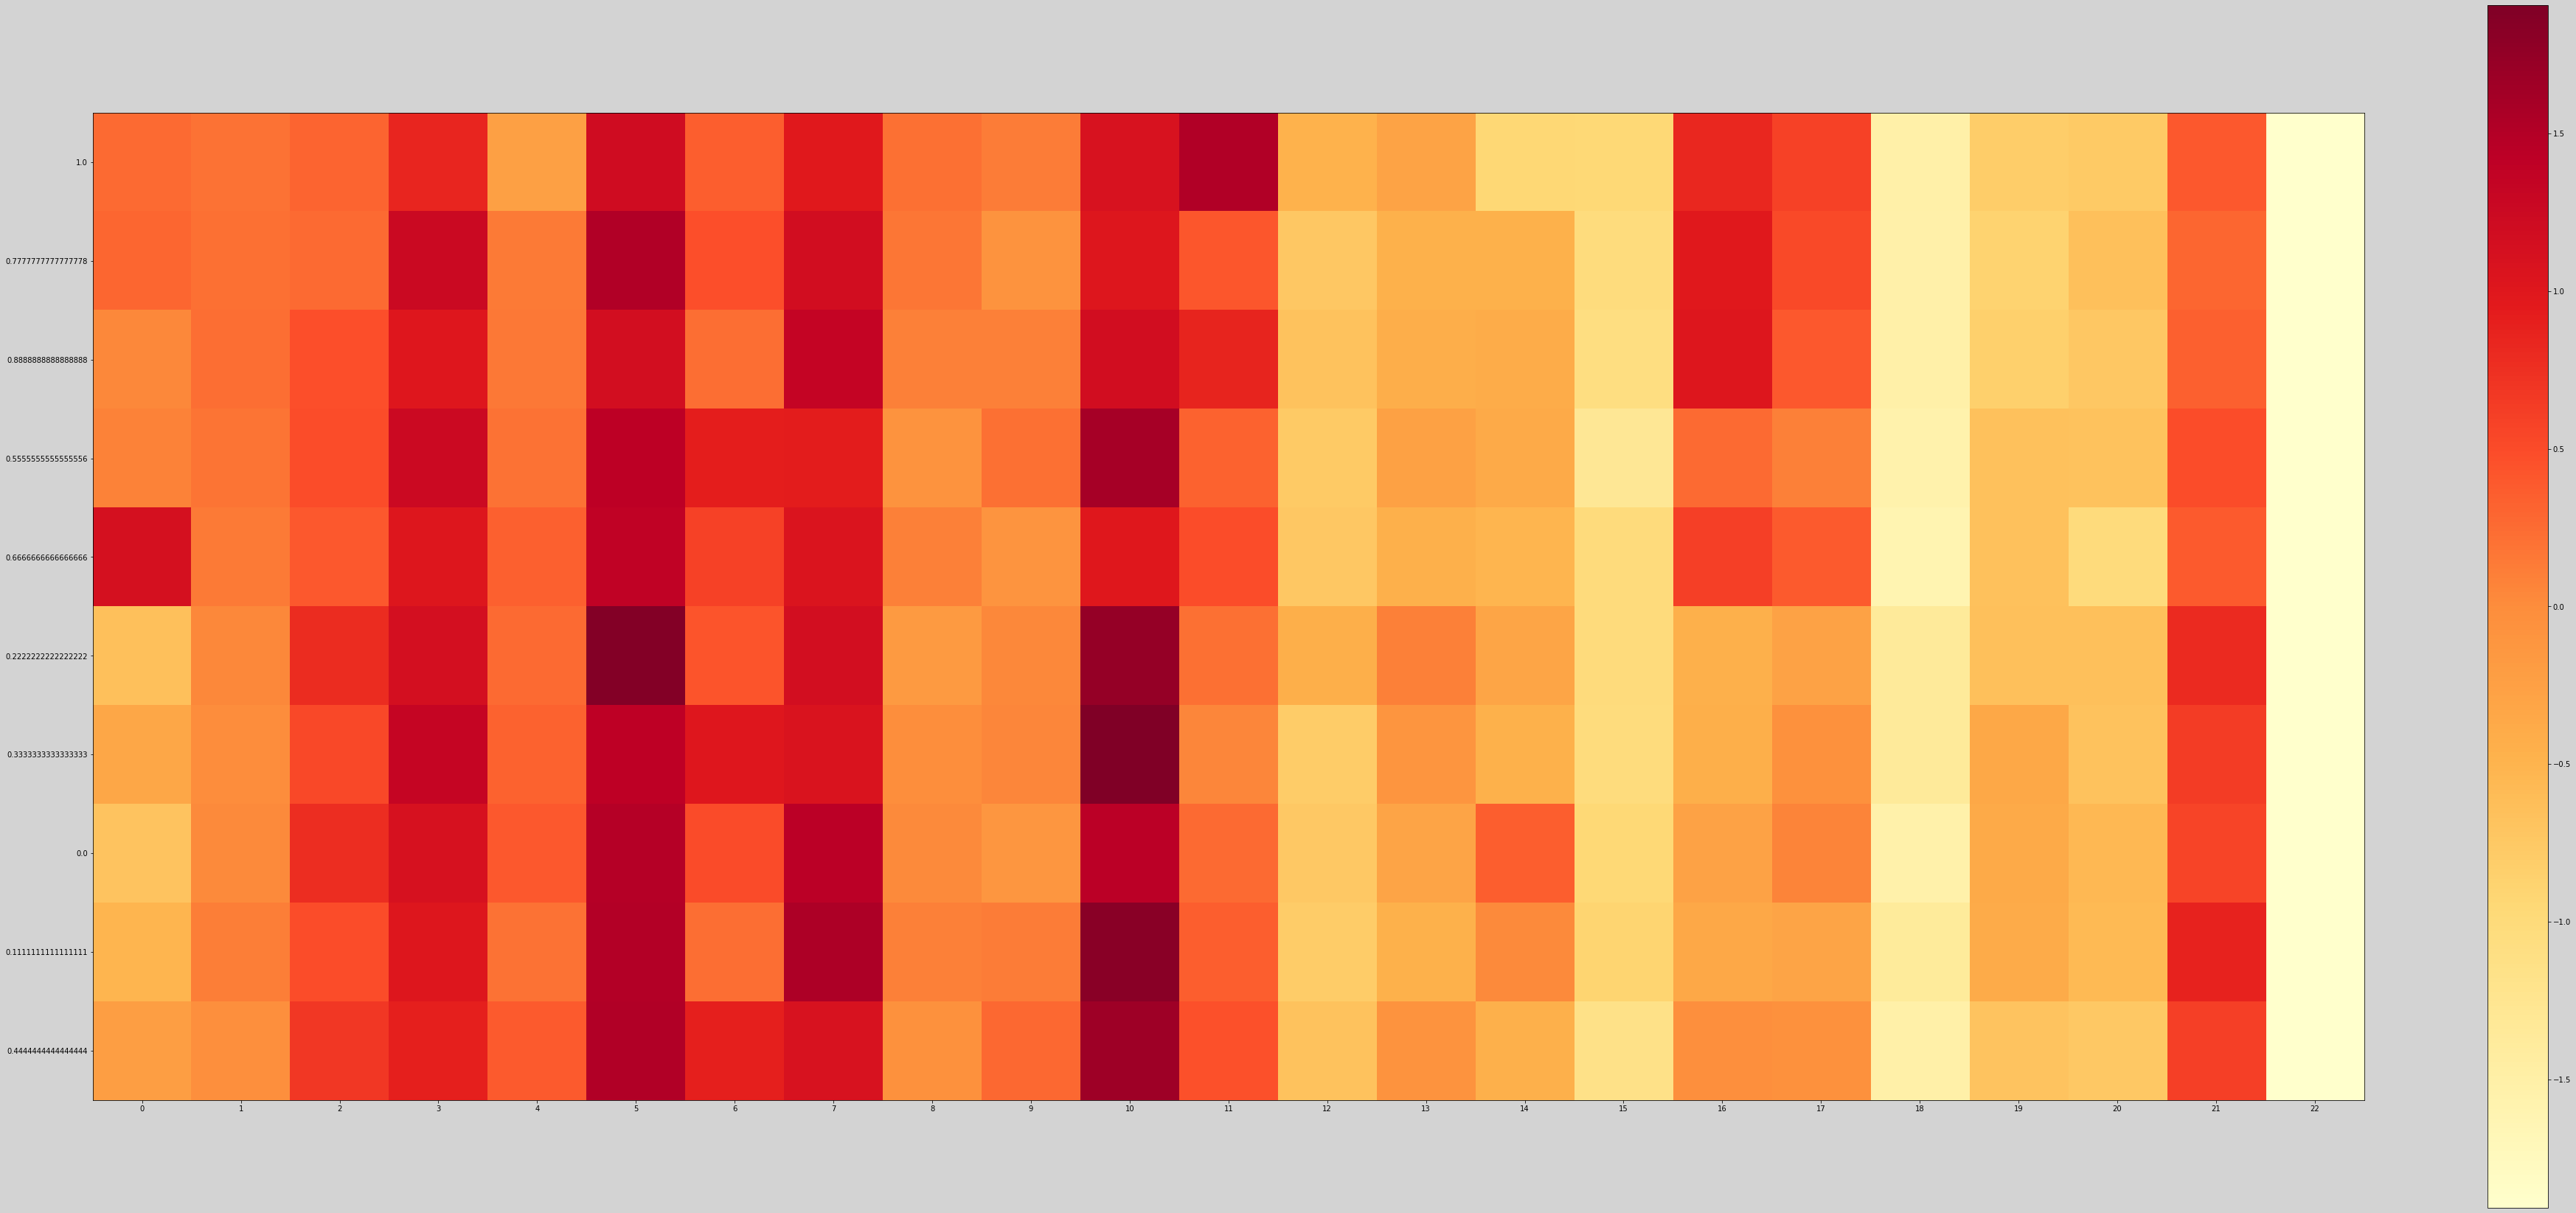

In [36]:
#district_crimeType
plt.figure(figsize=(60,30), facecolor="lightgrey")
agg_clustering(district_month)

In [28]:
len(data21['District'].unique())

23

In [236]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
W = data21['ID'] 
X = data21['District']
Y = data21['Primary Type'] 
Z = data21['hour'] 
data = pd.DataFrame({'W': W, 'X': X, 'Y': Y, 'Z': Z}) 
data_pivoted = data.pivot("W", "X", "Y", "Z") 
ax = sns.heatmap(data_pivoted) 
plt.show()

#fuck this shityeah

fuck it
lets sleep

SyntaxError: invalid syntax (2043075409.py, line 15)

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


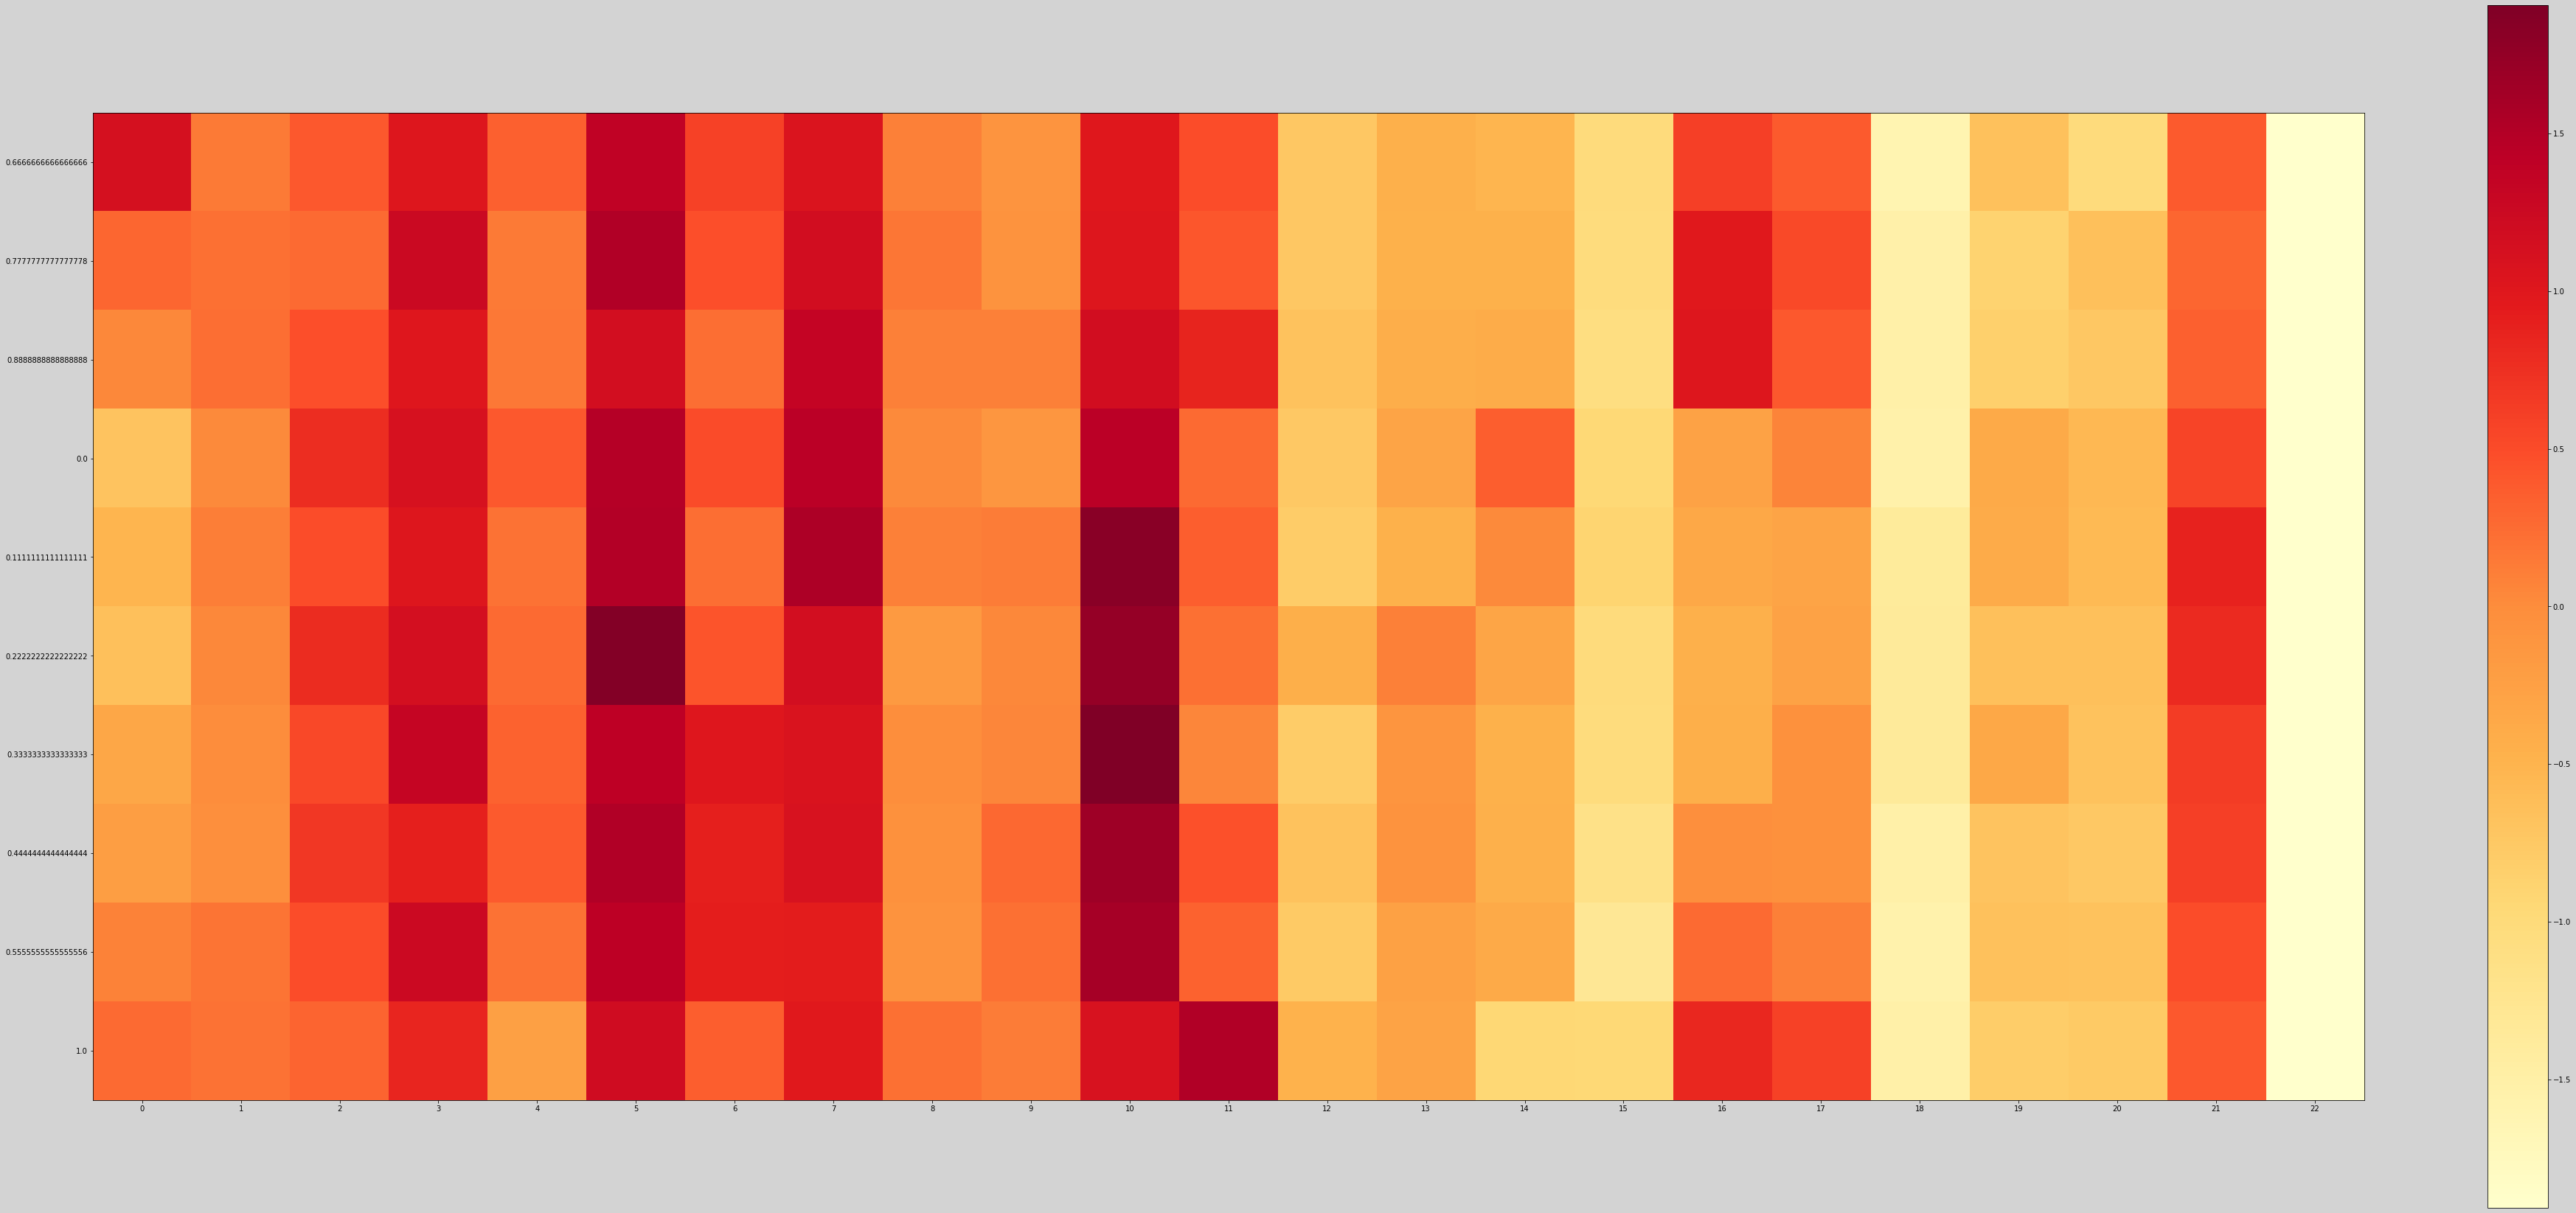

In [49]:
#district_crimeType
plt.figure(figsize=(60,30), facecolor="lightgrey")
scale_and_plot(district_month)

In [28]:
data21['District'].unique()

array([0.2       , 0.16666667, 0.46666667, 0.06666667, 0.1       ,
       0.36666667, 0.76666667, 0.03333333, 0.3       , 0.43333333,
       0.7       , 0.56666667, 0.13333333, 0.33333333, 0.26666667,
       0.63333333, 0.8       , 0.23333333, 0.53333333, 0.6       ,
       0.5       , 0.        , 1.        ])

/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


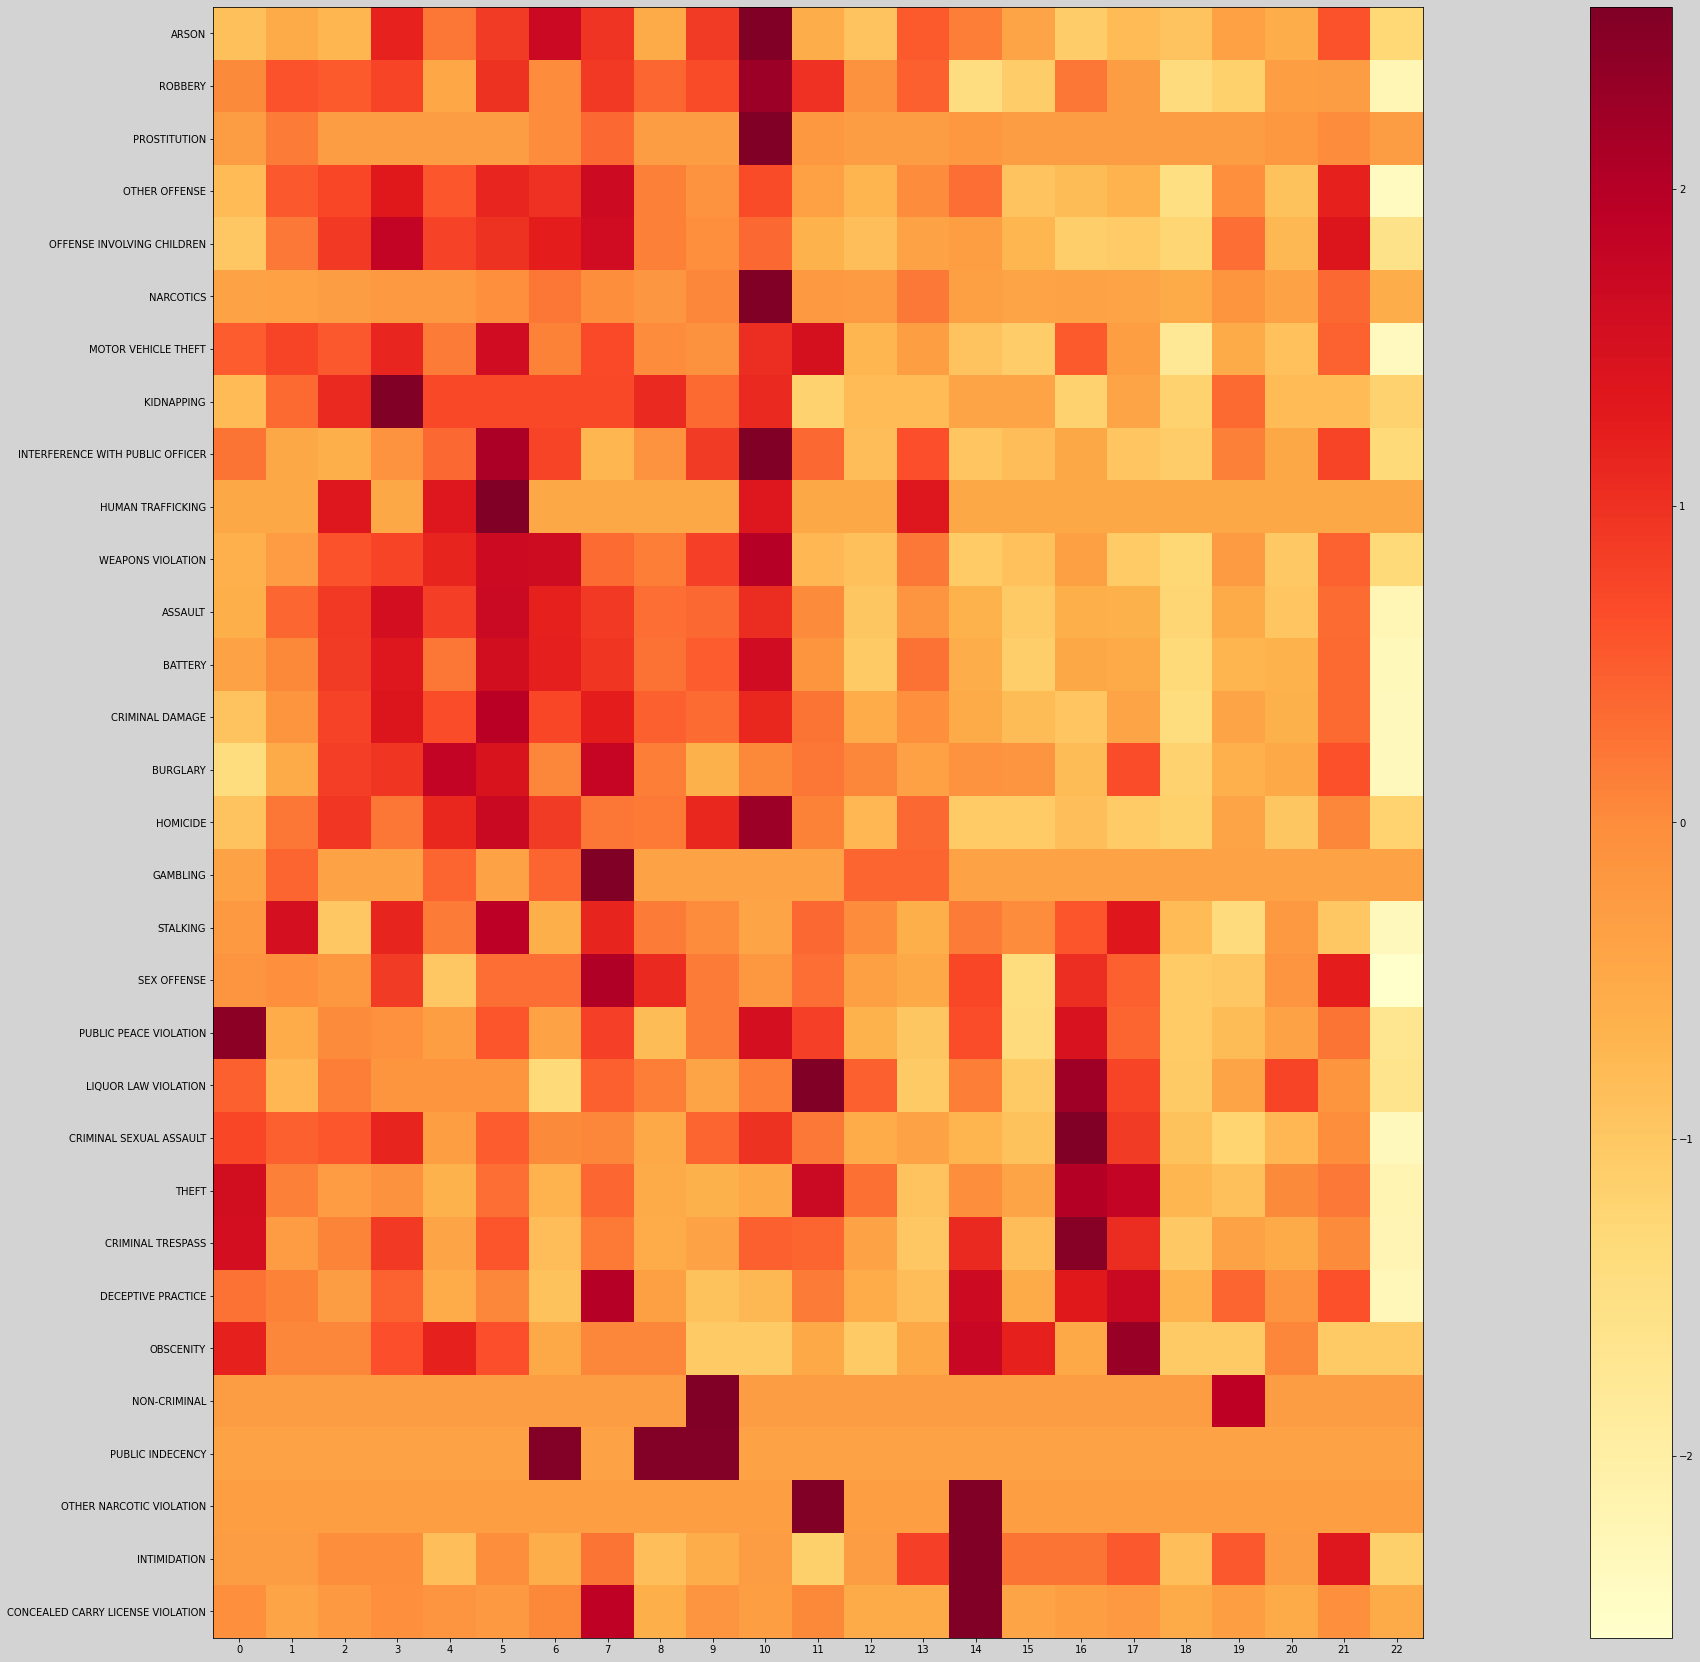

In [43]:
#district_crimeType
plt.figure(figsize=(60,30), facecolor="lightgrey")
scale_and_plot(district_crimeType)

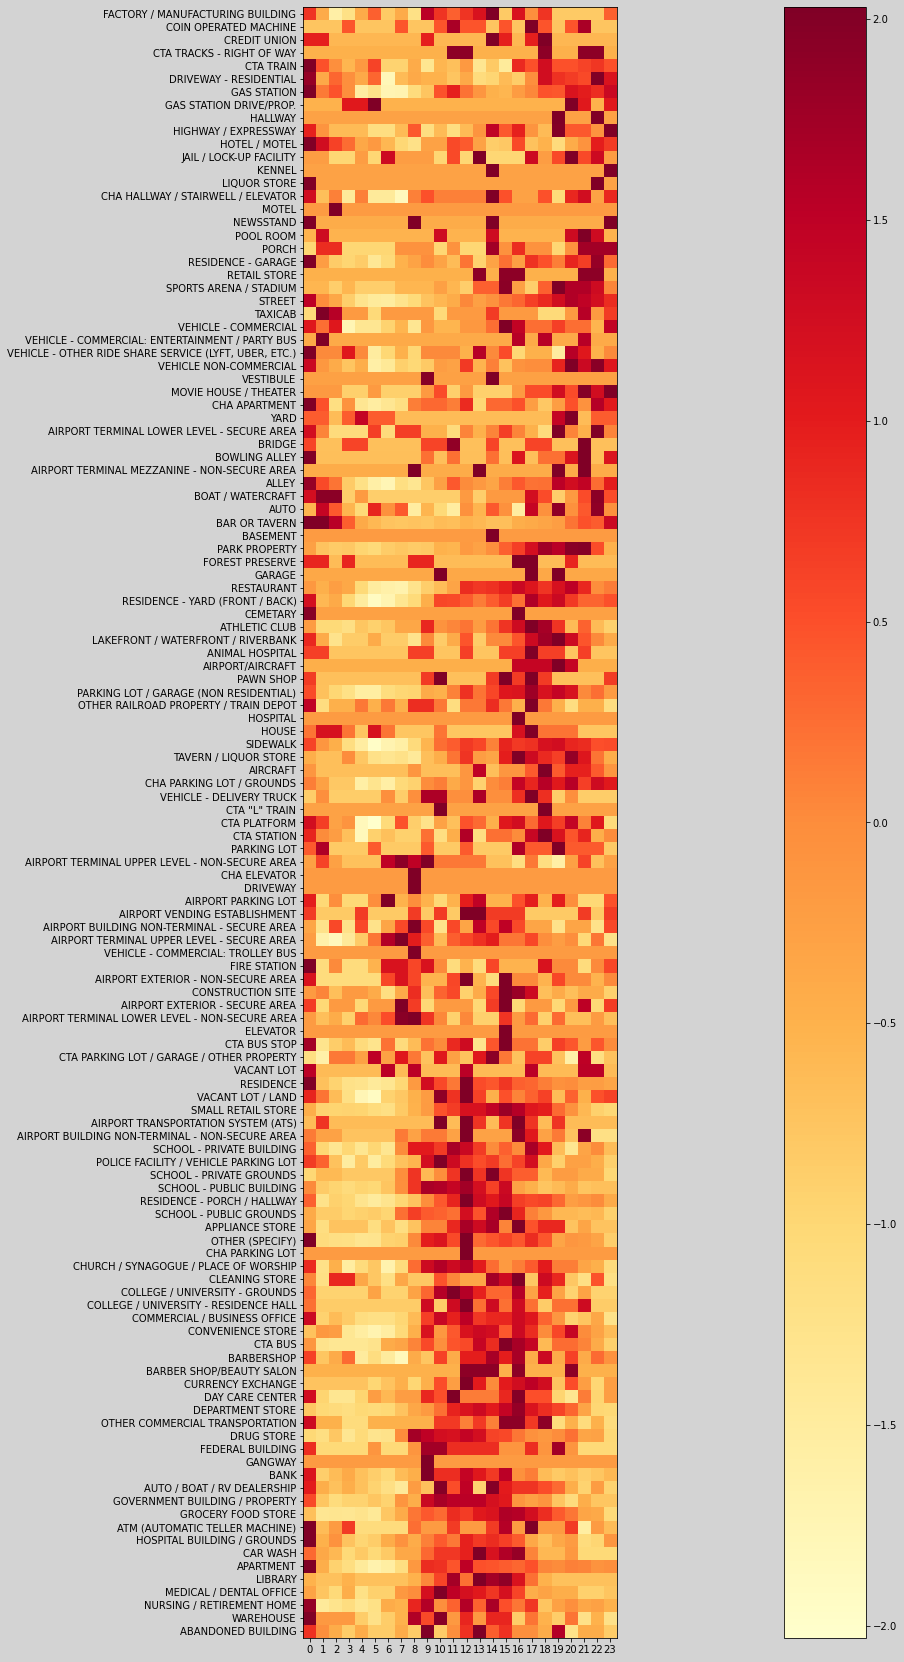

In [44]:
plt.figure(figsize=(60,30), facecolor="lightgrey")
scale_and_plot(hour_by_location)

IX:  [20  1 28 18 17 27 21  7  8 29 19 22 13  0 11  6  4  3 26 23 25 15 12 10
  5  2 16 30 14 24  9]


/home/aomkar/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


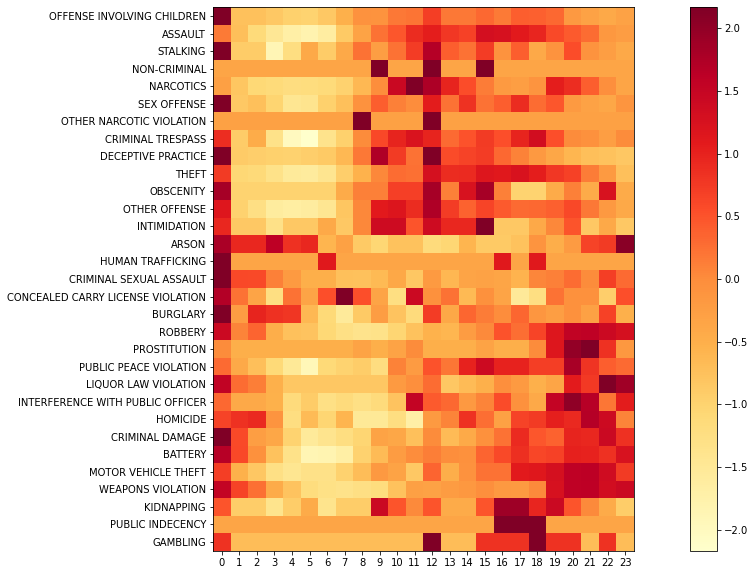

In [22]:
plt.figure(figsize=(20, 10))
scale_and_plot(hour_by_type)

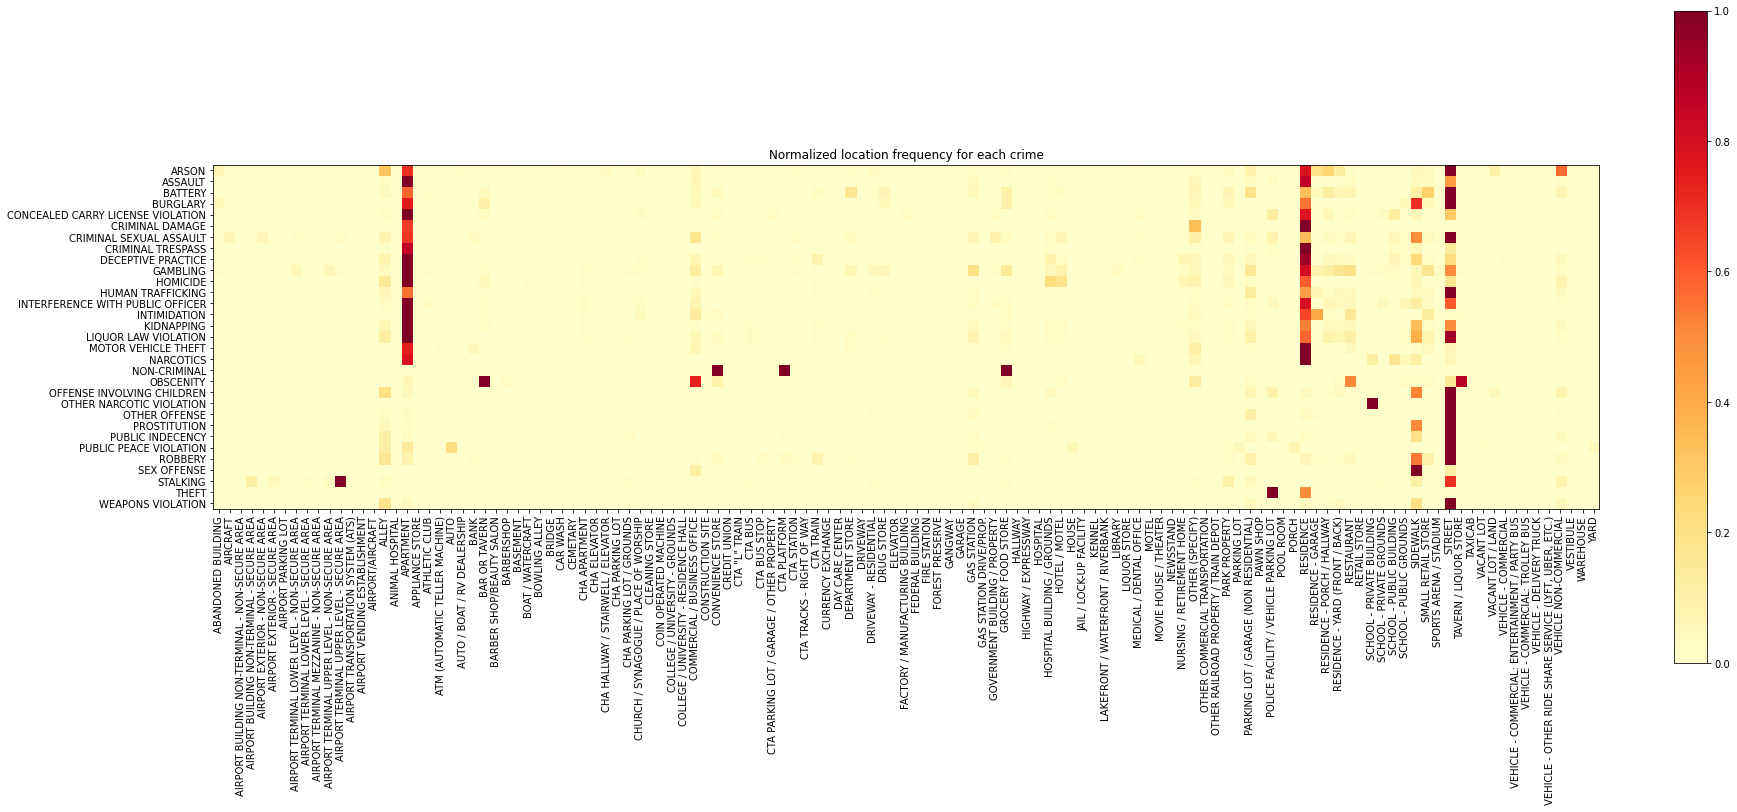

In [46]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

df = normalize(location_by_type)
ix = AC(3).fit(df.T).labels_.argsort() 
plt.figure(figsize=(27, 12))
plt.imshow(df.T.iloc[ix,:], cmap='YlOrRd')
plt.colorbar(fraction=0.03)
plt.xticks(np.arange(df.shape[0]), df.index, rotation='vertical')
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.title('Normalized location frequency for each crime')
plt.grid(False)
plt.show()

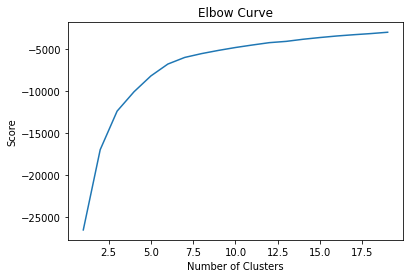

In [182]:
# KMEANS - IUCR vs DISTRICT

# Getting the data ready
sub_data1 = data21[['IUCR', 'District', 'seconds']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [ ]:
#elbow seems to be 4

In [189]:
km = KMeans(n_clusters=3) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_11401/301562898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


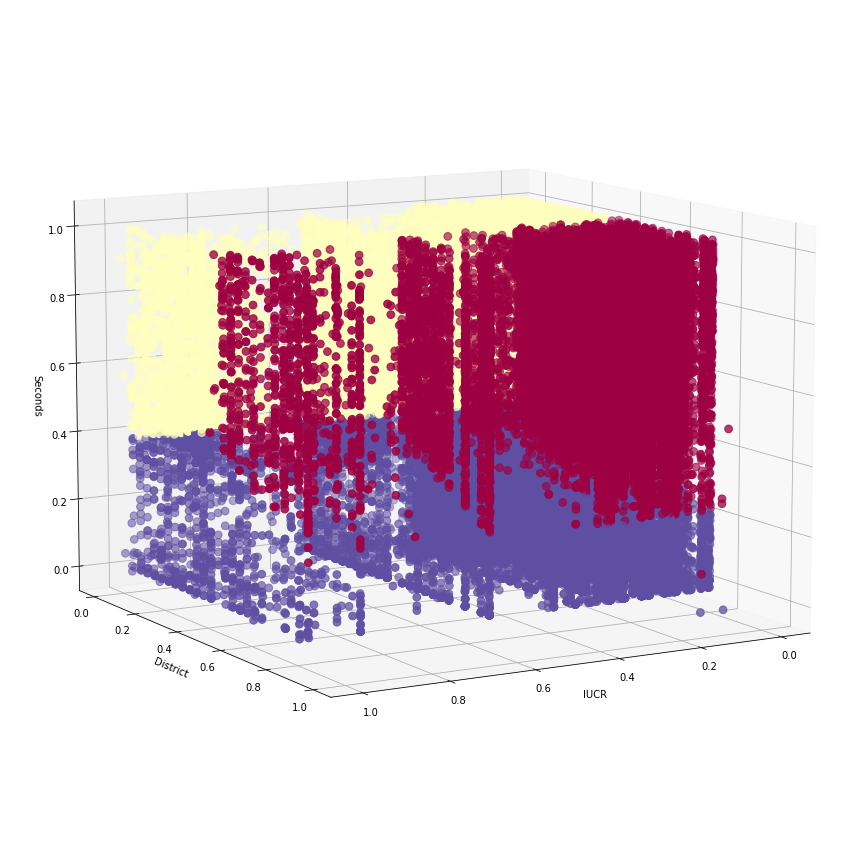

In [190]:
fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['seconds']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Seconds') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

/tmp/ipykernel_11401/886426311.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


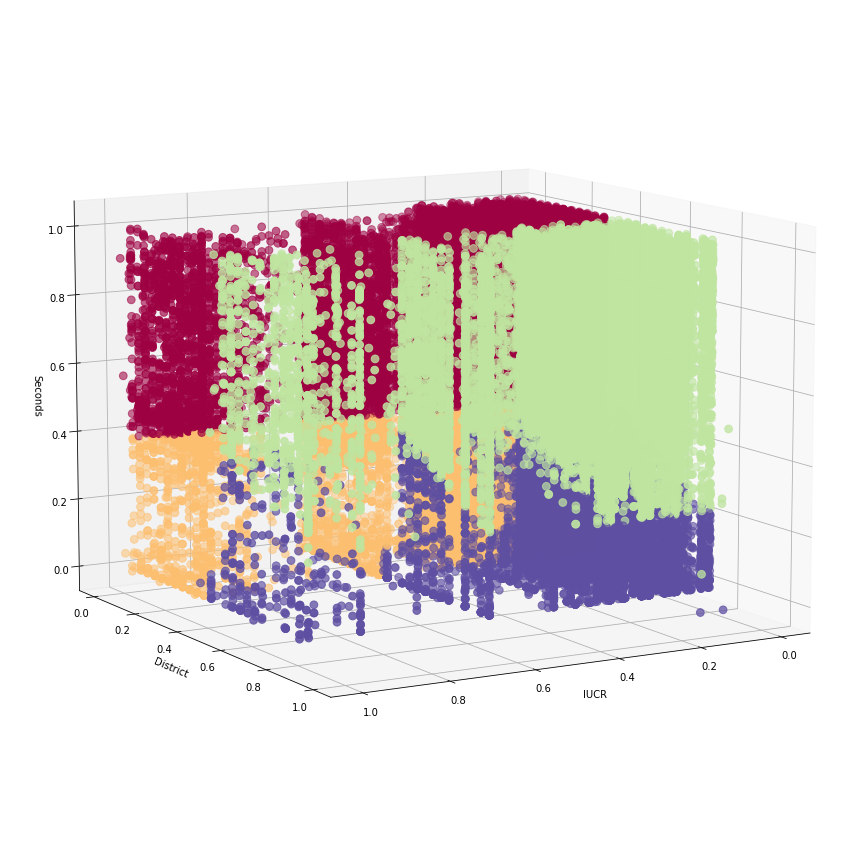

In [191]:
km = KMeans(n_clusters=4) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['seconds']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Seconds') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

/tmp/ipykernel_11401/2361485502.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


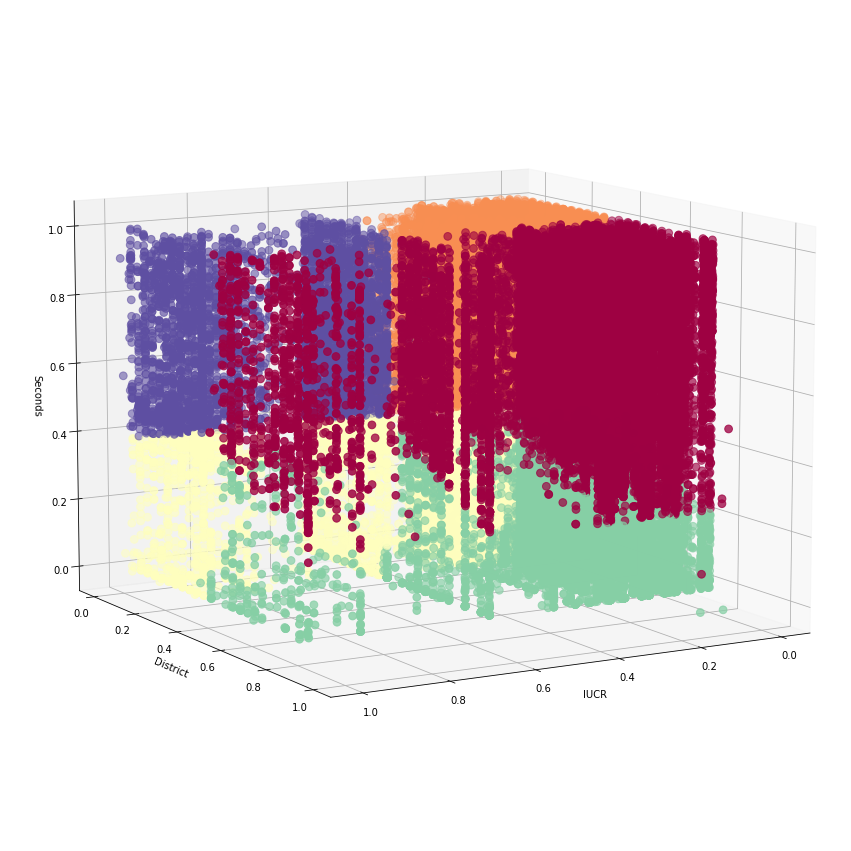

In [192]:
km = KMeans(n_clusters=5) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['seconds']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Seconds') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

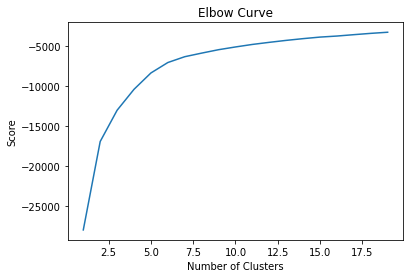

In [193]:
# KMEANS - IUCR vs month vs DISTRICT

# Getting the data ready
sub_data1 = data21[['IUCR', 'month', 'District']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

/tmp/ipykernel_11401/1069397275.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


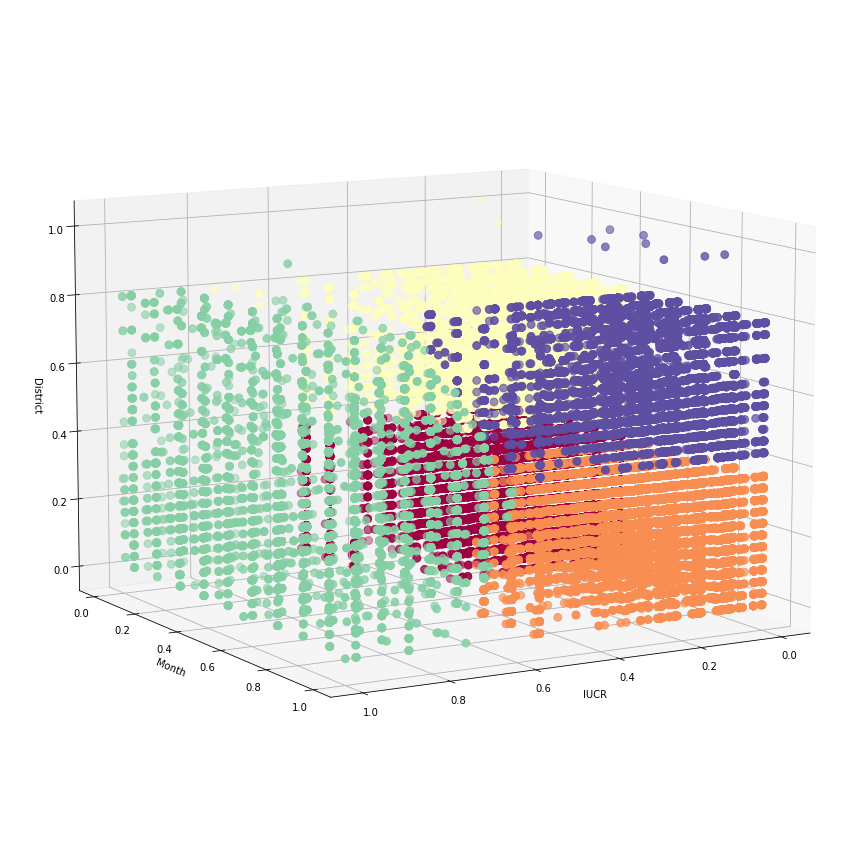

In [194]:
km = KMeans(n_clusters=5) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['month']) 
z = np.array(sub_data1['District']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('Month') 
ax.set_zlabel('District') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

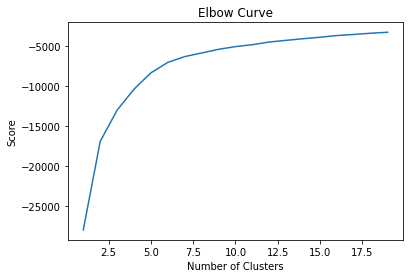

In [195]:
# KMEANS - IUCR vs month vs DISTRICT

# Getting the data ready
sub_data1 = data21[['IUCR', 'District', 'month']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [ ]:
# KMEANS - IUCR vs month vs DISTRICT

# Getting the data ready
sub_data1 = data21[['IUCR', 'District']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [ ]:
sub_data1 = data21[['IUCR', 'District']]

sc = []
for i in range(2,7):
    km = KMeans(n_clusters=i) 
    km.fit(sub_data1) 
    y = km.predict(sub_data1) 
    labels = km.labels_ 
    sub_data1['Clusters'] = y
    
    sc.append(metrics.silhouette_score(sub_data1, labels, metric='euclidean'))

/tmp/ipykernel_5953/563884763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y
/tmp/ipykernel_5953/563884763.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


/tmp/ipykernel_11401/3971499031.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


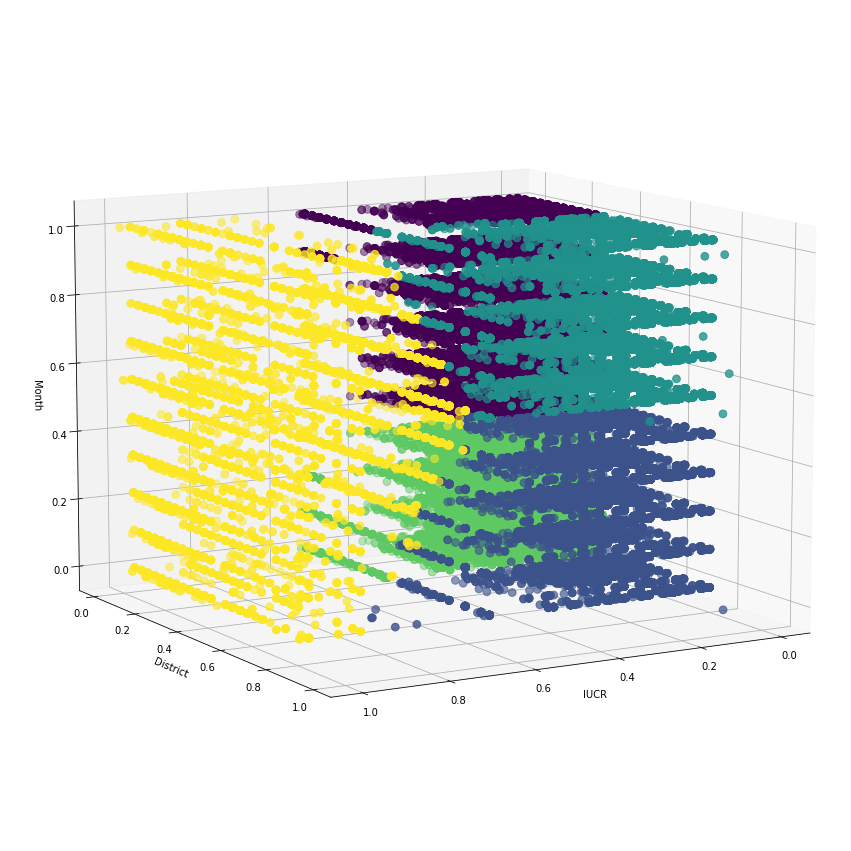

In [196]:
km = KMeans(n_clusters=5) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(15,20)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
z = np.array(sub_data1['month']) 
ax.set_xlabel('IUCR') 
ax.set_ylabel('District') 
ax.set_zlabel('Month') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="viridis") 
ax.view_init(elev=10., azim=60)
# ax.view_init(azim=0) 
# print(ax.azim) 
plt.show() 

In [4]:
from sklearn import metrics

In [3]:
sub_data1 = data21[['IUCR', 'District']]

In [5]:
km = KMeans(n_clusters=3) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_6072/301562898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


In [ ]:
sub_data1 = data21[['IUCR', 'District']]

In [8]:
silhouetteScore = metrics.silhouette_score(sub_data1, labels, metric='euclidean')

In [9]:
print(silhouetteScore)

0.8254487459974958


In [11]:
calinski_harabasz_score = metrics.calinski_harabasz_score(sub_data1, labels)

In [12]:
print(calinski_harabasz_score)

1383160.4589987656


In [14]:
calinski_harabasz_scores = []
for i in range(2,7):
    km = KMeans(n_clusters=i) 
    km.fit(sub_data1) 
    y = km.predict(sub_data1) 
    labels = km.labels_ 
    sub_data1['Clusters'] = y
    calinski_harabasz_scores.append(metrics.calinski_harabasz_score(sub_data1, labels))
    
print('calinski_harabasz_scores for clusters 1 to 7 for IUCR vs District: ', calinski_harabasz_scores)

/tmp/ipykernel_6072/728504461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y
/tmp/ipykernel_6072/728504461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y
/tmp/ipykernel_6072/728504461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

calinski_harabasz_scores for clusters 1 to 7 for IUCR vs District:  [1070076.9746582625, 1011775.3811403563, 1315770.8467528308, 6431816.709639851, 6246344.209415284]


/tmp/ipykernel_6072/728504461.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


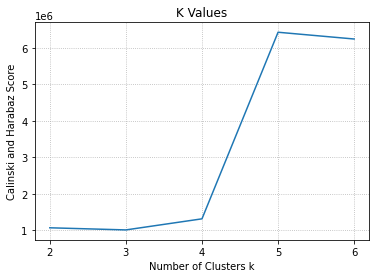

In [17]:
kValues = [2,3,4,5,6]
plt.plot(kValues, calinski_harabasz_scores)
plt.xticks(kValues, kValues)
plt.xlabel('Number of Clusters k')
plt.ylabel('Calinski and Harabaz Score')
plt.title('K Values')
plt.grid(linestyle='dotted')

#     plt.savefig('plotCalHar.png')
plt.show()

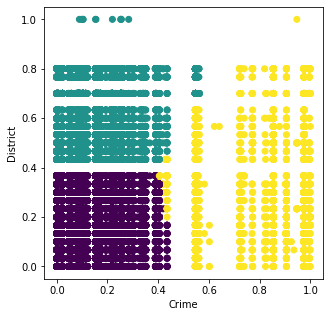

In [6]:
fig = plt.figure(figsize=(5,5)) 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('District')
plt.show() 

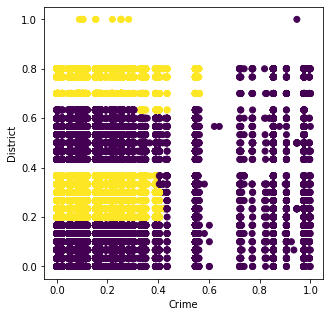

In [121]:
fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
# ax.set_xlabel('IUCR') 
# ax.set_ylabel('District') 
# ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('District')
plt.show() 

In [112]:
km = KMeans(n_clusters=3) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_11401/301562898.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


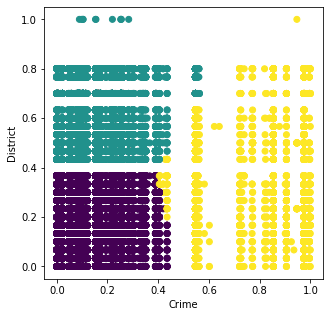

In [115]:
fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
# ax.set_xlabel('IUCR') 
# ax.set_ylabel('District') 
# ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('District')
plt.show() 

In [179]:
sub_data1 = data21[['IUCR', 'District', 'seconds']] 
km = KMeans(n_clusters=4) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_11401/2798809067.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


In [184]:

fig = plt.figure(figsize=(5,5)) 
ax = fig.add_subplot(111, projection='3d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District'])
z = np.array(sub_data1['seconds'])
ax.set_ylabel('District') 
ax.set_xlabel('IUCR') 
ax.set_zlabel('Time') 
ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
ax.(elev=10., azim=50)
ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None
#plt.scatter(x,y, c=km.labels_)
# plt.xlabel('Crime')
# plt.ylabel('District')

plt.show()

#Seems to be clustering based on the value of district
#The clustes look like - crimes from 1 - 4 occur in all the districts, crimes from 6-1 also occur in all districts, makes no sense

SyntaxError: invalid syntax (2874159051.py, line 10)

In [118]:
km = KMeans(n_clusters=5) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

/tmp/ipykernel_11401/2371930434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


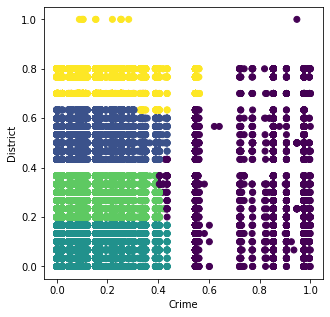

In [119]:
fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
# ax.set_xlabel('IUCR') 
# ax.set_ylabel('District') 
# ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('District')
plt.show() 

/tmp/ipykernel_11401/3358168705.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


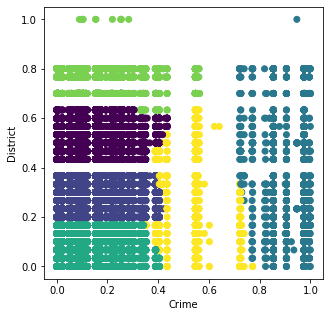

In [122]:
km = KMeans(n_clusters=6) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['District']) 
# ax.set_xlabel('IUCR') 
# ax.set_ylabel('District') 
# ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('District')
plt.show() 

In [ ]:
#Crime, district


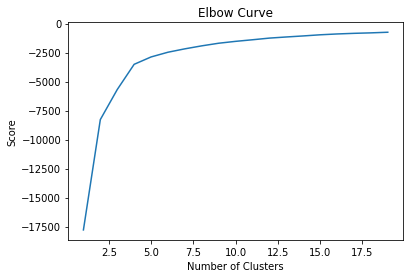

In [172]:
# KMEANS - IUCR vs time of day

# Getting the data ready
sub_data1 = data21[['IUCR', 'seconds']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [173]:
km = KMeans(n_clusters=4) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y



/tmp/ipykernel_11401/3546728434.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


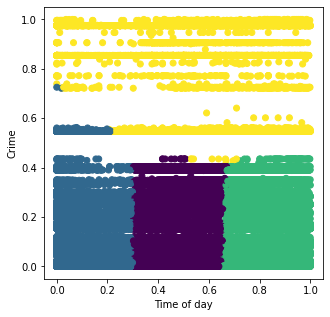

In [175]:
fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
y = np.array(sub_data1['IUCR']) 
x = np.array(sub_data1['seconds']) 
# ax.set_xlabel('IUCR') 
# ax.set_ylabel('District') 
# ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Time of day') 
plt.ylabel('Crime')
plt.show()

In [161]:
#yayy

months = data21['month'].unique()
crimes_per_month = {}
for i, month in enumerate(months):
    crimes_per_month[str(month)] = 0
    
#for record in data21:
    

In [162]:
crimes_per_month

{'0.0': 0,
 '0.1111111111111111': 0,
 '0.3333333333333333': 0,
 '0.2222222222222222': 0,
 '0.4444444444444444': 0,
 '0.5555555555555556': 0,
 '0.6666666666666666': 0,
 '0.7777777777777778': 0,
 '0.8888888888888888': 0,
 '1.0': 0}

In [163]:
for record in data21['month']:
    crimes_per_month[str(record)] += 1

In [164]:
crimes_per_month

{'0.0': 16014,
 '0.1111111111111111': 12854,
 '0.3333333333333333': 15280,
 '0.2222222222222222': 15718,
 '0.4444444444444444': 17504,
 '0.5555555555555556': 18472,
 '0.6666666666666666': 18912,
 '0.7777777777777778': 18142,
 '0.8888888888888888': 18712,
 '1.0': 9675}

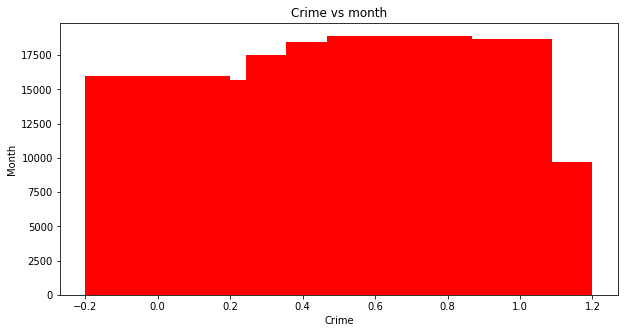

In [166]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(months, crimes_per_month.values(), color ='red',
        width = 0.4)
 
plt.xlabel("Crime")
plt.ylabel("Month")
plt.title("Crime vs month")
plt.show()

In [135]:
data21['month'].unique()

array([0.        , 0.11111111, 0.33333333, 0.22222222, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

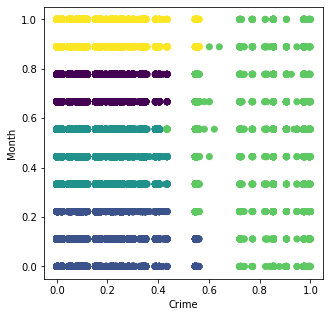

In [136]:
fig = plt.figure(figsize=(5,5)) 
# ax = fig.add_subplot(111, projection='2d') 
x = np.array(sub_data1['IUCR']) 
y = np.array(sub_data1['month']) 
# ax.set_xlabel('IUCR') 
# ax.set_ylabel('District') 
# ax.scatter(x,y,z, marker="o", c = sub_data1["Clusters"], s=60, cmap="Spectral") 
# ax.view_init(elev=10., azim=50)
# ax.view_init(azim=0) 
# print(ax.azim) 
# plt.scatter(x,y) 
# plt.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs) 
plt.scatter(x,y, c=km.labels_)
plt.xlabel('Crime') 
plt.ylabel('Month')
plt.show() 

/tmp/ipykernel_11401/3595226167.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data1['Clusters'] = y


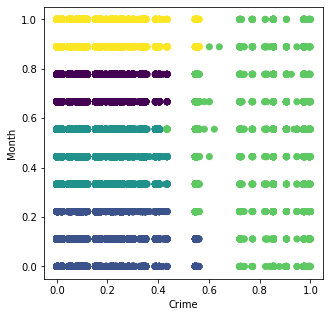

In [129]:
km = KMeans(n_clusters=5) 
km.fit(sub_data1) 
y = km.predict(sub_data1) 
labels = km.labels_ 
sub_data1['Clusters'] = y

 

In [130]:
data21['month'].iloc[0]

0.0

In [131]:
d.uni

6910067    0.0
6927871    0.0
6927960    0.0
6932002    0.0
6932007    0.0
          ... 
7423480    1.0
7423481    1.0
7423482    0.0
7423483    1.0
7423484    1.0
Name: month, Length: 161283, dtype: float64

In [ ]:
# KMEANS - IUCR vs MONTH

# Getting the data ready
sub_data1 = data21[['IUCR', 'hour']] 

# Elbow
N = range(1, 20) 
kmeans = [KMeans(n_clusters=i) for i in N] 
# kmeans 
score = [kmeans[i].fit(sub_data1).score(sub_data1) for i in range(len(kmeans))]
# score 
plt.plot(N,score) 
plt.xlabel('Number of Clusters') 
plt.ylabel('Score') 
plt.title('Elbow Curve') 
plt.show() 

In [85]:
data21

ID                Date                     Block  IUCR  \
6910067  12260346 2021-01-03 13:23:00     070XX S EGGLESTON AVE  0486   
6927871  12263464 2021-01-03 06:59:00          080XX S YALE AVE  0820   
6927960  12259990 2021-01-03 00:20:00   056XX W WASHINGTON BLVD  0486   
6932002  12260669 2021-01-03 20:47:00        057XX S RACINE AVE  2022   
6932007     25702 2021-01-03 20:09:00  068XX S STONY ISLAND AVE  0110   
...           ...                 ...                       ...   ...   
7423480  12514897 2021-10-16 11:30:00     030XX N MILWAUKEE AVE  0460   
7423481  12514271 2021-10-16 16:00:00      025XX W MARQUETTE RD  1365   
7423482  12517486 2021-01-02 00:00:00        114XX S FOREST AVE  1154   
7423483  12513899 2021-10-16 00:00:00         063XX S KOLIN AVE  0560   
7423484  12513578 2021-10-16 10:15:00           036XX W 16TH ST  1310   

               Primary Type                              Description  \
6910067             BATTERY                  DOMESTIC BATTERY SIMPLE   
6927871               THEFT                           $500 AND UNDER   
6927960             BATTERY                  DOMESTIC BATTERY SIMPLE   
6932002           NARCOTICS                        POSSESS - COCAINE   
6932007            HOMICIDE                      FIRST DEGREE MURDER   
...                     ...                                      ...   
7423480             BATTERY                                   SIMPLE   
7423481   CRIMINAL TRESPASS                             TO RESIDENCE   
7423482  DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT $300 AND UNDER   
7423483             ASSAULT                                   SIMPLE   
7423484     CRIMINAL DAMAGE                              TO PROPERTY   

              Location Description  Arrest  Domestic  District  Ward  \
6910067                  APARTMENT   False      True  0.200000   6.0   
6927871                  RESIDENCE   False     False  0.166667  17.0   
6927960                  APARTMENT   False      True  0.466667  29.0   
6932002                     STREET    True     False  0.200000  16.0   
6932007                     STREET   False     False  0.066667   5.0   
...                            ...     ...       ...       ...   ...   
7423480  SCHOOL - PRIVATE BUILDING   False     False  0.800000  30.0   
7423481                  APARTMENT   False     False  0.233333  16.0   
7423482                  RESIDENCE   False     False  0.133333   9.0   
7423483                  APARTMENT   False      True  0.233333  13.0   
7423484         SMALL RETAIL STORE   False     False  0.300000  24.0   

         Community Area  Year                       Location        date  \
6910067            68.0  2021  (41.766435144, -87.635963997)  2021-01-03   
6927871            44.0  2021  (41.748473982, -87.630606588)  2021-01-03   
6927960            25.0  2021   (41.88222427, -87.766076162)  2021-01-03   
6932002            67.0  2021   (41.79006908, -87.654768679)  2021-01-03   
6932007            43.0  2021  (41.771062488, -87.586270811)  2021-01-03   
...                 ...   ...                            ...         ...   
7423480            21.0  2021  (41.936657276, -87.719850766)  2021-10-16   
7423481            66.0  2021  (41.771926901, -87.686706738)  2021-10-16   
7423482            49.0  2021  (41.686439349, -87.615623747)  2021-01-02   
7423483            65.0  2021  (41.777410704, -87.731273331)  2021-10-16   
7423484            29.0  2021   (41.858965656, -87.71585846)  2021-10-16   

         month      time      hour   seconds  
6910067    0.0  13:23:00  0.565217  0.558026  
6927871    0.0  06:59:00  0.260870  0.291174  
6927960    0.0  00:20:00  0.000000  0.013899  
6932002    0.0  20:47:00  0.869565  0.866574  
6932007    0.0  20:09:00  0.869565  0.840167  
...        ...       ...       ...       ...  
7423480    1.0  11:30:00  0.478261  0.479500  
7423481    1.0  16:00:00  0.695652  0.667130  
7423482    0.0  00:00:00  0.000000  0.000000  
7423483    1.0  00:00:00 

In [81]:
data21.iloc[0]

ID                                           12260346
Date                              2021-01-03 13:23:00
Block                           070XX S EGGLESTON AVE
IUCR                                             0486
Primary Type                                  BATTERY
Description                   DOMESTIC BATTERY SIMPLE
Location Description                        APARTMENT
Arrest                                          False
Domestic                                         True
District                                          0.2
Ward                                              6.0
Community Area                                   68.0
Year                                             2021
Location                (41.766435144, -87.635963997)
date                                       2021-01-03
month                                             0.0
time                                         13:23:00
hour                                         0.565217
seconds                     

In [82]:
data21.head()

ID                Date                     Block  IUCR  \
6910067  12260346 2021-01-03 13:23:00     070XX S EGGLESTON AVE  0486   
6927871  12263464 2021-01-03 06:59:00          080XX S YALE AVE  0820   
6927960  12259990 2021-01-03 00:20:00   056XX W WASHINGTON BLVD  0486   
6932002  12260669 2021-01-03 20:47:00        057XX S RACINE AVE  2022   
6932007     25702 2021-01-03 20:09:00  068XX S STONY ISLAND AVE  0110   

        Primary Type              Description Location Description  Arrest  \
6910067      BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   False   
6927871        THEFT           $500 AND UNDER            RESIDENCE   False   
6927960      BATTERY  DOMESTIC BATTERY SIMPLE            APARTMENT   False   
6932002    NARCOTICS        POSSESS - COCAINE               STREET    True   
6932007     HOMICIDE      FIRST DEGREE MURDER               STREET   False   

         Domestic  District  Ward  Community Area  Year  \
6910067      True  0.200000   6.0            68.0  2021   
6927871     False  0.166667  17.0            44.0  2021   
6927960      True  0.466667  29.0            25.0  2021   
6932002     False  0.200000  16.0            67.0  2021   
6932007     False  0.066667   5.0            43.0  2021   

                              Location        date  month      time      hour  \
6910067  (41.766435144, -87.635963997)  2021-01-03    0.0  13:23:00  0.565217   
6927871  (41.748473982, -87.630606588)  2021-01-03    0.0  06:59:00  0.260870   
6927960   (41.88222427, -87.766076162)  2021-01-03    0.0  00:20:00  0.000000   
6932002   (41.79006908, -87.654768679)  2021-01-03    0.0  20:47:00  0.869565   
6932007  (41.771062488, -87.586270811)  2021-01-03    0.0  20:09:00  0.869565   

          seconds  
6910067  0.558026  
6927871  0.291174  
6927960  0.013899  
6932002  0.866574  
6932007  0.840167

In [83]:
data21[6910067]

KeyError: 6910067

In [84]:
data21[0]

KeyError: 0

In [67]:
data21.iloc[161282]

Date                             2021-10-16 10:15:00
Block                                036XX W 16TH ST
IUCR                                            1310
Primary Type                         CRIMINAL DAMAGE
Description                              TO PROPERTY
Location Description              SMALL RETAIL STORE
Arrest                                         False
Domestic                                       False
District                                         0.3
Ward                                            24.0
Community Area                                  29.0
Year                                            2021
Location                (41.858965656, -87.71585846)
date                                      2021-10-16
month                                            1.0
time                                        10:15:00
hour                                        0.434783
seconds                                      0.42738
Name: 7423484, dtype: object

In [47]:
data21['IUCR'].iloc[1]

'0820'

In [48]:
data21['IUCR'].iloc[0] - data21['IUCR'].iloc[1]

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [49]:
int(data21['IUCR'].iloc[0])

486

In [90]:
data21[data21['ID'] == 12260693]

ID                Date            Block  IUCR  \
6940555  12260693 2021-01-03 23:47:00  016XX E 69TH ST  141A   

              Primary Type             Description Location Description  \
6940555  WEAPONS VIOLATION  UNLAWFUL USE - HANDGUN               STREET   

         Arrest  Domestic  District  Ward  Community Area  Year  \
6940555   False     False  0.066667   5.0            43.0  2021   

                              Location        date  month      time  hour  \
6940555  (41.769708488, -87.585263769)  2021-01-03    0.0  23:47:00   1.0   

          seconds  
6940555  0.991661

In [92]:
data21[data21['ID'] == 12260693]

ID                Date            Block  IUCR  \
6940555  12260693 2021-01-03 23:47:00  016XX E 69TH ST   141   

              Primary Type             Description Location Description  \
6940555  WEAPONS VIOLATION  UNLAWFUL USE - HANDGUN               STREET   

         Arrest  Domestic  District  Ward  Community Area  Year  \
6940555   False     False  0.066667   5.0            43.0  2021   

                              Location        date  month      time  hour  \
6940555  (41.769708488, -87.585263769)  2021-01-03    0.0  23:47:00   1.0   

          seconds  
6940555  0.991661

In [91]:
data21['IUCR'] = data21.IUCR.str.extract('(\d+)', expand=True).astype(int)

In [88]:
print(data21[data21['IUCR'] == '141A'])

               ID                Date                     Block  IUCR  \
6940555  12260693 2021-01-03 23:47:00           016XX E 69TH ST  141A   
7026685  12262059 2021-01-05 14:43:00       062XX S LANGLEY AVE  141A   
7028252  12263698 2021-01-07 14:59:00       043XX S ROCKWELL ST  141A   
7028440  12264069 2021-01-07 19:13:00           004XX E 87TH ST  141A   
7030543  12261490 2021-01-05 01:31:00         023XX N MEADE AVE  141A   
...           ...                 ...                       ...   ...   
7421798  12511560 2021-10-14 03:45:00        080XX S DOBSON AVE  141A   
7422499  12512784 2021-10-15 09:43:00   043XX W WASHINGTON BLVD  141A   
7423039  12514046 2021-10-16 17:50:00       055XX W POTOMAC AVE  141A   
7423247  12513437 2021-10-16 00:50:00  075XX S STONY ISLAND AVE  141A   
7423273  12514115 2021-10-16 20:27:00           013XX W 87TH ST  141A   

              Primary Type             Description  \
6940555  WEAPONS VIOLATION  UNLAWFUL USE - HANDGUN   
7026685  WEAPON

In [50]:
data21['IUCR'].unique()

array(['0486', '0820', '2022', '0110', '0560', '141A', '1310', '1360',
       '1154', '0460', '0325', '0860', '0610', '0910', '1320', '041A',
       '2027', '2026', '1152', '1581', '0497', '1812', '4387', '0810',
       '0890', '143A', '2024', '1130', '0454', '2820', '5002', '1345',
       '1330', '051A', '2826', '0620', '1150', '1153', '0870', '0530',
       '1750', '2093', '2825', '0420', '0430', '0520', '1305', '0320',
       '1811', '2021', '1570', '1242', '0496', '0330', '1477', '031A',
       '502R', '4386', '0557', '501A', '1156', '0880', '1822', '0453',
       '2028', '1210', '0487', '5011', '0930', '2870', '1365', '3731',
       '5110', '0326', '0498', '4389', '1780', '1563', '0340', '1170',
       '5000', '0580', '0550', '0495', '0261', '0630', '1340', '0917',
       '0484', '033A', '4625', '1020', '0483', '5112', '0479', '0865',
       '1120', '051B', '502P', '2025', '0281', '141B', '1155', '1110',
       '0312', '2890', '0440', '1512', '5001', '1185', '5111', '0470',
      

In [94]:
for s in data21['IUCR'].unique():
    s = str(s)
    if not s.isnumeric():
        print(s)
#         print(type(s))

In [74]:
i = 0
for s in data21['IUCR']:
    if not s.isnumeric():
        print(data21.iloc[i])
        break
    else:
        i+=1

ID                                           12260693
Date                              2021-01-03 23:47:00
Block                                 016XX E 69TH ST
IUCR                                             141A
Primary Type                        WEAPONS VIOLATION
Description                    UNLAWFUL USE - HANDGUN
Location Description                           STREET
Arrest                                          False
Domestic                                        False
District                                     0.066667
Ward                                              5.0
Community Area                                   43.0
Year                                             2021
Location                (41.769708488, -87.585263769)
date                                       2021-01-03
month                                             0.0
time                                         23:47:00
hour                                              1.0
seconds                     

In [58]:
a = '500E'
b = a.extract('(\d+)', expand=True).astype(int)
print(b)

AttributeError: 'str' object has no attribute 'extract'

In [ ]:
l1 = ['500E', '141A']

In [76]:
data21[data21['ID'] == 6932002]

Empty DataFrame
Columns: [ID, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, District, Ward, Community Area, Year, Location, date, month, time, hour, seconds]
Index: []

In [77]:
print(data21[data21['ID'] == 6932002])

Empty DataFrame
Columns: [ID, Date, Block, IUCR, Primary Type, Description, Location Description, Arrest, Domestic, District, Ward, Community Area, Year, Location, date, month, time, hour, seconds]
Index: []


In [78]:
data21.iloc[0]

ID                                           12260346
Date                              2021-01-03 13:23:00
Block                           070XX S EGGLESTON AVE
IUCR                                             0486
Primary Type                                  BATTERY
Description                   DOMESTIC BATTERY SIMPLE
Location Description                        APARTMENT
Arrest                                          False
Domestic                                         True
District                                          0.2
Ward                                              6.0
Community Area                                   68.0
Year                                             2021
Location                (41.766435144, -87.635963997)
date                                       2021-01-03
month                                             0.0
time                                         13:23:00
hour                                         0.565217
seconds                     

In [75]:
a = data21.IUCR.str.extract('(\d+)', expand=True).astype(int)
print(a)

            0
6910067   486
6927871   820
6927960   486
6932002  2022
6932007   110
...       ...
7423480   460
7423481  1365
7423482  1154
7423483   560
7423484  1310

[161283 rows x 1 columns]


In [64]:
data21['ID'].iloc[0]

KeyError: 'ID'

In [65]:
data21.head()

Date                     Block  IUCR Primary Type  \
6910067 2021-01-03 13:23:00     070XX S EGGLESTON AVE  0486      BATTERY   
6927871 2021-01-03 06:59:00          080XX S YALE AVE  0820        THEFT   
6927960 2021-01-03 00:20:00   056XX W WASHINGTON BLVD  0486      BATTERY   
6932002 2021-01-03 20:47:00        057XX S RACINE AVE  2022    NARCOTICS   
6932007 2021-01-03 20:09:00  068XX S STONY ISLAND AVE  0110     HOMICIDE   

                     Description Location Description  Arrest  Domestic  \
6910067  DOMESTIC BATTERY SIMPLE            APARTMENT   False      True   
6927871           $500 AND UNDER            RESIDENCE   False     False   
6927960  DOMESTIC BATTERY SIMPLE            APARTMENT   False      True   
6932002        POSSESS - COCAINE               STREET    True     False   
6932007      FIRST DEGREE MURDER               STREET   False     False   

         District  Ward  Community Area  Year                       Location  \
6910067  0.200000   6.0            68.0  2021  (41.766435144, -87.635963997)   
6927871  0.166667  17.0            44.0  2021  (41.748473982, -87.630606588)   
6927960  0.466667  29.0            25.0  2021   (41.88222427, -87.766076162)   
6932002  0.200000  16.0            67.0  2021   (41.79006908, -87.654768679)   
6932007  0.066667   5.0            43.0  2021  (41.771062488, -87.586270811)   

               date  month      time      hour   seconds  
6910067  2021-01-03    0.0  13:23:00  0.565217  0.558026  
6927871  2021-01-03    0.0  06:59:00  0.260870  0.291174  
6927960  2021-01-03    0.0  00:20:00  0.000000  0.013899  
6932002  2021-01-03    0.0  20:47:00  0.869565  0.866574  
6932007  2021-01-03    0.0  20:09:00  0.869565  0.840167

In [36]:
data21['Date'] = pd.to_datetime(data21.Date) 
data21['date'] = [d.date() for d in data21['Date']] 
data21['month'] = [d.date().month for d in data21['Date']] 
data21['time'] = [d.time() for d in data21['Date']] 
data21['hour'] = [d.time().hour for d in data21['Date']] 
data21['time'] = data21['time'].astype(str) 
empty_list = [] 
for timestr in data21['time'].tolist(): 
    ftr = [3600,60,1] 
    var = sum([a*b for a,b in zip(ftr, map(int,timestr.split(':')))]) 
    empty_list.append(var) 

data21['seconds'] = empty_list

In [41]:
# Normalization
# DON'T RUN MORE THAN ONCE

data21['District'] = (data21['District'] - data21['District'].min())/(data21['District'].max()-data21['District'].min()) 

6910067    0.200000
6927871    0.166667
6927960    0.466667
6932002    0.200000
6932007    0.066667
             ...   
7423480    0.800000
7423481    0.233333
7423482    0.133333
7423483    0.233333
7423484    0.300000
Name: District, Length: 161283, dtype: float64


In [42]:
# Normalization
# DON'T RUN MORE THAN ONCE

data21['seconds'] = (data21['seconds'] - data21['seconds'].min())/(data21['seconds'].max()-data21['seconds'].min())
data21['hour'] = (data21['hour'] - data21['hour'].min())/(data21['hour'].max()-data21['hour'].min())
data21['month'] = (data21['month'] - data21['month'].min())/(data21['month'].max()-data21['month'].min())

In [25]:
len(data21['seconds'])

161283

In [19]:
data21['Date'].iloc[0]

Timestamp('2021-01-03 13:23:00')

In [20]:
for x in data21['Date']:
    print(x)
    break

2021-01-03 13:23:00


In [15]:
a = [d.date() for d in data21['Date']] 

AttributeError: 'str' object has no attribute 'date'

In [14]:
data21['Date'].iloc[0]

'01/03/2021 01:23:00 PM'